Bla bla price to book; titles

In [1]:
import sys
sys.path.append('..')  # Add parent directory to path
from utils.backtest import Backtest
from utils.data_handler import DataHandler

from strategies.ratio_value import RatioValueStrategy
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

In [16]:
import pandas as pd

# Define tickers and parameter grid
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] # Add more tickers as needed
frequencies = ['weekly', 'monthly', '6month', 'yearly']
K = [0.5, 1, 1.5]

# Initialize final results container
all_results = {}
best_params = []

# Loop over each ticker
for ticker in tickers:
    print(f"\n--- Evaluating {ticker} ---")

    # Initialize data
    data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series('../data/price_to_book_ratio.csv')

    results = {}

    # Loop over each frequency and threshold
    for freq in frequencies:
        results[freq] = {}
        for thresh in K:
            print(f"\nTesting {freq} frequency strategy with k={thresh} for {ticker}:")

            # Initialize strategy
            strategy = RatioValueStrategy(pb_series, "PB", window=5, k=thresh, frequency=freq)

            # Run backtest
            backtest = Backtest(
                data=prices,
                strategy=strategy,
                plot_results=False
            )

            # Store results
            result = backtest.run()
            results[freq][thresh] = result

            # Print metrics
            print(f"Final Portfolio Value: ${result['Final Value']:,.2f}")
            print(f"Total Return: {result['Return']:.2%}")
            print(f"Sharpe Ratio: {result['Sharpe Ratio']:.2f}")
            print(f"Max Drawdown: {result['Max Drawdown']:.2%}")

    # Save all results for this ticker
    all_results[ticker] = results

    # Flatten and create comparison DataFrame
    comparison = pd.concat({
        freq: pd.DataFrame.from_dict(results[freq], orient='index')
        for freq in frequencies
    }, names=['Frequency', 'k'])

    # Find best combo based on Sharpe Ratio
    best_idx = comparison['Sharpe Ratio'].idxmax()
    best_row = comparison.loc[best_idx]
    best_params.append({
        'Ticker': ticker,
        'Best Frequency': best_idx[0],
        'Best k': best_idx[1],
        'Sharpe Ratio': best_row['Sharpe Ratio'],
        'Total Return': best_row['Return'],
        'Final Value': best_row['Final Value'],
        'Max Drawdown': best_row['Max Drawdown']
    })

    # Optionally show per-stock comparison table
    print("\nStrategy Comparison Table:")
    print(comparison.round(4))

# Convert best parameter summary to DataFrame
best_params_df = pd.DataFrame(best_params)
print("\n=== Summary of Best Parameters by Ticker ===")
print(best_params_df.round(4))


[*********************100%***********************]  1 of 1 completed


--- Evaluating AAPL ---



Testing weekly frequency strategy with k=0.5 for AAPL:
Final Portfolio Value: $218,714.03
Total Return: 118.71%
Sharpe Ratio: 0.40
Max Drawdown: -64.04%

Testing weekly frequency strategy with k=1 for AAPL:
Final Portfolio Value: $287,243.05
Total Return: 187.24%
Sharpe Ratio: 0.49
Max Drawdown: -62.57%

Testing weekly frequency strategy with k=1.5 for AAPL:
Final Portfolio Value: $550,507.96
Total Return: 450.51%
Sharpe Ratio: 0.72
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $514,398.33
Total Return: 414.40%
Sharpe Ratio: 0.69
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $382,281.71
Total Return: 282.28%
Sharpe Ratio: 0.61
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,420.53
Total Return: -2.58%
Sharpe Ratio: 0.08
Max Drawdown: -58.83%

Testing 6month frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $4,201,646.45
Total Return: 4101.65%
Sharpe Ratio: 1.35
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $872,884.89
Total Return: 772.88%
Sharpe Ratio: 1.06
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $928,301.93
Total Return: 828.30%
Sharpe Ratio: 1.03
Max Drawdown: -43.80%

Testing yearly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $5,268,052.47
Total Return: 5168.05%
Sharpe Ratio: 1.40
Max Drawdown: -43.80%

Testing yearly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $928,301.93
Total Return: 828.30%
Sharpe Ratio: 1.03
Max Drawdown: -43.80%

Testing yearly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
                Final Value   Return  Sharpe Ratio  Max Drawdown
Frequency k                                                     
weekly    0.5  2.187140e+05   1.1871        0.4008       -0.6404
          1.0  2.872430e+05   1.8724        0.4928       -0.6257
          1.5  5.505080e+05   4.5051        0.7216       -0.6066
monthly   0.5  5.143983e+05   4.1440        0.6852       -0.5883
          1.0  3.822817e+05   2.8228        0.6099       -0.5883
          1.5  9.742053e+04  -0.0258        0.0825       -0.5883
6month    0.5  4.201646e+06  41.0165        1.3527       -0.4380
          1.0  8.728849e+05   7.7288        1.0584       -0.4380
          1.5  9.283019e+05   8.2830        1.0286       -0.4380
yearly    0.5  5.268052e+06  51.6805        1.3983       -0.4380
          1.0  9.283019e+05   8.2830        1.0286       -0.4380
          1.5  1.000000e+05   0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ABT:
Final Portfolio Value: $55,934.33
Total Return: -44.07%
Sharpe Ratio: -0.28
Max Drawdown: -47.60%

Testing weekly frequency strategy with k=1 for ABT:
Final Portfolio Value: $62,348.89
Total Return: -37.65%
Sharpe Ratio: -0.22
Max Drawdown: -44.12%

Testing weekly frequency strategy with k=1.5 for ABT:
Final Portfolio Value: $117,557.12
Total Return: 17.56%
Sharpe Ratio: 0.17
Max Drawdown: -25.04%

Testing monthly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,311.42
Total Return: 89.31%
Sharpe Ratio: 0.46
Max Drawdown: -20.67%

Testing monthly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $230,020.28
Total Return: 130.02%
Sharpe Ratio: 0.57
Max Drawdown: -23.81%

Testing monthly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,434.33
Total Return: 63.43%
Sharpe Ratio: 0.38
Max Drawdown: -28.92%

Testing 6month frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,102.75
Total Return: 83.10%
Sharpe Ratio: 0.43
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,712.54
Total Return: 91.71%
Sharpe Ratio: 0.61
Max Drawdown: -17.77%

Testing 6month frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,171.16
Total Return: 33.17%
Sharpe Ratio: 0.36
Max Drawdown: -17.77%

Testing yearly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,442.79
Total Return: 61.44%
Sharpe Ratio: 0.49
Max Drawdown: -17.77%

Testing yearly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55934.3250 -0.4407       -0.2842       -0.4760
          1.0   62348.8925 -0.3765       -0.2218       -0.4412
          1.5  117557.1164  0.1756        0.1720       -0.2504
monthly   0.5  189311.4213  0.8931        0.4639       -0.2067
          1.0  230020.2838  1.3002        0.5712       -0.2381
          1.5  163434.3298  0.6343        0.3761       -0.2892
6month    0.5  183102.7494  0.8310        0.4259       -0.2893
          1.0  191712.5416  0.9171        0.6097       -0.1777
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  133171.1592  0.3317        0.3634       -0.1777
          1.0  161442.7895  0.6144        0.4861       -0.1777
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADI:
Final Portfolio Value: $120,070.81
Total Return: 20.07%
Sharpe Ratio: 0.19
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for ADI:
Final Portfolio Value: $187,479.22
Total Return: 87.48%
Sharpe Ratio: 0.36
Max Drawdown: -50.04%

Testing weekly frequency strategy with k=1.5 for ADI:
Final Portfolio Value: $159,024.27
Total Return: 59.02%
Sharpe Ratio: 0.30
Max Drawdown: -61.06%

Testing monthly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,259.64
Total Return: -10.74%
Sharpe Ratio: 0.07
Max Drawdown: -52.04%

Testing monthly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,008.57
Total Return: 50.01%
Sharpe Ratio: 0.28
Max Drawdown: -54.99%

Testing monthly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,426.20
Total Return: 104.43%
Sharpe Ratio: 0.45
Max Drawdown: -28.71%

Testing 6month frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,226.68
Total Return: 54.23%
Sharpe Ratio: 0.33
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $269,422.27
Total Return: 169.42%
Sharpe Ratio: 0.52
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,556.09
Total Return: 251.56%
Sharpe Ratio: 0.63
Max Drawdown: -28.71%

Testing yearly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,142.83
Total Return: 63.14%
Sharpe Ratio: 0.45
Max Drawdown: -19.88%

Testing yearly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $330,436.55
Total Return: 230.44%
Sharpe Ratio: 0.65
Max Drawdown: -28.71%

Testing yearly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,556.09
Total Return: 251.56%
Sharpe Ratio: 0.63
Max Drawdown: -28.71%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120070.8124  0.2007        0.1860       -0.5053
          1.0  187479.2224  0.8748        0.3621       -0.5004
          1.5  159024.2689  0.5902        0.2957       -0.6106
monthly   0.5   89259.6413 -0.1074        0.0678       -0.5204
          1.0  150008.5739  0.5001        0.2767       -0.5499
          1.5  204426.1976  1.0443        0.4474       -0.2871
6month    0.5  154226.6762  0.5423        0.3291       -0.3202
          1.0  269422.2691  1.6942        0.5214       -0.3202
          1.5  351556.0926  2.5156        0.6279       -0.2871
yearly    0.5  163142.8329  0.6314        0.4508       -0.1988
          1.0  330436.5472  2.3044        0.6453       -0.2871
          1.5  351556.0926  2.5156        0.6279       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADM:
Final Portfolio Value: $95,790.47
Total Return: -4.21%
Sharpe Ratio: 0.11
Max Drawdown: -65.04%

Testing weekly frequency strategy with k=1 for ADM:
Final Portfolio Value: $91,109.97
Total Return: -8.89%
Sharpe Ratio: 0.09
Max Drawdown: -61.48%

Testing weekly frequency strategy with k=1.5 for ADM:
Final Portfolio Value: $105,157.19
Total Return: 5.16%
Sharpe Ratio: 0.15
Max Drawdown: -61.48%

Testing monthly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,425.55
Total Return: 33.43%
Sharpe Ratio: 0.23
Max Drawdown: -68.00%

Testing monthly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,733.15
Total Return: 42.73%
Sharpe Ratio: 0.25
Max Drawdown: -56.52%

Testing monthly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,106.12
Total Return: 46.11%
Sharpe Ratio: 0.55
Max Drawdown: -15.29%

Testing 6month frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $279,307.43
Total Return: 179.31%
Sharpe Ratio: 0.46
Max Drawdown: -56.88%

Testing 6month frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,394.72
Total Return: 42.39%
Sharpe Ratio: 0.25
Max Drawdown: -54.30%

Testing 6month frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $337,856.69
Total Return: 237.86%
Sharpe Ratio: 0.56
Max Drawdown: -35.14%

Testing yearly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,801.69
Total Return: 60.80%
Sharpe Ratio: 0.32
Max Drawdown: -35.14%

Testing yearly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95790.4676 -0.0421        0.1090       -0.6504
          1.0   91109.9733 -0.0889        0.0893       -0.6148
          1.5  105157.1899  0.0516        0.1497       -0.6148
monthly   0.5  133425.5525  0.3343        0.2298       -0.6800
          1.0  142733.1488  0.4273        0.2543       -0.5652
          1.5  146106.1154  0.4611        0.5463       -0.1529
6month    0.5  279307.4289  1.7931        0.4645       -0.5688
          1.0  142394.7211  0.4239        0.2539       -0.5430
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  337856.6868  2.3786        0.5565       -0.3514
          1.0  160801.6929  0.6080        0.3200       -0.3514
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADP:
Final Portfolio Value: $54,689.55
Total Return: -45.31%
Sharpe Ratio: -0.29
Max Drawdown: -52.01%

Testing weekly frequency strategy with k=1 for ADP:
Final Portfolio Value: $62,406.42
Total Return: -37.59%
Sharpe Ratio: -0.22
Max Drawdown: -44.00%

Testing weekly frequency strategy with k=1.5 for ADP:
Final Portfolio Value: $181,249.89
Total Return: 81.25%
Sharpe Ratio: 0.44
Max Drawdown: -14.75%

Testing monthly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,648.65
Total Return: 108.65%
Sharpe Ratio: 0.55
Max Drawdown: -19.76%

Testing monthly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,905.87
Total Return: 104.91%
Sharpe Ratio: 0.53
Max Drawdown: -19.63%

Testing monthly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,591.45
Total Return: 85.59%
Sharpe Ratio: 0.54
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,691.29
Total Return: 41.69%
Sharpe Ratio: 0.32
Max Drawdown: -30.24%

Testing 6month frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,041.71
Total Return: 59.04%
Sharpe Ratio: 0.46
Max Drawdown: -18.97%

Testing 6month frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,862.39
Total Return: 152.86%
Sharpe Ratio: 0.81
Max Drawdown: -18.56%

Testing yearly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,394.47
Total Return: 25.39%
Sharpe Ratio: 0.25
Max Drawdown: -21.27%

Testing yearly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,729.47
Total Return: 12.73%
Sharpe Ratio: 0.17
Max Drawdown: -13.20%

Testing yearly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54689.5527 -0.4531       -0.2929       -0.5201
          1.0   62406.4192 -0.3759       -0.2156       -0.4400
          1.5  181249.8931  0.8125        0.4386       -0.1475
monthly   0.5  208648.6516  1.0865        0.5453       -0.1976
          1.0  204905.8726  1.0491        0.5313       -0.1963
          1.5  185591.4496  0.8559        0.5360       -0.1963
6month    0.5  141691.2893  0.4169        0.3202       -0.3024
          1.0  159041.7062  0.5904        0.4603       -0.1897
          1.5  252862.3892  1.5286        0.8118       -0.1856
yearly    0.5  125394.4700  0.2539        0.2545       -0.2127
          1.0  112729.4711  0.1273        0.1692       -0.1320
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADSK:
Final Portfolio Value: $40,795.40
Total Return: -59.20%
Sharpe Ratio: -0.11
Max Drawdown: -79.20%

Testing weekly frequency strategy with k=1 for ADSK:
Final Portfolio Value: $66,931.48
Total Return: -33.07%
Sharpe Ratio: 0.02
Max Drawdown: -74.22%

Testing weekly frequency strategy with k=1.5 for ADSK:
Final Portfolio Value: $52,813.68
Total Return: -47.19%
Sharpe Ratio: -0.05
Max Drawdown: -70.71%

Testing monthly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,548.59
Total Return: 10.55%
Sharpe Ratio: 0.18
Max Drawdown: -74.89%

Testing monthly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,060.26
Total Return: 1.06%
Sharpe Ratio: 0.16
Max Drawdown: -73.24%

Testing monthly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,982.83
Total Return: -9.02%
Sharpe Ratio: 0.13
Max Drawdown: -72.20%

Testing 6month frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,988.76
Total Return: 43.99%
Sharpe Ratio: 0.26
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Testing 6month frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Testing yearly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $233,417.04
Total Return: 133.42%
Sharpe Ratio: 0.42
Max Drawdown: -49.09%

Testing yearly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $282,135.29
Total Return: 182.14%
Sharpe Ratio: 0.48
Max Drawdown: -49.09%

Testing yearly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40795.3953 -0.5920       -0.1119       -0.7920
          1.0   66931.4811 -0.3307        0.0248       -0.7422
          1.5   52813.6789 -0.4719       -0.0490       -0.7071
monthly   0.5  110548.5857  0.1055        0.1828       -0.7489
          1.0  101060.2564  0.0106        0.1554       -0.7324
          1.5   90982.8298 -0.0902        0.1303       -0.7220
6month    0.5  143988.7598  0.4399        0.2602       -0.7691
          1.0  111120.1953  0.1112        0.1609       -0.6929
          1.5  111120.1953  0.1112        0.1609       -0.6929
yearly    0.5  233417.0394  1.3342        0.4244       -0.4909
          1.0  282135.2900  1.8214        0.4802       -0.4909
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEE:
Final Portfolio Value: $38,445.00
Total Return: -61.56%
Sharpe Ratio: -0.45
Max Drawdown: -63.95%

Testing weekly frequency strategy with k=1 for AEE:
Final Portfolio Value: $58,485.19
Total Return: -41.51%
Sharpe Ratio: -0.21
Max Drawdown: -55.42%

Testing weekly frequency strategy with k=1.5 for AEE:
Final Portfolio Value: $159,584.69
Total Return: 59.58%
Sharpe Ratio: 0.33
Max Drawdown: -33.15%

Testing monthly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,102.69
Total Return: -16.90%
Sharpe Ratio: -0.01
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,480.04
Total Return: -12.52%
Sharpe Ratio: 0.02
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,197.64
Total Return: -19.80%
Sharpe Ratio: -0.02
Max Drawdown: -60.56%

Testing 6month frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,160.77
Total Return: -13.84%
Sharpe Ratio: -0.00
Max Drawdown: -51.90%

Testing 6month frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,136.90
Total Return: -0.86%
Sharpe Ratio: 0.09
Max Drawdown: -53.05%

Testing 6month frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,164.87
Total Return: 72.16%
Sharpe Ratio: 0.39
Max Drawdown: -42.36%

Testing yearly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,614.19
Total Return: 12.61%
Sharpe Ratio: 0.15
Max Drawdown: -42.36%

Testing yearly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,614.19
Total Return: 12.61%
Sharpe Ratio: 0.15
Max Drawdown: -42.36%

Testing yearly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,614.19
Total Return: 12.61%
Sharpe Ratio: 0.15
Max Drawdown: -42.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38444.9974 -0.6156       -0.4503       -0.6395
          1.0   58485.1903 -0.4151       -0.2149       -0.5542
          1.5  159584.6893  0.5958        0.3307       -0.3315
monthly   0.5   83102.6909 -0.1690       -0.0131       -0.5569
          1.0   87480.0371 -0.1252        0.0181       -0.5569
          1.5   80197.6361 -0.1980       -0.0242       -0.6056
6month    0.5   86160.7686 -0.1384       -0.0020       -0.5190
          1.0   99136.9036 -0.0086        0.0866       -0.5305
          1.5  172164.8720  0.7216        0.3851       -0.4236
yearly    0.5  112614.1881  0.1261        0.1490       -0.4236
          1.0  112614.1881  0.1261        0.1490       -0.4236
          1.5  112614.1881  0.1261        0.1490       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEP:
Final Portfolio Value: $39,582.72
Total Return: -60.42%
Sharpe Ratio: -0.41
Max Drawdown: -65.23%

Testing weekly frequency strategy with k=1 for AEP:
Final Portfolio Value: $67,989.05
Total Return: -32.01%
Sharpe Ratio: -0.11
Max Drawdown: -51.51%

Testing weekly frequency strategy with k=1.5 for AEP:
Final Portfolio Value: $106,484.75
Total Return: 6.48%
Sharpe Ratio: 0.12
Max Drawdown: -39.01%

Testing monthly frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,097.67
Total Return: 13.10%
Sharpe Ratio: 0.15
Max Drawdown: -47.16%

Testing monthly frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,037.13
Total Return: 4.04%
Sharpe Ratio: 0.10
Max Drawdown: -44.14%

Testing monthly frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,550.71
Total Return: -6.45%
Sharpe Ratio: 0.03
Max Drawdown: -43.68%

Testing 6month frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,634.57
Total Return: 49.63%
Sharpe Ratio: 0.30
Max Drawdown: -42.95%

Testing 6month frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,194.25
Total Return: 25.19%
Sharpe Ratio: 0.20
Max Drawdown: -48.43%

Testing 6month frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,530.09
Total Return: 129.53%
Sharpe Ratio: 0.59
Max Drawdown: -34.00%

Testing yearly frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,622.92
Total Return: 53.62%
Sharpe Ratio: 0.40
Max Drawdown: -28.42%

Testing yearly frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39582.7216 -0.6042       -0.4082       -0.6523
          1.0   67989.0526 -0.3201       -0.1113       -0.5151
          1.5  106484.7484  0.0648        0.1172       -0.3901
monthly   0.5  113097.6681  0.1310        0.1507       -0.4716
          1.0  104037.1306  0.0404        0.1039       -0.4414
          1.5   93550.7113 -0.0645        0.0350       -0.4368
6month    0.5  149634.5685  0.4963        0.2987       -0.4295
          1.0  125194.2545  0.2519        0.2046       -0.4843
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  229530.0864  1.2953        0.5880       -0.3400
          1.0  153622.9161  0.5362        0.3953       -0.2842
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AJG:
Final Portfolio Value: $52,876.42
Total Return: -47.12%
Sharpe Ratio: -0.23
Max Drawdown: -51.38%

Testing weekly frequency strategy with k=1 for AJG:
Final Portfolio Value: $57,787.77
Total Return: -42.21%
Sharpe Ratio: -0.19
Max Drawdown: -55.49%

Testing weekly frequency strategy with k=1.5 for AJG:
Final Portfolio Value: $124,243.55
Total Return: 24.24%
Sharpe Ratio: 0.20
Max Drawdown: -23.21%

Testing monthly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $201,921.65
Total Return: 101.92%
Sharpe Ratio: 0.45
Max Drawdown: -20.22%

Testing monthly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,164.36
Total Return: 27.16%
Sharpe Ratio: 0.23
Max Drawdown: -16.19%

Testing monthly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,960.49
Total Return: 59.96%
Sharpe Ratio: 0.50
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,415.20
Total Return: 111.42%
Sharpe Ratio: 0.47
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,078.61
Total Return: 191.08%
Sharpe Ratio: 0.60
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,874.12
Total Return: 152.87%
Sharpe Ratio: 0.59
Max Drawdown: -21.65%

Testing yearly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $267,477.05
Total Return: 167.48%
Sharpe Ratio: 0.64
Max Drawdown: -21.65%

Testing yearly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   52876.4248 -0.4712       -0.2334       -0.5138
          1.0   57787.7734 -0.4221       -0.1932       -0.5549
          1.5  124243.5478  0.2424        0.2033       -0.2321
monthly   0.5  201921.6533  1.0192        0.4542       -0.2022
          1.0  127164.3586  0.2716        0.2310       -0.1619
          1.5  159960.4855  0.5996        0.4954       -0.1660
6month    0.5  211415.1998  1.1142        0.4724       -0.2444
          1.0  291078.6115  1.9108        0.6035       -0.2444
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  252874.1237  1.5287        0.5937       -0.2165
          1.0  267477.0527  1.6748        0.6415       -0.2165
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AKAM:
Final Portfolio Value: $101,444.87
Total Return: 1.44%
Sharpe Ratio: 0.19
Max Drawdown: -85.92%

Testing weekly frequency strategy with k=1 for AKAM:
Final Portfolio Value: $145,624.62
Total Return: 45.62%
Sharpe Ratio: 0.27
Max Drawdown: -78.27%

Testing weekly frequency strategy with k=1.5 for AKAM:
Final Portfolio Value: $171,032.52
Total Return: 71.03%
Sharpe Ratio: 0.31
Max Drawdown: -66.09%

Testing monthly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,830.87
Total Return: 12.83%
Sharpe Ratio: 0.21
Max Drawdown: -76.76%

Testing monthly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,587.46
Total Return: 2.59%
Sharpe Ratio: 0.20
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,721.56
Total Return: 60.72%
Sharpe Ratio: 0.30
Max Drawdown: -54.49%

Testing 6month frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,886.93
Total Return: 19.89%
Sharpe Ratio: 0.21
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,387.46
Total Return: 43.39%
Sharpe Ratio: 0.26
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $483,596.01
Total Return: 383.60%
Sharpe Ratio: 0.54
Max Drawdown: -84.29%

Testing yearly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $400,129.69
Total Return: 300.13%
Sharpe Ratio: 0.50
Max Drawdown: -84.29%

Testing yearly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $400,129.69
Total Return: 300.13%
Sharpe Ratio: 0.50
Max Drawdown: -84.29%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101444.8683  0.0144        0.1871       -0.8592
          1.0  145624.6190  0.4562        0.2744       -0.7827
          1.5  171032.5201  0.7103        0.3130       -0.6609
monthly   0.5  112830.8730  0.1283        0.2149       -0.7676
          1.0  102587.4641  0.0259        0.2036       -0.8429
          1.5  160721.5640  0.6072        0.2989       -0.5449
6month    0.5  119886.9281  0.1989        0.2060       -0.7698
          1.0  143387.4585  0.4339        0.2622       -0.7698
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  483596.0063  3.8360        0.5397       -0.8429
          1.0  400129.6944  3.0013        0.5026       -0.8429
          1.5  400129.6944  3.0013        0.5026       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ALB:
Final Portfolio Value: $103,714.12
Total Return: 3.71%
Sharpe Ratio: 0.15
Max Drawdown: -60.81%

Testing weekly frequency strategy with k=1 for ALB:
Final Portfolio Value: $169,211.90
Total Return: 69.21%
Sharpe Ratio: 0.31
Max Drawdown: -54.09%

Testing weekly frequency strategy with k=1.5 for ALB:
Final Portfolio Value: $112,322.79
Total Return: 12.32%
Sharpe Ratio: 0.18
Max Drawdown: -64.52%

Testing monthly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,219.06
Total Return: 40.22%
Sharpe Ratio: 0.25
Max Drawdown: -66.11%

Testing monthly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,724.43
Total Return: 26.72%
Sharpe Ratio: 0.22
Max Drawdown: -66.30%

Testing monthly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,762.64
Total Return: -9.24%
Sharpe Ratio: 0.10
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,762.61
Total Return: 87.76%
Sharpe Ratio: 0.34
Max Drawdown: -66.30%

Testing 6month frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,166.39
Total Return: 52.17%
Sharpe Ratio: 0.31
Max Drawdown: -35.42%

Testing 6month frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $292,880.67
Total Return: 192.88%
Sharpe Ratio: 0.51
Max Drawdown: -44.81%

Testing yearly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $244,650.70
Total Return: 144.65%
Sharpe Ratio: 0.58
Max Drawdown: -35.36%

Testing yearly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  103714.1207  0.0371        0.1533       -0.6081
          1.0  169211.9045  0.6921        0.3108       -0.5409
          1.5  112322.7887  0.1232        0.1798       -0.6452
monthly   0.5  140219.0553  0.4022        0.2513       -0.6611
          1.0  126724.4334  0.2672        0.2180       -0.6630
          1.5   90762.6389 -0.0924        0.1032       -0.6505
6month    0.5  187762.6100  0.8776        0.3429       -0.6630
          1.0  152166.3924  0.5217        0.3087       -0.3542
          1.5  292880.6706  1.9288        0.5135       -0.4481
yearly    0.5  244650.7049  1.4465        0.5760       -0.3536
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMAT:
Final Portfolio Value: $40,819.47
Total Return: -59.18%
Sharpe Ratio: -0.20
Max Drawdown: -67.81%

Testing weekly frequency strategy with k=1 for AMAT:
Final Portfolio Value: $84,257.86
Total Return: -15.74%
Sharpe Ratio: 0.06
Max Drawdown: -59.48%

Testing weekly frequency strategy with k=1.5 for AMAT:
Final Portfolio Value: $74,473.63
Total Return: -25.53%
Sharpe Ratio: 0.02
Max Drawdown: -67.22%

Testing monthly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,676.17
Total Return: -28.32%
Sharpe Ratio: -0.01
Max Drawdown: -62.45%

Testing monthly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,451.94
Total Return: -32.55%
Sharpe Ratio: -0.04
Max Drawdown: -58.70%

Testing monthly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,017.77
Total Return: -33.98%
Sharpe Ratio: -0.04
Max Drawdown: -62.18%

Testing 6month frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,260.17
Total Return: 21.26%
Sharpe Ratio: 0.21
Max Drawdown: -63.80%

Testing 6month frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,489.27
Total Return: 82.49%
Sharpe Ratio: 0.36
Max Drawdown: -40.77%

Testing 6month frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $200,262.23
Total Return: 100.26%
Sharpe Ratio: 0.38
Max Drawdown: -43.32%

Testing yearly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,489.27
Total Return: 82.49%
Sharpe Ratio: 0.36
Max Drawdown: -40.77%

Testing yearly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,489.27
Total Return: 82.49%
Sharpe Ratio: 0.36
Max Drawdown: -40.77%

Testing yearly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $200,262.23
Total Return: 100.26%
Sharpe Ratio: 0.38
Max Drawdown: -43.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40819.4692 -0.5918       -0.1974       -0.6781
          1.0   84257.8567 -0.1574        0.0590       -0.5948
          1.5   74473.6304 -0.2553        0.0242       -0.6722
monthly   0.5   71676.1669 -0.2832       -0.0086       -0.6245
          1.0   67451.9363 -0.3255       -0.0379       -0.5870
          1.5   66017.7669 -0.3398       -0.0384       -0.6218
6month    0.5  121260.1729  0.2126        0.2097       -0.6380
          1.0  182489.2671  0.8249        0.3570       -0.4077
          1.5  200262.2272  1.0026        0.3784       -0.4332
yearly    0.5  182489.2671  0.8249        0.3570       -0.4077
          1.0  182489.2671  0.8249        0.3570       -0.4077
          1.5  200262.2272  1.0026        0.3784       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMD:
Final Portfolio Value: $3,131.15
Total Return: -96.87%
Sharpe Ratio: -0.54
Max Drawdown: -97.81%

Testing weekly frequency strategy with k=1 for AMD:
Final Portfolio Value: $8,478.22
Total Return: -91.52%
Sharpe Ratio: -0.34
Max Drawdown: -94.26%

Testing weekly frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $5,499.38
Total Return: -94.50%
Sharpe Ratio: -0.42
Max Drawdown: -96.26%

Testing monthly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $6,055.94
Total Return: -93.94%
Sharpe Ratio: -0.43
Max Drawdown: -96.25%

Testing monthly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $14,309.88
Total Return: -85.69%
Sharpe Ratio: -0.26
Max Drawdown: -91.09%

Testing monthly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,057.15
Total Return: -20.94%
Sharpe Ratio: 0.09
Max Drawdown: -65.28%

Testing 6month frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,116.89
Total Return: 82.12%
Sharpe Ratio: 0.35
Max Drawdown: -40.51%

Testing 6month frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,628.71
Total Return: -35.37%
Sharpe Ratio: 0.09
Max Drawdown: -82.76%

Testing 6month frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,555.12
Total Return: -3.44%
Sharpe Ratio: 0.04
Max Drawdown: -35.97%

Testing yearly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $33,803.15
Total Return: -66.20%
Sharpe Ratio: -0.14
Max Drawdown: -77.50%

Testing yearly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    3131.1499 -0.9687       -0.5438       -0.9781
          1.0    8478.2185 -0.9152       -0.3417       -0.9426
          1.5    5499.3805 -0.9450       -0.4179       -0.9626
monthly   0.5    6055.9382 -0.9394       -0.4340       -0.9625
          1.0   14309.8811 -0.8569       -0.2560       -0.9109
          1.5   79057.1537 -0.2094        0.0856       -0.6528
6month    0.5  182116.8866  0.8212        0.3499       -0.4051
          1.0   64628.7101 -0.3537        0.0889       -0.8276
          1.5   96555.1180 -0.0344        0.0379       -0.3597
yearly    0.5   33803.1456 -0.6620       -0.1404       -0.7750
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AME:
Final Portfolio Value: $141,916.43
Total Return: 41.92%
Sharpe Ratio: 0.26
Max Drawdown: -45.95%

Testing weekly frequency strategy with k=1 for AME:
Final Portfolio Value: $223,210.99
Total Return: 123.21%
Sharpe Ratio: 0.45
Max Drawdown: -43.34%

Testing weekly frequency strategy with k=1.5 for AME:
Final Portfolio Value: $401,825.67
Total Return: 301.83%
Sharpe Ratio: 0.68
Max Drawdown: -45.25%

Testing monthly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,823.22
Total Return: 145.82%
Sharpe Ratio: 0.48
Max Drawdown: -40.60%

Testing monthly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,835.12
Total Return: 68.84%
Sharpe Ratio: 0.33
Max Drawdown: -42.02%

Testing monthly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,049.68
Total Return: 283.05%
Sharpe Ratio: 0.69
Max Drawdown: -30.08%

Testing 6month frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $312,798.86
Total Return: 212.80%
Sharpe Ratio: 0.73
Max Drawdown: -26.61%

Testing 6month frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.20
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.20
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing yearly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.20
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing yearly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $373,941.56
Total Return: 273.94%
Sharpe Ratio: 0.72
Max Drawdown: -32.59%

Testing yearly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $388,656.49
Total Return: 288.66%
Sharpe Ratio: 0.70
Max Drawdown: -32.59%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  141916.4275  0.4192        0.2556       -0.4595
          1.0  223210.9888  1.2321        0.4496       -0.4334
          1.5  401825.6673  3.0183        0.6795       -0.4525
monthly   0.5  245823.2201  1.4582        0.4775       -0.4060
          1.0  168835.1246  0.6884        0.3269       -0.4202
          1.5  383049.6821  2.8305        0.6946       -0.3008
6month    0.5  312798.8564  2.1280        0.7348       -0.2661
          1.0  186495.1970  0.8650        0.5095       -0.2547
          1.5  186495.1970  0.8650        0.5095       -0.2547
yearly    0.5  186495.1970  0.8650        0.5095       -0.2547
          1.0  373941.5564  2.7394        0.7228       -0.3259
          1.5  388656.4911  2.8866        0.6966       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMGN:
Final Portfolio Value: $59,201.46
Total Return: -40.80%
Sharpe Ratio: -0.14
Max Drawdown: -61.29%

Testing weekly frequency strategy with k=1 for AMGN:
Final Portfolio Value: $72,855.17
Total Return: -27.14%
Sharpe Ratio: -0.04
Max Drawdown: -62.80%

Testing weekly frequency strategy with k=1.5 for AMGN:
Final Portfolio Value: $81,199.49
Total Return: -18.80%
Sharpe Ratio: 0.02
Max Drawdown: -66.12%

Testing monthly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,334.85
Total Return: 25.33%
Sharpe Ratio: 0.20
Max Drawdown: -42.93%

Testing monthly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,041.96
Total Return: 60.04%
Sharpe Ratio: 0.38
Max Drawdown: -47.29%

Testing monthly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,629.28
Total Return: 46.63%
Sharpe Ratio: 0.50
Max Drawdown: -16.97%

Testing 6month frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,726.28
Total Return: 93.73%
Sharpe Ratio: 0.39
Max Drawdown: -35.81%

Testing 6month frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,866.47
Total Return: 47.87%
Sharpe Ratio: 0.27
Max Drawdown: -53.61%

Testing 6month frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,095.78
Total Return: 93.10%
Sharpe Ratio: 0.40
Max Drawdown: -31.53%

Testing yearly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,095.78
Total Return: 93.10%
Sharpe Ratio: 0.40
Max Drawdown: -31.53%

Testing yearly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   59201.4610 -0.4080       -0.1368       -0.6129
          1.0   72855.1737 -0.2714       -0.0372       -0.6280
          1.5   81199.4947 -0.1880        0.0152       -0.6612
monthly   0.5  125334.8483  0.2533        0.2046       -0.4293
          1.0  160041.9616  0.6004        0.3772       -0.4729
          1.5  146629.2831  0.4663        0.4954       -0.1697
6month    0.5  193726.2820  0.9373        0.3852       -0.3581
          1.0  147866.4687  0.4787        0.2687       -0.5361
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  193095.7810  0.9310        0.4023       -0.3153
          1.0  193095.7810  0.9310        0.4023       -0.3153
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMT:
Final Portfolio Value: $101,527.93
Total Return: 1.53%
Sharpe Ratio: 0.12
Max Drawdown: -55.50%

Testing weekly frequency strategy with k=1 for AMT:
Final Portfolio Value: $138,634.88
Total Return: 38.63%
Sharpe Ratio: 0.24
Max Drawdown: -54.76%

Testing weekly frequency strategy with k=1.5 for AMT:
Final Portfolio Value: $169,546.10
Total Return: 69.55%
Sharpe Ratio: 0.33
Max Drawdown: -51.88%

Testing monthly frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,669.09
Total Return: 13.67%
Sharpe Ratio: 0.16
Max Drawdown: -53.18%

Testing monthly frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,088.75
Total Return: 26.09%
Sharpe Ratio: 0.21
Max Drawdown: -44.80%

Testing monthly frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,314.76
Total Return: 31.31%
Sharpe Ratio: 0.24
Max Drawdown: -38.84%

Testing 6month frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,948.32
Total Return: 41.95%
Sharpe Ratio: 0.31
Max Drawdown: -19.71%

Testing 6month frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $222,595.14
Total Return: 122.60%
Sharpe Ratio: 0.64
Max Drawdown: -19.35%

Testing yearly frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101527.9270  0.0153        0.1158       -0.5550
          1.0  138634.8768  0.3863        0.2437       -0.5476
          1.5  169546.0950  0.6955        0.3271       -0.5188
monthly   0.5  113669.0945  0.1367        0.1595       -0.5318
          1.0  126088.7525  0.2609        0.2052       -0.4480
          1.5  131314.7595  0.3131        0.2366       -0.3884
6month    0.5  141948.3162  0.4195        0.3146       -0.1971
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  222595.1436  1.2260        0.6376       -0.1935
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMZN:
Final Portfolio Value: $112,046.28
Total Return: 12.05%
Sharpe Ratio: 0.19
Max Drawdown: -71.74%

Testing weekly frequency strategy with k=1 for AMZN:
Final Portfolio Value: $184,646.27
Total Return: 84.65%
Sharpe Ratio: 0.33
Max Drawdown: -68.98%

Testing weekly frequency strategy with k=1.5 for AMZN:
Final Portfolio Value: $439,885.07
Total Return: 339.89%
Sharpe Ratio: 0.56
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,567.00
Total Return: 382.57%
Sharpe Ratio: 0.58
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $593,834.15
Total Return: 493.83%
Sharpe Ratio: 0.65
Max Drawdown: -63.60%

Testing monthly frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,357.18
Total Return: 251.36%
Sharpe Ratio: 0.52
Max Drawdown: -61.38%

Testing 6month frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $707,709.66
Total Return: 607.71%
Sharpe Ratio: 0.67
Max Drawdown: -65.25%

Testing 6month frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $529,859.93
Total Return: 429.86%
Sharpe Ratio: 0.65
Max Drawdown: -60.23%

Testing 6month frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $566,511.30
Total Return: 466.51%
Sharpe Ratio: 0.60
Max Drawdown: -65.25%

Testing yearly frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112046.2768  0.1205        0.1927       -0.7174
          1.0  184646.2651  0.8465        0.3340       -0.6898
          1.5  439885.0654  3.3989        0.5619       -0.6525
monthly   0.5  482567.0036  3.8257        0.5822       -0.6525
          1.0  593834.1529  4.9383        0.6464       -0.6360
          1.5  351357.1766  2.5136        0.5183       -0.6138
6month    0.5  707709.6598  6.0771        0.6703       -0.6525
          1.0  529859.9313  4.2986        0.6469       -0.6023
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  566511.3003  4.6651        0.5998       -0.6525
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AON:
Final Portfolio Value: $90,419.80
Total Return: -9.58%
Sharpe Ratio: 0.04
Max Drawdown: -42.91%

Testing weekly frequency strategy with k=1 for AON:
Final Portfolio Value: $126,111.60
Total Return: 26.11%
Sharpe Ratio: 0.20
Max Drawdown: -44.16%

Testing weekly frequency strategy with k=1.5 for AON:
Final Portfolio Value: $167,249.80
Total Return: 67.25%
Sharpe Ratio: 0.34
Max Drawdown: -39.95%

Testing monthly frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,772.89
Total Return: 26.77%
Sharpe Ratio: 0.21
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,627.18
Total Return: 72.63%
Sharpe Ratio: 0.39
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,645.66
Total Return: 2.65%
Sharpe Ratio: 0.10
Max Drawdown: -4.63%

Testing 6month frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,217.92
Total Return: 96.22%
Sharpe Ratio: 0.44
Max Drawdown: -40.16%

Testing 6month frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $238,938.95
Total Return: 138.94%
Sharpe Ratio: 0.48
Max Drawdown: -30.31%

Testing 6month frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $314,998.07
Total Return: 215.00%
Sharpe Ratio: 0.67
Max Drawdown: -25.72%

Testing yearly frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $270,261.55
Total Return: 170.26%
Sharpe Ratio: 0.51
Max Drawdown: -30.31%

Testing yearly frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $391,685.96
Total Return: 291.69%
Sharpe Ratio: 0.64
Max Drawdown: -30.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90419.8048 -0.0958        0.0430       -0.4291
          1.0  126111.6013  0.2611        0.2048       -0.4416
          1.5  167249.8042  0.6725        0.3439       -0.3995
monthly   0.5  126772.8902  0.2677        0.2133       -0.2803
          1.0  172627.1802  0.7263        0.3907       -0.2803
          1.5  102645.6590  0.0265        0.0979       -0.0463
6month    0.5  196217.9172  0.9622        0.4440       -0.4016
          1.0  238938.9477  1.3894        0.4789       -0.3031
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  314998.0715  2.1500        0.6746       -0.2572
          1.0  270261.5515  1.7026        0.5073       -0.3031
          1.5  391685.9601  2.9169        0.6427       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AOS:
Final Portfolio Value: $186,929.15
Total Return: 86.93%
Sharpe Ratio: 0.35
Max Drawdown: -44.32%

Testing weekly frequency strategy with k=1 for AOS:
Final Portfolio Value: $298,245.32
Total Return: 198.25%
Sharpe Ratio: 0.52
Max Drawdown: -36.78%

Testing weekly frequency strategy with k=1.5 for AOS:
Final Portfolio Value: $985,462.22
Total Return: 885.46%
Sharpe Ratio: 0.91
Max Drawdown: -35.09%

Testing monthly frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $444,642.71
Total Return: 344.64%
Sharpe Ratio: 0.67
Max Drawdown: -31.59%

Testing monthly frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $324,701.01
Total Return: 224.70%
Sharpe Ratio: 0.53
Max Drawdown: -54.11%

Testing monthly frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,342.71
Total Return: 126.34%
Sharpe Ratio: 0.44
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,860.09
Total Return: 117.86%
Sharpe Ratio: 0.41
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $233,599.49
Total Return: 133.60%
Sharpe Ratio: 0.45
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,010.40
Total Return: 65.01%
Sharpe Ratio: 0.30
Max Drawdown: -60.15%

Testing yearly frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,010.40
Total Return: 65.01%
Sharpe Ratio: 0.30
Max Drawdown: -60.15%

Testing yearly frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  186929.1514  0.8693        0.3519       -0.4432
          1.0  298245.3237  1.9825        0.5225       -0.3678
          1.5  985462.2248  8.8546        0.9077       -0.3509
monthly   0.5  444642.7128  3.4464        0.6699       -0.3159
          1.0  324701.0138  2.2470        0.5268       -0.5411
          1.5  226342.7078  1.2634        0.4435       -0.5411
6month    0.5  217860.0876  1.1786        0.4106       -0.5411
          1.0  233599.4908  1.3360        0.4456       -0.5411
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  165010.3957  0.6501        0.3029       -0.6015
          1.0  165010.3957  0.6501        0.3029       -0.6015
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APA:
Final Portfolio Value: $47,554.12
Total Return: -52.45%
Sharpe Ratio: -0.09
Max Drawdown: -74.39%

Testing weekly frequency strategy with k=1 for APA:
Final Portfolio Value: $65,658.69
Total Return: -34.34%
Sharpe Ratio: 0.02
Max Drawdown: -71.30%

Testing weekly frequency strategy with k=1.5 for APA:
Final Portfolio Value: $184,134.21
Total Return: 84.13%
Sharpe Ratio: 0.33
Max Drawdown: -64.99%

Testing monthly frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,800.64
Total Return: -14.20%
Sharpe Ratio: 0.11
Max Drawdown: -66.97%

Testing monthly frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,773.89
Total Return: -15.23%
Sharpe Ratio: 0.10
Max Drawdown: -59.07%

Testing monthly frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $62,473.77
Total Return: -37.53%
Sharpe Ratio: 0.02
Max Drawdown: -57.39%

Testing 6month frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $259,083.99
Total Return: 159.08%
Sharpe Ratio: 0.52
Max Drawdown: -39.90%

Testing 6month frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,383.50
Total Return: 12.38%
Sharpe Ratio: 0.16
Max Drawdown: -47.59%

Testing 6month frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,188.30
Total Return: -27.81%
Sharpe Ratio: -0.04
Max Drawdown: -64.45%

Testing yearly frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,230.24
Total Return: -42.77%
Sharpe Ratio: -0.06
Max Drawdown: -71.64%

Testing yearly frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   47554.1178 -0.5245       -0.0940       -0.7439
          1.0   65658.6858 -0.3434        0.0214       -0.7130
          1.5  184134.2122  0.8413        0.3341       -0.6499
monthly   0.5   85800.6385 -0.1420        0.1067       -0.6697
          1.0   84773.8869 -0.1523        0.0994       -0.5907
          1.5   62473.7747 -0.3753        0.0153       -0.5739
6month    0.5  259083.9876  1.5908        0.5181       -0.3990
          1.0  112383.5031  0.1238        0.1620       -0.4759
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5   72188.3041 -0.2781       -0.0399       -0.6445
          1.0   57230.2415 -0.4277       -0.0601       -0.7164
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APD:
Final Portfolio Value: $56,723.26
Total Return: -43.28%
Sharpe Ratio: -0.13
Max Drawdown: -56.35%

Testing weekly frequency strategy with k=1 for APD:
Final Portfolio Value: $75,627.99
Total Return: -24.37%
Sharpe Ratio: -0.01
Max Drawdown: -58.37%

Testing weekly frequency strategy with k=1.5 for APD:
Final Portfolio Value: $90,897.48
Total Return: -9.10%
Sharpe Ratio: 0.06
Max Drawdown: -59.94%

Testing monthly frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,960.21
Total Return: -33.04%
Sharpe Ratio: -0.07
Max Drawdown: -57.45%

Testing monthly frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,857.49
Total Return: 48.86%
Sharpe Ratio: 0.28
Max Drawdown: -41.24%

Testing monthly frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,141.62
Total Return: -24.86%
Sharpe Ratio: -0.04
Max Drawdown: -60.29%

Testing 6month frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $398,551.39
Total Return: 298.55%
Sharpe Ratio: 0.80
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $304,537.94
Total Return: 204.54%
Sharpe Ratio: 0.69
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,247.21
Total Return: 215.25%
Sharpe Ratio: 0.66
Max Drawdown: -26.16%

Testing yearly frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,623.87
Total Return: 57.62%
Sharpe Ratio: 0.43
Max Drawdown: -26.16%

Testing yearly frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $235,976.19
Total Return: 135.98%
Sharpe Ratio: 0.54
Max Drawdown: -26.16%

Testing yearly frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56723.2639 -0.4328       -0.1334       -0.5635
          1.0   75627.9941 -0.2437       -0.0099       -0.5837
          1.5   90897.4842 -0.0910        0.0647       -0.5994
monthly   0.5   66960.2144 -0.3304       -0.0697       -0.5745
          1.0  148857.4917  0.4886        0.2838       -0.4124
          1.5   75141.6184 -0.2486       -0.0408       -0.6029
6month    0.5  398551.3930  2.9855        0.7995       -0.2616
          1.0  304537.9367  2.0454        0.6896       -0.2616
          1.5  315247.2093  2.1525        0.6594       -0.2616
yearly    0.5  157623.8721  0.5762        0.4347       -0.2616
          1.0  235976.1898  1.3598        0.5374       -0.2616
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APH:
Final Portfolio Value: $84,571.84
Total Return: -15.43%
Sharpe Ratio: 0.06
Max Drawdown: -62.82%

Testing weekly frequency strategy with k=1 for APH:
Final Portfolio Value: $135,864.10
Total Return: 35.86%
Sharpe Ratio: 0.24
Max Drawdown: -59.86%

Testing weekly frequency strategy with k=1.5 for APH:
Final Portfolio Value: $245,502.48
Total Return: 145.50%
Sharpe Ratio: 0.46
Max Drawdown: -47.38%

Testing monthly frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $300,446.80
Total Return: 200.45%
Sharpe Ratio: 0.52
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,702.49
Total Return: 142.70%
Sharpe Ratio: 0.45
Max Drawdown: -51.85%

Testing monthly frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,585.86
Total Return: 23.59%
Sharpe Ratio: 0.20
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,368.91
Total Return: 233.37%
Sharpe Ratio: 0.51
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,934.57
Total Return: 164.93%
Sharpe Ratio: 0.53
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,934.57
Total Return: 164.93%
Sharpe Ratio: 0.53
Max Drawdown: -32.02%

Testing yearly frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $344,107.02
Total Return: 244.11%
Sharpe Ratio: 0.62
Max Drawdown: -32.02%

Testing yearly frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $424,694.72
Total Return: 324.69%
Sharpe Ratio: 0.68
Max Drawdown: -32.02%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   84571.8398 -0.1543        0.0636       -0.6282
          1.0  135864.0972  0.3586        0.2362       -0.5986
          1.5  245502.4774  1.4550        0.4609       -0.4738
monthly   0.5  300446.7975  2.0045        0.5224       -0.5175
          1.0  242702.4930  1.4270        0.4465       -0.5185
          1.5  123585.8554  0.2359        0.1966       -0.6341
6month    0.5  333368.9093  2.3337        0.5128       -0.6341
          1.0  264934.5671  1.6493        0.5257       -0.3202
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  264934.5671  1.6493        0.5257       -0.3202
          1.0  344107.0175  2.4411        0.6220       -0.3202
          1.5  424694.7183  3.2469        0.6772       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ARE:
Final Portfolio Value: $45,948.92
Total Return: -54.05%
Sharpe Ratio: -0.09
Max Drawdown: -76.33%

Testing weekly frequency strategy with k=1 for ARE:
Final Portfolio Value: $68,683.28
Total Return: -31.32%
Sharpe Ratio: 0.02
Max Drawdown: -71.54%

Testing weekly frequency strategy with k=1.5 for ARE:
Final Portfolio Value: $163,351.13
Total Return: 63.35%
Sharpe Ratio: 0.30
Max Drawdown: -69.24%

Testing monthly frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,831.50
Total Return: 32.83%
Sharpe Ratio: 0.24
Max Drawdown: -56.01%

Testing monthly frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,696.95
Total Return: 85.70%
Sharpe Ratio: 0.34
Max Drawdown: -55.86%

Testing monthly frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,864.09
Total Return: 6.86%
Sharpe Ratio: 0.18
Max Drawdown: -55.85%

Testing 6month frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,190.47
Total Return: 16.19%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,590.18
Total Return: 11.59%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,867.20
Total Return: 55.87%
Sharpe Ratio: 0.28
Max Drawdown: -52.43%

Testing yearly frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,108.80
Total Return: 91.11%
Sharpe Ratio: 0.36
Max Drawdown: -52.43%

Testing yearly frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,093.54
Total Return: 83.09%
Sharpe Ratio: 0.34
Max Drawdown: -52.43%

Testing yearly frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,093.54
Total Return: 83.09%
Sharpe Ratio: 0.34
Max Drawdown: -52.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   45948.9162 -0.5405       -0.0878       -0.7633
          1.0   68683.2756 -0.3132        0.0248       -0.7154
          1.5  163351.1331  0.6335        0.3003       -0.6924
monthly   0.5  132831.4972  0.3283        0.2369       -0.5601
          1.0  185696.9476  0.8570        0.3381       -0.5586
          1.5  106864.0869  0.0686        0.1770       -0.5585
6month    0.5  116190.4669  0.1619        0.2083       -0.7186
          1.0  111590.1849  0.1159        0.2070       -0.7186
          1.5  155867.1963  0.5587        0.2847       -0.5243
yearly    0.5  191108.8006  0.9111        0.3553       -0.5243
          1.0  183093.5418  0.8309        0.3390       -0.5243
          1.5  183093.5418  0.8309        0.3390       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVB:
Final Portfolio Value: $86,396.62
Total Return: -13.60%
Sharpe Ratio: 0.10
Max Drawdown: -72.05%

Testing weekly frequency strategy with k=1 for AVB:
Final Portfolio Value: $109,711.64
Total Return: 9.71%
Sharpe Ratio: 0.17
Max Drawdown: -65.81%

Testing weekly frequency strategy with k=1.5 for AVB:
Final Portfolio Value: $92,503.94
Total Return: -7.50%
Sharpe Ratio: 0.12
Max Drawdown: -60.62%

Testing monthly frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,105.04
Total Return: 1.11%
Sharpe Ratio: 0.16
Max Drawdown: -60.65%

Testing monthly frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,229.71
Total Return: 11.23%
Sharpe Ratio: 0.19
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,965.07
Total Return: 1.97%
Sharpe Ratio: 0.17
Max Drawdown: -66.75%

Testing 6month frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,854.83
Total Return: 96.85%
Sharpe Ratio: 0.35
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,854.06
Total Return: 47.85%
Sharpe Ratio: 0.27
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,029.53
Total Return: 39.03%
Sharpe Ratio: 0.38
Max Drawdown: -16.45%

Testing yearly frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $317,493.14
Total Return: 217.49%
Sharpe Ratio: 0.56
Max Drawdown: -34.50%

Testing yearly frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $368,569.27
Total Return: 268.57%
Sharpe Ratio: 0.58
Max Drawdown: -34.50%

Testing yearly frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86396.6163 -0.1360        0.0960       -0.7205
          1.0  109711.6377  0.0971        0.1681       -0.6581
          1.5   92503.9358 -0.0750        0.1171       -0.6062
monthly   0.5  101105.0435  0.0111        0.1573       -0.6065
          1.0  111229.7063  0.1123        0.1905       -0.6066
          1.5  101965.0713  0.0197        0.1733       -0.6675
6month    0.5  196854.8343  0.9685        0.3518       -0.6066
          1.0  147854.0586  0.4785        0.2711       -0.6066
          1.5  139029.5293  0.3903        0.3758       -0.1645
yearly    0.5  317493.1427  2.1749        0.5592       -0.3450
          1.0  368569.2672  2.6857        0.5796       -0.3450
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVY:
Final Portfolio Value: $50,216.35
Total Return: -49.78%
Sharpe Ratio: -0.17
Max Drawdown: -65.36%

Testing weekly frequency strategy with k=1 for AVY:
Final Portfolio Value: $72,176.42
Total Return: -27.82%
Sharpe Ratio: -0.01
Max Drawdown: -60.29%

Testing weekly frequency strategy with k=1.5 for AVY:
Final Portfolio Value: $84,403.27
Total Return: -15.60%
Sharpe Ratio: 0.05
Max Drawdown: -62.01%

Testing monthly frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,186.72
Total Return: -33.81%
Sharpe Ratio: -0.04
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,192.70
Total Return: -45.81%
Sharpe Ratio: -0.14
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,117.06
Total Return: -62.88%
Sharpe Ratio: -0.32
Max Drawdown: -72.90%

Testing 6month frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,403.42
Total Return: 7.40%
Sharpe Ratio: 0.15
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,589.65
Total Return: -20.41%
Sharpe Ratio: 0.01
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,764.57
Total Return: 47.76%
Sharpe Ratio: 0.27
Max Drawdown: -65.79%

Testing yearly frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,247.24
Total Return: 70.25%
Sharpe Ratio: 0.33
Max Drawdown: -48.09%

Testing yearly frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,247.24
Total Return: 70.25%
Sharpe Ratio: 0.33
Max Drawdown: -48.09%

Testing yearly frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   50216.3530 -0.4978       -0.1674       -0.6536
          1.0   72176.4246 -0.2782       -0.0140       -0.6029
          1.5   84403.2734 -0.1560        0.0477       -0.6201
monthly   0.5   66186.7243 -0.3381       -0.0404       -0.7289
          1.0   54192.7002 -0.4581       -0.1405       -0.7289
          1.5   37117.0570 -0.6288       -0.3168       -0.7290
6month    0.5  107403.4166  0.0740        0.1537       -0.7302
          1.0   79589.6452 -0.2041        0.0077       -0.7302
          1.5  147764.5695  0.4776        0.2674       -0.6579
yearly    0.5  170247.2447  0.7025        0.3322       -0.4809
          1.0  170247.2447  0.7025        0.3322       -0.4809
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AXP:
Final Portfolio Value: $130,731.13
Total Return: 30.73%
Sharpe Ratio: 0.23
Max Drawdown: -49.90%

Testing weekly frequency strategy with k=1 for AXP:
Final Portfolio Value: $73,152.46
Total Return: -26.85%
Sharpe Ratio: 0.05
Max Drawdown: -74.17%

Testing weekly frequency strategy with k=1.5 for AXP:
Final Portfolio Value: $120,381.17
Total Return: 20.38%
Sharpe Ratio: 0.22
Max Drawdown: -82.73%

Testing monthly frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $58,794.07
Total Return: -41.21%
Sharpe Ratio: 0.02
Max Drawdown: -83.35%

Testing monthly frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,360.40
Total Return: -38.64%
Sharpe Ratio: 0.02
Max Drawdown: -82.53%

Testing monthly frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,932.11
Total Return: -22.07%
Sharpe Ratio: 0.09
Max Drawdown: -82.31%

Testing 6month frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,688.96
Total Return: -23.31%
Sharpe Ratio: 0.09
Max Drawdown: -80.27%

Testing 6month frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,798.96
Total Return: 86.80%
Sharpe Ratio: 0.34
Max Drawdown: -83.90%

Testing 6month frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,822.89
Total Return: 93.82%
Sharpe Ratio: 0.35
Max Drawdown: -75.33%

Testing yearly frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $134,343.68
Total Return: 34.34%
Sharpe Ratio: 0.26
Max Drawdown: -83.89%

Testing yearly frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $498,773.54
Total Return: 398.77%
Sharpe Ratio: 0.67
Max Drawdown: -50.88%

Testing yearly frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  130731.1258  0.3073        0.2296       -0.4990
          1.0   73152.4643 -0.2685        0.0542       -0.7417
          1.5  120381.1700  0.2038        0.2195       -0.8273
monthly   0.5   58794.0735 -0.4121        0.0153       -0.8335
          1.0   61360.3960 -0.3864        0.0183       -0.8253
          1.5   77932.1060 -0.2207        0.0854       -0.8231
6month    0.5   76688.9616 -0.2331        0.0935       -0.8027
          1.0  186798.9594  0.8680        0.3378       -0.8390
          1.5  193822.8934  0.9382        0.3460       -0.7533
yearly    0.5  134343.6847  0.3434        0.2554       -0.8389
          1.0  498773.5367  3.9877        0.6658       -0.5088
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AZO:
Final Portfolio Value: $98,359.01
Total Return: -1.64%
Sharpe Ratio: 0.08
Max Drawdown: -36.13%

Testing weekly frequency strategy with k=1 for AZO:
Final Portfolio Value: $114,345.56
Total Return: 14.35%
Sharpe Ratio: 0.16
Max Drawdown: -39.76%

Testing weekly frequency strategy with k=1.5 for AZO:
Final Portfolio Value: $146,977.50
Total Return: 46.98%
Sharpe Ratio: 0.30
Max Drawdown: -35.39%

Testing monthly frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,287.12
Total Return: 60.29%
Sharpe Ratio: 0.37
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,617.10
Total Return: 47.62%
Sharpe Ratio: 0.33
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,855.33
Total Return: 18.86%
Sharpe Ratio: 0.22
Max Drawdown: -24.00%

Testing 6month frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $296,470.04
Total Return: 196.47%
Sharpe Ratio: 0.77
Max Drawdown: -27.97%

Testing 6month frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $277,749.72
Total Return: 177.75%
Sharpe Ratio: 0.84
Max Drawdown: -17.83%

Testing 6month frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $489,831.88
Total Return: 389.83%
Sharpe Ratio: 1.10
Max Drawdown: -14.77%

Testing yearly frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $293,908.88
Total Return: 193.91%
Sharpe Ratio: 0.96
Max Drawdown: -13.12%

Testing yearly frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   98359.0078 -0.0164        0.0787       -0.3613
          1.0  114345.5649  0.1435        0.1570       -0.3976
          1.5  146977.4999  0.4698        0.2963       -0.3539
monthly   0.5  160287.1213  0.6029        0.3717       -0.2833
          1.0  147617.1043  0.4762        0.3344       -0.2833
          1.5  118855.3332  0.1886        0.2203       -0.2400
6month    0.5  296470.0402  1.9647        0.7664       -0.2797
          1.0  277749.7202  1.7775        0.8392       -0.1783
          1.5  489831.8820  3.8983        1.1034       -0.1477
yearly    0.5  293908.8753  1.9391        0.9639       -0.1312
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BA:
Final Portfolio Value: $86,714.66
Total Return: -13.29%
Sharpe Ratio: 0.05
Max Drawdown: -53.79%

Testing weekly frequency strategy with k=1 for BA:
Final Portfolio Value: $104,187.90
Total Return: 4.19%
Sharpe Ratio: 0.13
Max Drawdown: -59.17%

Testing weekly frequency strategy with k=1.5 for BA:
Final Portfolio Value: $84,078.33
Total Return: -15.92%
Sharpe Ratio: 0.05
Max Drawdown: -69.52%

Testing monthly frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,667.66
Total Return: 14.67%
Sharpe Ratio: 0.17
Max Drawdown: -71.43%

Testing monthly frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,863.02
Total Return: 5.86%
Sharpe Ratio: 0.14
Max Drawdown: -71.74%

Testing monthly frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,350.47
Total Return: 3.35%
Sharpe Ratio: 0.12
Max Drawdown: -69.62%

Testing 6month frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $194,490.72
Total Return: 94.49%
Sharpe Ratio: 0.38
Max Drawdown: -58.84%

Testing 6month frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,661.25
Total Return: -15.34%
Sharpe Ratio: 0.04
Max Drawdown: -71.50%

Testing 6month frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,588.80
Total Return: -2.41%
Sharpe Ratio: 0.04
Max Drawdown: -35.96%

Testing yearly frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,982.31
Total Return: 38.98%
Sharpe Ratio: 0.28
Max Drawdown: -35.96%

Testing yearly frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,982.31
Total Return: 38.98%
Sharpe Ratio: 0.28
Max Drawdown: -35.96%

Testing yearly frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $378,338.74
Total Return: 278.34%
Sharpe Ratio: 0.68
Max Drawdown: -35.96%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86714.6611 -0.1329        0.0512       -0.5379
          1.0  104187.8992  0.0419        0.1298       -0.5917
          1.5   84078.3258 -0.1592        0.0539       -0.6952
monthly   0.5  114667.6554  0.1467        0.1734       -0.7143
          1.0  105863.0209  0.0586        0.1416       -0.7174
          1.5  103350.4670  0.0335        0.1206       -0.6962
6month    0.5  194490.7233  0.9449        0.3803       -0.5884
          1.0   84661.2463 -0.1534        0.0394       -0.7150
          1.5   97588.7993 -0.0241        0.0443       -0.3596
yearly    0.5  138982.3080  0.3898        0.2771       -0.3596
          1.0  138982.3080  0.3898        0.2771       -0.3596
          1.5  378338.7376  2.7834        0.6750       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAC:
Final Portfolio Value: $28,706.26
Total Return: -71.29%
Sharpe Ratio: -0.08
Max Drawdown: -80.53%

Testing weekly frequency strategy with k=1 for BAC:
Final Portfolio Value: $10,080.03
Total Return: -89.92%
Sharpe Ratio: -0.28
Max Drawdown: -93.93%

Testing weekly frequency strategy with k=1.5 for BAC:
Final Portfolio Value: $28,116.92
Total Return: -71.88%
Sharpe Ratio: 0.01
Max Drawdown: -88.41%

Testing monthly frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,157.62
Total Return: -22.84%
Sharpe Ratio: 0.20
Max Drawdown: -88.67%

Testing monthly frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,722.21
Total Return: -35.28%
Sharpe Ratio: 0.15
Max Drawdown: -83.28%

Testing monthly frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,274.96
Total Return: -27.73%
Sharpe Ratio: 0.20
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $32,339.45
Total Return: -67.66%
Sharpe Ratio: 0.08
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $38,290.20
Total Return: -61.71%
Sharpe Ratio: 0.11
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $45,964.91
Total Return: -54.04%
Sharpe Ratio: 0.14
Max Drawdown: -92.43%

Testing yearly frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,399.91
Total Return: 12.40%
Sharpe Ratio: 0.25
Max Drawdown: -78.24%

Testing yearly frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,873.93
Total Return: 25.87%
Sharpe Ratio: 0.27
Max Drawdown: -78.24%

Testing yearly frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,286.66
Total Return: 20.29%
Sharpe Ratio: 0.26
Max Drawdown: -78.24%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28706.2633 -0.7129       -0.0790       -0.8053
          1.0   10080.0342 -0.8992       -0.2817       -0.9393
          1.5   28116.9153 -0.7188        0.0125       -0.8841
monthly   0.5   77157.6175 -0.2284        0.2031       -0.8867
          1.0   64722.2079 -0.3528        0.1480       -0.8328
          1.5   72274.9643 -0.2773        0.1979       -0.9344
6month    0.5   32339.4545 -0.6766        0.0788       -0.9344
          1.0   38290.1952 -0.6171        0.1097       -0.9344
          1.5   45964.9093 -0.5404        0.1435       -0.9243
yearly    0.5  112399.9127  0.1240        0.2450       -0.7824
          1.0  125873.9266  0.2587        0.2699       -0.7824
          1.5  120286.6577  0.2029        0.2634       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAX:
Final Portfolio Value: $74,650.20
Total Return: -25.35%
Sharpe Ratio: -0.09
Max Drawdown: -49.05%

Testing weekly frequency strategy with k=1 for BAX:
Final Portfolio Value: $116,215.40
Total Return: 16.22%
Sharpe Ratio: 0.17
Max Drawdown: -40.48%

Testing weekly frequency strategy with k=1.5 for BAX:
Final Portfolio Value: $314,095.05
Total Return: 214.10%
Sharpe Ratio: 0.70
Max Drawdown: -22.93%

Testing monthly frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,875.14
Total Return: 120.88%
Sharpe Ratio: 0.53
Max Drawdown: -26.57%

Testing monthly frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $253,763.86
Total Return: 153.76%
Sharpe Ratio: 0.63
Max Drawdown: -26.01%

Testing monthly frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $301,090.32
Total Return: 201.09%
Sharpe Ratio: 0.84
Max Drawdown: -18.10%

Testing 6month frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,456.11
Total Return: 85.46%
Sharpe Ratio: 0.53
Max Drawdown: -33.77%

Testing 6month frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.93
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.93
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Testing yearly frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,980.25
Total Return: 37.98%
Sharpe Ratio: 0.36
Max Drawdown: -23.10%

Testing yearly frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74650.1964 -0.2535       -0.0855       -0.4905
          1.0  116215.3983  0.1622        0.1656       -0.4048
          1.5  314095.0534  2.1410        0.7019       -0.2293
monthly   0.5  220875.1384  1.2088        0.5281       -0.2657
          1.0  253763.8570  1.5376        0.6272       -0.2601
          1.5  301090.3162  2.0109        0.8387       -0.1810
6month    0.5  185456.1077  0.8546        0.5298       -0.3377
          1.0  207030.9298  1.0703        0.4489       -0.4090
          1.5  207030.9298  1.0703        0.4489       -0.4090
yearly    0.5  137980.2476  0.3798        0.3591       -0.2310
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BBY:
Final Portfolio Value: $29,053.45
Total Return: -70.95%
Sharpe Ratio: -0.21
Max Drawdown: -84.90%

Testing weekly frequency strategy with k=1 for BBY:
Final Portfolio Value: $28,645.05
Total Return: -71.35%
Sharpe Ratio: -0.21
Max Drawdown: -80.01%

Testing weekly frequency strategy with k=1.5 for BBY:
Final Portfolio Value: $48,251.05
Total Return: -51.75%
Sharpe Ratio: -0.04
Max Drawdown: -70.74%

Testing monthly frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,138.16
Total Return: 0.14%
Sharpe Ratio: 0.15
Max Drawdown: -69.72%

Testing monthly frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,753.85
Total Return: 9.75%
Sharpe Ratio: 0.18
Max Drawdown: -71.01%

Testing monthly frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,006.30
Total Return: 33.01%
Sharpe Ratio: 0.25
Max Drawdown: -78.23%

Testing 6month frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,828.16
Total Return: 0.83%
Sharpe Ratio: 0.17
Max Drawdown: -74.96%

Testing 6month frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,403.35
Total Return: 53.40%
Sharpe Ratio: 0.28
Max Drawdown: -74.97%

Testing 6month frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,403.35
Total Return: 53.40%
Sharpe Ratio: 0.28
Max Drawdown: -74.97%

Testing yearly frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,403.35
Total Return: 53.40%
Sharpe Ratio: 0.28
Max Drawdown: -74.97%

Testing yearly frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   29053.4480 -0.7095       -0.2130       -0.8490
          1.0   28645.0461 -0.7135       -0.2150       -0.8001
          1.5   48251.0463 -0.5175       -0.0414       -0.7074
monthly   0.5  100138.1642  0.0014        0.1523       -0.6972
          1.0  109753.8473  0.0975        0.1793       -0.7101
          1.5  133006.3024  0.3301        0.2508       -0.7823
6month    0.5  100828.1597  0.0083        0.1678       -0.7496
          1.0  153403.3455  0.5340        0.2792       -0.7497
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  153403.3455  0.5340        0.2792       -0.7497
          1.0  153403.3455  0.5340        0.2792       -0.7497
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BDX:
Final Portfolio Value: $69,896.45
Total Return: -30.10%
Sharpe Ratio: -0.13
Max Drawdown: -47.48%

Testing weekly frequency strategy with k=1 for BDX:
Final Portfolio Value: $95,399.93
Total Return: -4.60%
Sharpe Ratio: 0.05
Max Drawdown: -45.54%

Testing weekly frequency strategy with k=1.5 for BDX:
Final Portfolio Value: $165,367.32
Total Return: 65.37%
Sharpe Ratio: 0.37
Max Drawdown: -32.13%

Testing monthly frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,895.60
Total Return: 57.90%
Sharpe Ratio: 0.35
Max Drawdown: -33.65%

Testing monthly frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,759.35
Total Return: 91.76%
Sharpe Ratio: 0.46
Max Drawdown: -33.42%

Testing monthly frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,445.58
Total Return: 191.45%
Sharpe Ratio: 0.77
Max Drawdown: -18.01%

Testing 6month frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,820.77
Total Return: 75.82%
Sharpe Ratio: 0.42
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,609.63
Total Return: 72.61%
Sharpe Ratio: 0.39
Max Drawdown: -34.09%

Testing 6month frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,729.06
Total Return: 23.73%
Sharpe Ratio: 0.26
Max Drawdown: -18.01%

Testing yearly frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,337.30
Total Return: 70.34%
Sharpe Ratio: 0.45
Max Drawdown: -20.72%

Testing yearly frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,337.30
Total Return: 70.34%
Sharpe Ratio: 0.45
Max Drawdown: -20.72%

Testing yearly frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,337.30
Total Return: 70.34%
Sharpe Ratio: 0.45
Max Drawdown: -20.72%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   69896.4534 -0.3010       -0.1342       -0.4748
          1.0   95399.9313 -0.0460        0.0530       -0.4554
          1.5  165367.3223  0.6537        0.3667       -0.3213
monthly   0.5  157895.6034  0.5790        0.3457       -0.3365
          1.0  191759.3532  0.9176        0.4583       -0.3342
          1.5  291445.5823  1.9145        0.7688       -0.1801
6month    0.5  175820.7674  0.7582        0.4182       -0.3167
          1.0  172609.6262  0.7261        0.3943       -0.3409
          1.5  123729.0592  0.2373        0.2603       -0.1801
yearly    0.5  170337.3022  0.7034        0.4482       -0.2072
          1.0  170337.3022  0.7034        0.4482       -0.2072
          1.5  170337.3022  0.7034        0.4482       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BEN:
Final Portfolio Value: $85,505.76
Total Return: -14.49%
Sharpe Ratio: 0.10
Max Drawdown: -56.66%

Testing weekly frequency strategy with k=1 for BEN:
Final Portfolio Value: $91,512.31
Total Return: -8.49%
Sharpe Ratio: 0.12
Max Drawdown: -46.23%

Testing weekly frequency strategy with k=1.5 for BEN:
Final Portfolio Value: $71,788.18
Total Return: -28.21%
Sharpe Ratio: 0.04
Max Drawdown: -56.86%

Testing monthly frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,808.11
Total Return: -47.19%
Sharpe Ratio: -0.03
Max Drawdown: -72.50%

Testing monthly frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,495.01
Total Return: -17.50%
Sharpe Ratio: 0.10
Max Drawdown: -69.70%

Testing monthly frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,752.64
Total Return: -38.25%
Sharpe Ratio: -0.00
Max Drawdown: -68.48%

Testing 6month frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,052.30
Total Return: 9.05%
Sharpe Ratio: 0.18
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,094.23
Total Return: 108.09%
Sharpe Ratio: 0.37
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,910.00
Total Return: -27.09%
Sharpe Ratio: -0.56
Max Drawdown: -27.09%

Testing yearly frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $213,759.89
Total Return: 113.76%
Sharpe Ratio: 0.41
Max Drawdown: -44.78%

Testing yearly frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $282,117.22
Total Return: 182.12%
Sharpe Ratio: 0.51
Max Drawdown: -44.78%

Testing yearly frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,913.41
Total Return: 86.91%
Sharpe Ratio: 0.35
Max Drawdown: -44.78%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   85505.7605 -0.1449        0.0970       -0.5666
          1.0   91512.3063 -0.0849        0.1194       -0.4623
          1.5   71788.1789 -0.2821        0.0366       -0.5686
monthly   0.5   52808.1088 -0.4719       -0.0250       -0.7250
          1.0   82495.0085 -0.1750        0.1003       -0.6970
          1.5   61752.6445 -0.3825       -0.0031       -0.6848
6month    0.5  109052.2958  0.0905        0.1803       -0.7280
          1.0  208094.2251  1.0809        0.3656       -0.7280
          1.5   72909.9974 -0.2709       -0.5553       -0.2709
yearly    0.5  213759.8881  1.1376        0.4141       -0.4478
          1.0  282117.2206  1.8212        0.5114       -0.4478
          1.5  186913.4098  0.8691        0.3502       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BIIB:
Final Portfolio Value: $187,217.40
Total Return: 87.22%
Sharpe Ratio: 0.36
Max Drawdown: -32.92%

Testing weekly frequency strategy with k=1 for BIIB:
Final Portfolio Value: $139,693.70
Total Return: 39.69%
Sharpe Ratio: 0.26
Max Drawdown: -49.17%

Testing weekly frequency strategy with k=1.5 for BIIB:
Final Portfolio Value: $103,808.21
Total Return: 3.81%
Sharpe Ratio: 0.17
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,197.57
Total Return: 131.20%
Sharpe Ratio: 0.42
Max Drawdown: -45.96%

Testing monthly frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,722.53
Total Return: 115.72%
Sharpe Ratio: 0.41
Max Drawdown: -46.21%

Testing monthly frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $581,700.74
Total Return: 481.70%
Sharpe Ratio: 0.68
Max Drawdown: -46.21%

Testing 6month frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,278.60
Total Return: 118.28%
Sharpe Ratio: 0.46
Max Drawdown: -42.33%

Testing 6month frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,293.19
Total Return: 126.29%
Sharpe Ratio: 0.50
Max Drawdown: -40.21%

Testing 6month frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,825.87
Total Return: 35.83%
Sharpe Ratio: 0.29
Max Drawdown: -22.75%

Testing yearly frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  187217.3998  0.8722        0.3598       -0.3292
          1.0  139693.7032  0.3969        0.2615       -0.4917
          1.5  103808.2072  0.0381        0.1678       -0.5024
monthly   0.5  231197.5697  1.3120        0.4234       -0.4596
          1.0  215722.5275  1.1572        0.4142       -0.4621
          1.5  581700.7377  4.8170        0.6818       -0.4621
6month    0.5  218278.5997  1.1828        0.4578       -0.4233
          1.0  226293.1925  1.2629        0.5006       -0.4021
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  135825.8675  0.3583        0.2883       -0.2275
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BK:
Final Portfolio Value: $152,282.41
Total Return: 52.28%
Sharpe Ratio: 0.28
Max Drawdown: -47.77%

Testing weekly frequency strategy with k=1 for BK:
Final Portfolio Value: $132,529.87
Total Return: 32.53%
Sharpe Ratio: 0.23
Max Drawdown: -49.17%

Testing weekly frequency strategy with k=1.5 for BK:
Final Portfolio Value: $149,828.63
Total Return: 49.83%
Sharpe Ratio: 0.28
Max Drawdown: -47.26%

Testing monthly frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,781.30
Total Return: 40.78%
Sharpe Ratio: 0.27
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,734.22
Total Return: 11.73%
Sharpe Ratio: 0.21
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,419.28
Total Return: -11.58%
Sharpe Ratio: 0.16
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.88
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.88
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,338.13
Total Return: 0.34%
Sharpe Ratio: 0.20
Max Drawdown: -61.93%

Testing yearly frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $81,294.99
Total Return: -18.71%
Sharpe Ratio: 0.14
Max Drawdown: -61.93%

Testing yearly frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,214.51
Total Return: 56.21%
Sharpe Ratio: 0.28
Max Drawdown: -44.57%

Testing yearly frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  152282.4121  0.5228        0.2761       -0.4777
          1.0  132529.8748  0.3253        0.2349       -0.4917
          1.5  149828.6279  0.4983        0.2770       -0.4726
monthly   0.5  140781.3020  0.4078        0.2674       -0.6242
          1.0  111734.2212  0.1173        0.2117       -0.6242
          1.5   88419.2794 -0.1158        0.1593       -0.6242
6month    0.5  132502.8819  0.3250        0.2616       -0.6242
          1.0  132502.8819  0.3250        0.2616       -0.6242
          1.5  100338.1309  0.0034        0.1951       -0.6193
yearly    0.5   81294.9938 -0.1871        0.1403       -0.6193
          1.0  156214.5146  0.5621        0.2833       -0.4457
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BLK:
Final Portfolio Value: $73,422.62
Total Return: -26.58%
Sharpe Ratio: 0.05
Max Drawdown: -58.64%

Testing weekly frequency strategy with k=1 for BLK:
Final Portfolio Value: $98,348.17
Total Return: -1.65%
Sharpe Ratio: 0.15
Max Drawdown: -55.80%

Testing weekly frequency strategy with k=1.5 for BLK:
Final Portfolio Value: $137,683.09
Total Return: 37.68%
Sharpe Ratio: 0.25
Max Drawdown: -60.35%

Testing monthly frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,165.60
Total Return: 10.17%
Sharpe Ratio: 0.18
Max Drawdown: -60.33%

Testing monthly frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,090.51
Total Return: 81.09%
Sharpe Ratio: 0.33
Max Drawdown: -60.34%

Testing monthly frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,752.31
Total Return: 77.75%
Sharpe Ratio: 0.33
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,131.74
Total Return: -7.87%
Sharpe Ratio: 0.12
Max Drawdown: -60.32%

Testing 6month frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,646.47
Total Return: 46.65%
Sharpe Ratio: 0.27
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,766.05
Total Return: 9.77%
Sharpe Ratio: 0.19
Max Drawdown: -60.32%

Testing yearly frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73422.6180 -0.2658        0.0469       -0.5864
          1.0   98348.1745 -0.0165        0.1484       -0.5580
          1.5  137683.0912  0.3768        0.2459       -0.6035
monthly   0.5  110165.5996  0.1017        0.1825       -0.6033
          1.0  181090.5088  0.8109        0.3277       -0.6034
          1.5  177752.3102  0.7775        0.3342       -0.4195
6month    0.5   92131.7442 -0.0787        0.1199       -0.6032
          1.0  146646.4694  0.4665        0.2732       -0.4195
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  109766.0548  0.0977        0.1866       -0.6032
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BMY:
Final Portfolio Value: $90,460.97
Total Return: -9.54%
Sharpe Ratio: 0.03
Max Drawdown: -29.02%

Testing weekly frequency strategy with k=1 for BMY:
Final Portfolio Value: $125,706.64
Total Return: 25.71%
Sharpe Ratio: 0.21
Max Drawdown: -22.12%

Testing weekly frequency strategy with k=1.5 for BMY:
Final Portfolio Value: $154,365.79
Total Return: 54.37%
Sharpe Ratio: 0.33
Max Drawdown: -34.96%

Testing monthly frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,156.81
Total Return: 18.16%
Sharpe Ratio: 0.17
Max Drawdown: -43.35%

Testing monthly frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,073.84
Total Return: 47.07%
Sharpe Ratio: 0.30
Max Drawdown: -38.63%

Testing monthly frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,722.46
Total Return: 45.72%
Sharpe Ratio: 0.29
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,911.65
Total Return: 62.91%
Sharpe Ratio: 0.38
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,827.11
Total Return: 55.83%
Sharpe Ratio: 0.57
Max Drawdown: -16.73%

Testing 6month frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,889.26
Total Return: 42.89%
Sharpe Ratio: 0.39
Max Drawdown: -16.73%

Testing yearly frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,889.26
Total Return: 42.89%
Sharpe Ratio: 0.39
Max Drawdown: -16.73%

Testing yearly frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90460.9657 -0.0954        0.0273       -0.2902
          1.0  125706.6436  0.2571        0.2088       -0.2212
          1.5  154365.7893  0.5437        0.3299       -0.3496
monthly   0.5  118156.8109  0.1816        0.1747       -0.4335
          1.0  147073.8408  0.4707        0.3020       -0.3863
          1.5  145722.4648  0.4572        0.2906       -0.2667
6month    0.5  162911.6516  0.6291        0.3773       -0.2667
          1.0  155827.1082  0.5583        0.5681       -0.1673
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  142889.2631  0.4289        0.3861       -0.1673
          1.0  142889.2631  0.4289        0.3861       -0.1673
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BSX:
Final Portfolio Value: $22,662.23
Total Return: -77.34%
Sharpe Ratio: -0.32
Max Drawdown: -83.58%

Testing weekly frequency strategy with k=1 for BSX:
Final Portfolio Value: $21,331.21
Total Return: -78.67%
Sharpe Ratio: -0.36
Max Drawdown: -84.46%

Testing weekly frequency strategy with k=1.5 for BSX:
Final Portfolio Value: $49,952.79
Total Return: -50.05%
Sharpe Ratio: -0.10
Max Drawdown: -71.87%

Testing monthly frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,922.26
Total Return: -76.08%
Sharpe Ratio: -0.27
Max Drawdown: -81.69%

Testing monthly frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $53,509.04
Total Return: -46.49%
Sharpe Ratio: -0.04
Max Drawdown: -73.49%

Testing monthly frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $35,428.80
Total Return: -64.57%
Sharpe Ratio: -0.12
Max Drawdown: -80.26%

Testing 6month frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,573.49
Total Return: -65.43%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,577.05
Total Return: -65.42%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $50,601.84
Total Return: -49.40%
Sharpe Ratio: -0.06
Max Drawdown: -64.77%

Testing yearly frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   22662.2253 -0.7734       -0.3249       -0.8358
          1.0   21331.2120 -0.7867       -0.3649       -0.8446
          1.5   49952.7859 -0.5005       -0.0992       -0.7187
monthly   0.5   23922.2641 -0.7608       -0.2743       -0.8169
          1.0   53509.0393 -0.4649       -0.0391       -0.7349
          1.5   35428.8043 -0.6457       -0.1180       -0.8026
6month    0.5   34573.4864 -0.6543       -0.1460       -0.7326
          1.0   34577.0517 -0.6542       -0.1461       -0.7326
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5   50601.8392 -0.4940       -0.0592       -0.6477
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BXP:
Final Portfolio Value: $97,494.34
Total Return: -2.51%
Sharpe Ratio: 0.14
Max Drawdown: -66.31%

Testing weekly frequency strategy with k=1 for BXP:
Final Portfolio Value: $85,230.50
Total Return: -14.77%
Sharpe Ratio: 0.10
Max Drawdown: -69.87%

Testing weekly frequency strategy with k=1.5 for BXP:
Final Portfolio Value: $113,334.40
Total Return: 13.33%
Sharpe Ratio: 0.19
Max Drawdown: -66.33%

Testing monthly frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,603.78
Total Return: -28.40%
Sharpe Ratio: 0.06
Max Drawdown: -69.36%

Testing monthly frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,216.47
Total Return: 24.22%
Sharpe Ratio: 0.21
Max Drawdown: -60.59%

Testing monthly frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,296.75
Total Return: 24.30%
Sharpe Ratio: 0.21
Max Drawdown: -55.93%

Testing 6month frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $360,780.39
Total Return: 260.78%
Sharpe Ratio: 0.56
Max Drawdown: -56.66%

Testing 6month frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,417.75
Total Return: 126.42%
Sharpe Ratio: 0.39
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,141.31
Total Return: 189.14%
Sharpe Ratio: 0.49
Max Drawdown: -43.44%

Testing yearly frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $308,262.74
Total Return: 208.26%
Sharpe Ratio: 0.51
Max Drawdown: -56.66%

Testing yearly frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,921.33
Total Return: 111.92%
Sharpe Ratio: 0.39
Max Drawdown: -43.44%

Testing yearly frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97494.3441 -0.0251        0.1438       -0.6631
          1.0   85230.5006 -0.1477        0.1050       -0.6987
          1.5  113334.4028  0.1333        0.1850       -0.6633
monthly   0.5   71603.7829 -0.2840        0.0622       -0.6936
          1.0  124216.4670  0.2422        0.2137       -0.6059
          1.5  124296.7508  0.2430        0.2082       -0.5593
6month    0.5  360780.3907  2.6078        0.5645       -0.5666
          1.0  226417.7509  1.2642        0.3858       -0.7280
          1.5  289141.3117  1.8914        0.4914       -0.4344
yearly    0.5  308262.7425  2.0826        0.5132       -0.5666
          1.0  211921.3285  1.1192        0.3915       -0.4344
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for C:
Final Portfolio Value: $17,512.56
Total Return: -82.49%
Sharpe Ratio: -0.08
Max Drawdown: -90.38%

Testing weekly frequency strategy with k=1 for C:
Final Portfolio Value: $35,164.80
Total Return: -64.84%
Sharpe Ratio: 0.05
Max Drawdown: -88.91%

Testing weekly frequency strategy with k=1.5 for C:
Final Portfolio Value: $27,716.21
Total Return: -72.28%
Sharpe Ratio: -0.03
Max Drawdown: -90.10%

Testing monthly frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,383.41
Total Return: -72.62%
Sharpe Ratio: 0.05
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $31,113.90
Total Return: -68.89%
Sharpe Ratio: 0.07
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,893.59
Total Return: -72.11%
Sharpe Ratio: 0.06
Max Drawdown: -97.74%

Testing 6month frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $9,451.25
Total Return: -90.55%
Sharpe Ratio: -0.14
Max Drawdown: -97.99%

Testing 6month frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $17,578.66
Total Return: -82.42%
Sharpe Ratio: -0.04
Max Drawdown: -96.40%

Testing 6month frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $18,644.38
Total Return: -81.36%
Sharpe Ratio: 0.02
Max Drawdown: -96.40%

Testing yearly frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,141.83
Total Return: -27.86%
Sharpe Ratio: 0.16
Max Drawdown: -86.29%

Testing yearly frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,519.57
Total Return: -28.48%
Sharpe Ratio: 0.16
Max Drawdown: -86.29%

Testing yearly frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,519.57
Total Return: -28.48%
Sharpe Ratio: 0.16
Max Drawdown: -86.29%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   17512.5641 -0.8249       -0.0775       -0.9038
          1.0   35164.8000 -0.6484        0.0493       -0.8891
          1.5   27716.2140 -0.7228       -0.0272       -0.9010
monthly   0.5   27383.4148 -0.7262        0.0478       -0.9644
          1.0   31113.9005 -0.6889        0.0682       -0.9644
          1.5   27893.5871 -0.7211        0.0639       -0.9774
6month    0.5    9451.2542 -0.9055       -0.1370       -0.9799
          1.0   17578.6613 -0.8242       -0.0376       -0.9640
          1.5   18644.3782 -0.8136        0.0192       -0.9640
yearly    0.5   72141.8346 -0.2786        0.1582       -0.8629
          1.0   71519.5725 -0.2848        0.1627       -0.8629
          1.5   71519.5725 -0.2848        0.1627       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAG:
Final Portfolio Value: $55,552.42
Total Return: -44.45%
Sharpe Ratio: -0.26
Max Drawdown: -59.21%

Testing weekly frequency strategy with k=1 for CAG:
Final Portfolio Value: $68,803.54
Total Return: -31.20%
Sharpe Ratio: -0.14
Max Drawdown: -50.27%

Testing weekly frequency strategy with k=1.5 for CAG:
Final Portfolio Value: $90,958.55
Total Return: -9.04%
Sharpe Ratio: 0.02
Max Drawdown: -50.41%

Testing monthly frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $68,554.73
Total Return: -31.45%
Sharpe Ratio: -0.15
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,663.05
Total Return: -21.34%
Sharpe Ratio: -0.06
Max Drawdown: -50.87%

Testing monthly frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,511.99
Total Return: 84.51%
Sharpe Ratio: 0.41
Max Drawdown: -44.78%

Testing 6month frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,229.68
Total Return: 21.23%
Sharpe Ratio: 0.22
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,151.95
Total Return: 24.15%
Sharpe Ratio: 0.23
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,385.43
Total Return: 181.39%
Sharpe Ratio: 0.65
Max Drawdown: -38.21%

Testing yearly frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,128.59
Total Return: 104.13%
Sharpe Ratio: 0.61
Max Drawdown: -21.54%

Testing yearly frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,128.59
Total Return: 104.13%
Sharpe Ratio: 0.61
Max Drawdown: -21.54%

Testing yearly frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55552.4167 -0.4445       -0.2629       -0.5921
          1.0   68803.5407 -0.3120       -0.1384       -0.5027
          1.5   90958.5524 -0.0904        0.0199       -0.5041
monthly   0.5   68554.7314 -0.3145       -0.1506       -0.5024
          1.0   78663.0521 -0.2134       -0.0633       -0.5087
          1.5  184511.9863  0.8451        0.4071       -0.4478
6month    0.5  121229.6810  0.2123        0.2154       -0.3821
          1.0  124151.9454  0.2415        0.2286       -0.3821
          1.5  281385.4330  1.8139        0.6502       -0.3821
yearly    0.5  204128.5916  1.0413        0.6141       -0.2154
          1.0  204128.5916  1.0413        0.6141       -0.2154
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAH:
Final Portfolio Value: $72,237.29
Total Return: -27.76%
Sharpe Ratio: -0.07
Max Drawdown: -56.82%

Testing weekly frequency strategy with k=1 for CAH:
Final Portfolio Value: $115,411.18
Total Return: 15.41%
Sharpe Ratio: 0.16
Max Drawdown: -44.87%

Testing weekly frequency strategy with k=1.5 for CAH:
Final Portfolio Value: $159,915.67
Total Return: 59.92%
Sharpe Ratio: 0.33
Max Drawdown: -47.84%

Testing monthly frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,180.50
Total Return: -14.82%
Sharpe Ratio: 0.02
Max Drawdown: -54.75%

Testing monthly frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,351.52
Total Return: -29.65%
Sharpe Ratio: -0.07
Max Drawdown: -58.89%

Testing monthly frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,071.96
Total Return: 12.07%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing 6month frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,809.29
Total Return: 29.81%
Sharpe Ratio: 0.22
Max Drawdown: -61.77%

Testing 6month frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,400.45
Total Return: 27.40%
Sharpe Ratio: 0.21
Max Drawdown: -61.78%

Testing 6month frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,299.06
Total Return: 99.30%
Sharpe Ratio: 0.42
Max Drawdown: -49.48%

Testing yearly frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,846.27
Total Return: 28.85%
Sharpe Ratio: 0.28
Max Drawdown: -27.67%

Testing yearly frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,989.09
Total Return: 185.99%
Sharpe Ratio: 0.67
Max Drawdown: -27.67%

Testing yearly frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,989.09
Total Return: 185.99%
Sharpe Ratio: 0.67
Max Drawdown: -27.67%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72237.2858 -0.2776       -0.0690       -0.5682
          1.0  115411.1752  0.1541        0.1619       -0.4487
          1.5  159915.6651  0.5992        0.3268       -0.4784
monthly   0.5   85180.4986 -0.1482        0.0207       -0.5475
          1.0   70351.5195 -0.2965       -0.0701       -0.5889
          1.5  112071.9588  0.1207        0.1485       -0.5019
6month    0.5  129809.2857  0.2981        0.2202       -0.6177
          1.0  127400.4505  0.2740        0.2120       -0.6178
          1.5  199299.0560  0.9930        0.4184       -0.4948
yearly    0.5  128846.2692  0.2885        0.2818       -0.2767
          1.0  285989.0893  1.8599        0.6650       -0.2767
          1.5  285989.0893  1.8599        0.6650       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAT:
Final Portfolio Value: $56,291.24
Total Return: -43.71%
Sharpe Ratio: -0.08
Max Drawdown: -66.50%

Testing weekly frequency strategy with k=1 for CAT:
Final Portfolio Value: $43,393.53
Total Return: -56.61%
Sharpe Ratio: -0.16
Max Drawdown: -68.38%

Testing weekly frequency strategy with k=1.5 for CAT:
Final Portfolio Value: $94,575.44
Total Return: -5.42%
Sharpe Ratio: 0.09
Max Drawdown: -60.69%

Testing monthly frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,781.72
Total Return: 25.78%
Sharpe Ratio: 0.21
Max Drawdown: -59.27%

Testing monthly frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,786.47
Total Return: -15.21%
Sharpe Ratio: 0.07
Max Drawdown: -70.91%

Testing monthly frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,021.30
Total Return: 115.02%
Sharpe Ratio: 0.39
Max Drawdown: -52.22%

Testing 6month frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $212,412.14
Total Return: 112.41%
Sharpe Ratio: 0.39
Max Drawdown: -72.23%

Testing 6month frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,992.59
Total Return: 118.99%
Sharpe Ratio: 0.51
Max Drawdown: -40.43%

Testing 6month frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,773.14
Total Return: 86.77%
Sharpe Ratio: 0.39
Max Drawdown: -40.43%

Testing yearly frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,322.81
Total Return: -24.68%
Sharpe Ratio: -0.18
Max Drawdown: -40.41%

Testing yearly frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56291.2396 -0.4371       -0.0777       -0.6650
          1.0   43393.5310 -0.5661       -0.1627       -0.6838
          1.5   94575.4353 -0.0542        0.0899       -0.6069
monthly   0.5  125781.7215  0.2578        0.2069       -0.5927
          1.0   84786.4688 -0.1521        0.0732       -0.7091
          1.5  215021.2986  1.1502        0.3870       -0.5222
6month    0.5  212412.1367  1.1241        0.3946       -0.7223
          1.0  218992.5878  1.1899        0.5079       -0.4043
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  186773.1356  0.8677        0.3876       -0.4043
          1.0   75322.8071 -0.2468       -0.1835       -0.4041
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CB:
Final Portfolio Value: $128,948.97
Total Return: 28.95%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing weekly frequency strategy with k=1 for CB:
Final Portfolio Value: $136,339.27
Total Return: 36.34%
Sharpe Ratio: 0.24
Max Drawdown: -39.68%

Testing weekly frequency strategy with k=1.5 for CB:
Final Portfolio Value: $148,938.11
Total Return: 48.94%
Sharpe Ratio: 0.29
Max Drawdown: -35.91%

Testing monthly frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,365.56
Total Return: 185.37%
Sharpe Ratio: 0.61
Max Drawdown: -21.07%

Testing monthly frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $178,659.12
Total Return: 78.66%
Sharpe Ratio: 0.37
Max Drawdown: -41.71%

Testing monthly frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,671.53
Total Return: 17.67%
Sharpe Ratio: 0.29
Max Drawdown: -13.25%

Testing 6month frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,565.30
Total Return: 75.57%
Sharpe Ratio: 0.33
Max Drawdown: -51.22%

Testing 6month frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,211.62
Total Return: 15.21%
Sharpe Ratio: 0.17
Max Drawdown: -51.23%

Testing 6month frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $284,571.48
Total Return: 184.57%
Sharpe Ratio: 0.48
Max Drawdown: -51.22%

Testing yearly frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,011.71
Total Return: 121.01%
Sharpe Ratio: 0.64
Max Drawdown: -14.49%

Testing yearly frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,011.71
Total Return: 121.01%
Sharpe Ratio: 0.64
Max Drawdown: -14.49%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  128948.9725  0.2895        0.2152       -0.3824
          1.0  136339.2712  0.3634        0.2391       -0.3968
          1.5  148938.1058  0.4894        0.2925       -0.3591
monthly   0.5  285365.5611  1.8537        0.6102       -0.2107
          1.0  178659.1207  0.7866        0.3692       -0.4171
          1.5  117671.5322  0.1767        0.2890       -0.1325
6month    0.5  175565.2994  0.7557        0.3259       -0.5122
          1.0  115211.6209  0.1521        0.1747       -0.5123
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  284571.4797  1.8457        0.4763       -0.5122
          1.0  221011.7137  1.2101        0.6432       -0.1449
          1.5  221011.7137  1.2101        0.6432       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CCI:
Final Portfolio Value: $121,240.21
Total Return: 21.24%
Sharpe Ratio: 0.19
Max Drawdown: -76.46%

Testing weekly frequency strategy with k=1 for CCI:
Final Portfolio Value: $99,801.13
Total Return: -0.20%
Sharpe Ratio: 0.12
Max Drawdown: -76.88%

Testing weekly frequency strategy with k=1.5 for CCI:
Final Portfolio Value: $259,302.99
Total Return: 159.30%
Sharpe Ratio: 0.47
Max Drawdown: -75.45%

Testing monthly frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,072.69
Total Return: 37.07%
Sharpe Ratio: 0.24
Max Drawdown: -64.75%

Testing monthly frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,745.91
Total Return: -10.25%
Sharpe Ratio: 0.08
Max Drawdown: -76.13%

Testing monthly frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,135.61
Total Return: -7.86%
Sharpe Ratio: 0.09
Max Drawdown: -76.13%

Testing 6month frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $545,944.41
Total Return: 445.94%
Sharpe Ratio: 0.91
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $598,457.14
Total Return: 498.46%
Sharpe Ratio: 0.90
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $399,415.96
Total Return: 299.42%
Sharpe Ratio: 0.76
Max Drawdown: -23.40%

Testing yearly frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $625,265.13
Total Return: 525.27%
Sharpe Ratio: 0.89
Max Drawdown: -23.40%

Testing yearly frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  121240.2105  0.2124        0.1943       -0.7646
          1.0   99801.1281 -0.0020        0.1213       -0.7688
          1.5  259302.9921  1.5930        0.4728       -0.7545
monthly   0.5  137072.6942  0.3707        0.2396       -0.6475
          1.0   89745.9146 -0.1025        0.0820       -0.7613
          1.5   92135.6075 -0.0786        0.0935       -0.7613
6month    0.5  545944.4076  4.4594        0.9075       -0.2340
          1.0  598457.1395  4.9846        0.9015       -0.2340
          1.5  399415.9606  2.9942        0.7648       -0.2340
yearly    0.5  625265.1343  5.2527        0.8914       -0.2340
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CDNS:
Final Portfolio Value: $24,690.32
Total Return: -75.31%
Sharpe Ratio: -0.20
Max Drawdown: -88.13%

Testing weekly frequency strategy with k=1 for CDNS:
Final Portfolio Value: $66,828.32
Total Return: -33.17%
Sharpe Ratio: 0.07
Max Drawdown: -87.40%

Testing weekly frequency strategy with k=1.5 for CDNS:
Final Portfolio Value: $54,891.53
Total Return: -45.11%
Sharpe Ratio: 0.01
Max Drawdown: -87.95%

Testing monthly frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,453.11
Total Return: -36.55%
Sharpe Ratio: 0.06
Max Drawdown: -88.72%

Testing monthly frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,380.12
Total Return: -26.62%
Sharpe Ratio: 0.10
Max Drawdown: -88.31%

Testing monthly frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,275.15
Total Return: -55.72%
Sharpe Ratio: -0.03
Max Drawdown: -88.31%

Testing 6month frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,215.18
Total Return: -25.78%
Sharpe Ratio: 0.11
Max Drawdown: -86.38%

Testing 6month frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $55,743.11
Total Return: -44.26%
Sharpe Ratio: 0.03
Max Drawdown: -89.22%

Testing 6month frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,383.85
Total Return: -42.62%
Sharpe Ratio: -0.02
Max Drawdown: -75.28%

Testing yearly frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $232,993.90
Total Return: 132.99%
Sharpe Ratio: 0.48
Max Drawdown: -34.81%

Testing yearly frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,217.25
Total Return: 56.22%
Sharpe Ratio: 0.33
Max Drawdown: -30.80%

Testing yearly frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,217.25
Total Return: 56.22%
Sharpe Ratio: 0.33
Max Drawdown: -30.80%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   24690.3190 -0.7531       -0.1960       -0.8813
          1.0   66828.3185 -0.3317        0.0704       -0.8740
          1.5   54891.5323 -0.4511        0.0144       -0.8795
monthly   0.5   63453.1109 -0.3655        0.0634       -0.8872
          1.0   73380.1245 -0.2662        0.1016       -0.8831
          1.5   44275.1488 -0.5572       -0.0339       -0.8831
6month    0.5   74215.1788 -0.2578        0.1110       -0.8638
          1.0   55743.1062 -0.4426        0.0261       -0.8922
          1.5   57383.8534 -0.4262       -0.0245       -0.7528
yearly    0.5  232993.9042  1.3299        0.4810       -0.3481
          1.0  156217.2525  0.5622        0.3279       -0.3080
          1.5  156217.2525  0.5622        0.3279       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHD:
Final Portfolio Value: $96,338.23
Total Return: -3.66%
Sharpe Ratio: 0.05
Max Drawdown: -29.85%

Testing weekly frequency strategy with k=1 for CHD:
Final Portfolio Value: $131,750.91
Total Return: 31.75%
Sharpe Ratio: 0.24
Max Drawdown: -21.07%

Testing weekly frequency strategy with k=1.5 for CHD:
Final Portfolio Value: $167,385.82
Total Return: 67.39%
Sharpe Ratio: 0.40
Max Drawdown: -26.64%

Testing monthly frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,352.09
Total Return: 88.35%
Sharpe Ratio: 0.48
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $256,043.34
Total Return: 156.04%
Sharpe Ratio: 0.69
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,862.60
Total Return: 75.86%
Sharpe Ratio: 0.67
Max Drawdown: -12.50%

Testing 6month frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $216,682.86
Total Return: 116.68%
Sharpe Ratio: 0.69
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,723.73
Total Return: 131.72%
Sharpe Ratio: 0.61
Max Drawdown: -27.87%

Testing 6month frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,286.73
Total Return: 49.29%
Sharpe Ratio: 0.44
Max Drawdown: -17.43%

Testing yearly frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,037.09
Total Return: 103.04%
Sharpe Ratio: 0.61
Max Drawdown: -17.43%

Testing yearly frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,037.09
Total Return: 103.04%
Sharpe Ratio: 0.61
Max Drawdown: -17.43%

Testing yearly frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   96338.2280 -0.0366        0.0541       -0.2985
          1.0  131750.9133  0.3175        0.2433       -0.2107
          1.5  167385.8168  0.6739        0.3975       -0.2664
monthly   0.5  188352.0872  0.8835        0.4833       -0.2787
          1.0  256043.3413  1.5604        0.6938       -0.2787
          1.5  175862.5975  0.7586        0.6712       -0.1250
6month    0.5  216682.8618  1.1668        0.6862       -0.2340
          1.0  231723.7250  1.3172        0.6083       -0.2787
          1.5  149286.7307  0.4929        0.4442       -0.1743
yearly    0.5  203037.0851  1.0304        0.6095       -0.1743
          1.0  203037.0851  1.0304        0.6095       -0.1743
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHRW:
Final Portfolio Value: $115,303.27
Total Return: 15.30%
Sharpe Ratio: 0.17
Max Drawdown: -32.75%

Testing weekly frequency strategy with k=1 for CHRW:
Final Portfolio Value: $162,122.81
Total Return: 62.12%
Sharpe Ratio: 0.31
Max Drawdown: -26.12%

Testing weekly frequency strategy with k=1.5 for CHRW:
Final Portfolio Value: $199,898.58
Total Return: 99.90%
Sharpe Ratio: 0.41
Max Drawdown: -31.81%

Testing monthly frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,192.89
Total Return: 118.19%
Sharpe Ratio: 0.42
Max Drawdown: -35.12%

Testing monthly frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,526.52
Total Return: 87.53%
Sharpe Ratio: 0.37
Max Drawdown: -30.53%

Testing monthly frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,345.18
Total Return: 24.35%
Sharpe Ratio: 0.22
Max Drawdown: -20.22%

Testing 6month frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,713.18
Total Return: 103.71%
Sharpe Ratio: 0.56
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,393.00
Total Return: 2.39%
Sharpe Ratio: 0.07
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,442.84
Total Return: 131.44%
Sharpe Ratio: 0.49
Max Drawdown: -27.50%

Testing yearly frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $201,103.87
Total Return: 101.10%
Sharpe Ratio: 0.41
Max Drawdown: -27.50%

Testing yearly frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115303.2699  0.1530        0.1723       -0.3275
          1.0  162122.8105  0.6212        0.3073       -0.2612
          1.5  199898.5772  0.9990        0.4051       -0.3181
monthly   0.5  218192.8924  1.1819        0.4204       -0.3512
          1.0  187526.5171  0.8753        0.3727       -0.3053
          1.5  124345.1782  0.2435        0.2245       -0.2022
6month    0.5  203713.1785  1.0371        0.5639       -0.1900
          1.0  102393.0001  0.0239        0.0674       -0.1900
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  231442.8439  1.3144        0.4884       -0.2750
          1.0  201103.8695  1.0110        0.4086       -0.2750
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CINF:
Final Portfolio Value: $48,035.12
Total Return: -51.96%
Sharpe Ratio: -0.23
Max Drawdown: -58.62%

Testing weekly frequency strategy with k=1 for CINF:
Final Portfolio Value: $53,319.93
Total Return: -46.68%
Sharpe Ratio: -0.18
Max Drawdown: -56.44%

Testing weekly frequency strategy with k=1.5 for CINF:
Final Portfolio Value: $146,489.31
Total Return: 46.49%
Sharpe Ratio: 0.29
Max Drawdown: -48.81%

Testing monthly frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,695.60
Total Return: 73.70%
Sharpe Ratio: 0.34
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,321.17
Total Return: 36.32%
Sharpe Ratio: 0.24
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,892.68
Total Return: -19.11%
Sharpe Ratio: 0.02
Max Drawdown: -58.59%

Testing 6month frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,883.36
Total Return: 36.88%
Sharpe Ratio: 0.24
Max Drawdown: -51.69%

Testing 6month frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,419.65
Total Return: 74.42%
Sharpe Ratio: 0.33
Max Drawdown: -45.46%

Testing 6month frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $329,107.65
Total Return: 229.11%
Sharpe Ratio: 0.54
Max Drawdown: -45.46%

Testing yearly frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,342.30
Total Return: -2.66%
Sharpe Ratio: 0.11
Max Drawdown: -58.60%

Testing yearly frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,033.89
Total Return: 32.03%
Sharpe Ratio: 0.23
Max Drawdown: -59.64%

Testing yearly frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,581.70
Total Return: 185.58%
Sharpe Ratio: 0.75
Max Drawdown: -27.82%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48035.1180 -0.5196       -0.2289       -0.5862
          1.0   53319.9275 -0.4668       -0.1839       -0.5644
          1.5  146489.3086  0.4649        0.2886       -0.4881
monthly   0.5  173695.5962  0.7370        0.3362       -0.4404
          1.0  136321.1689  0.3632        0.2387       -0.4404
          1.5   80892.6848 -0.1911        0.0208       -0.5859
6month    0.5  136883.3624  0.3688        0.2403       -0.5169
          1.0  174419.6528  0.7442        0.3322       -0.4546
          1.5  329107.6491  2.2911        0.5416       -0.4546
yearly    0.5   97342.2950 -0.0266        0.1052       -0.5860
          1.0  132033.8904  0.3203        0.2308       -0.5964
          1.5  285581.6998  1.8558        0.7500       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CL:
Final Portfolio Value: $79,823.82
Total Return: -20.18%
Sharpe Ratio: -0.09
Max Drawdown: -25.02%

Testing weekly frequency strategy with k=1 for CL:
Final Portfolio Value: $133,593.59
Total Return: 33.59%
Sharpe Ratio: 0.26
Max Drawdown: -22.45%

Testing weekly frequency strategy with k=1.5 for CL:
Final Portfolio Value: $161,588.42
Total Return: 61.59%
Sharpe Ratio: 0.41
Max Drawdown: -26.17%

Testing monthly frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,923.37
Total Return: 76.92%
Sharpe Ratio: 0.43
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,459.18
Total Return: 61.46%
Sharpe Ratio: 0.38
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,734.72
Total Return: 31.73%
Sharpe Ratio: 0.26
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.95
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.95
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,459.95
Total Return: 52.46%
Sharpe Ratio: 0.33
Max Drawdown: -31.09%

Testing yearly frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,459.95
Total Return: 52.46%
Sharpe Ratio: 0.33
Max Drawdown: -31.09%

Testing yearly frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   79823.8158 -0.2018       -0.0881       -0.2502
          1.0  133593.5875  0.3359        0.2623       -0.2245
          1.5  161588.4234  0.6159        0.4080       -0.2617
monthly   0.5  176923.3729  0.7692        0.4327       -0.3109
          1.0  161459.1778  0.6146        0.3782       -0.3109
          1.5  131734.7170  0.3173        0.2609       -0.3109
6month    0.5  203103.9525  1.0310        0.4885       -0.3109
          1.0  203103.9525  1.0310        0.4885       -0.3109
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  152459.9495  0.5246        0.3325       -0.3109
          1.0  152459.9495  0.5246        0.3325       -0.3109
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CLX:
Final Portfolio Value: $28,509.88
Total Return: -71.49%
Sharpe Ratio: -0.74
Max Drawdown: -75.27%

Testing weekly frequency strategy with k=1 for CLX:
Final Portfolio Value: $53,207.42
Total Return: -46.79%
Sharpe Ratio: -0.35
Max Drawdown: -54.66%

Testing weekly frequency strategy with k=1.5 for CLX:
Final Portfolio Value: $110,292.24
Total Return: 10.29%
Sharpe Ratio: 0.13
Max Drawdown: -27.63%

Testing monthly frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,707.38
Total Return: 15.71%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,078.16
Total Return: 16.08%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,409.96
Total Return: 28.41%
Sharpe Ratio: 0.23
Max Drawdown: -21.28%

Testing 6month frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,894.80
Total Return: 23.89%
Sharpe Ratio: 0.28
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,989.59
Total Return: 11.99%
Sharpe Ratio: 0.18
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28509.8765 -0.7149       -0.7362       -0.7527
          1.0   53207.4242 -0.4679       -0.3531       -0.5466
          1.5  110292.2434  0.1029        0.1335       -0.2763
monthly   0.5  115707.3816  0.1571        0.1630       -0.2128
          1.0  116078.1620  0.1608        0.1648       -0.2128
          1.5  128409.9559  0.2841        0.2342       -0.2128
6month    0.5  123894.8000  0.2389        0.2795       -0.1345
          1.0  111989.5876  0.1199        0.1810       -0.1345
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  100000.0000  0.0000           NaN        0.0000
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CMI:
Final Portfolio Value: $123,534.39
Total Return: 23.53%
Sharpe Ratio: 0.22
Max Drawdown: -73.39%

Testing weekly frequency strategy with k=1 for CMI:
Final Portfolio Value: $186,002.46
Total Return: 86.00%
Sharpe Ratio: 0.34
Max Drawdown: -72.09%

Testing weekly frequency strategy with k=1.5 for CMI:
Final Portfolio Value: $257,263.34
Total Return: 157.26%
Sharpe Ratio: 0.43
Max Drawdown: -70.52%

Testing monthly frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,810.38
Total Return: 6.81%
Sharpe Ratio: 0.18
Max Drawdown: -63.79%

Testing monthly frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,382.19
Total Return: 18.38%
Sharpe Ratio: 0.21
Max Drawdown: -75.66%

Testing monthly frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,794.57
Total Return: -22.21%
Sharpe Ratio: 0.08
Max Drawdown: -75.66%

Testing 6month frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,990.01
Total Return: 195.99%
Sharpe Ratio: 0.52
Max Drawdown: -41.16%

Testing 6month frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,611.40
Total Return: 142.61%
Sharpe Ratio: 0.46
Max Drawdown: -42.83%

Testing 6month frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $386,945.80
Total Return: 286.95%
Sharpe Ratio: 0.65
Max Drawdown: -41.16%

Testing yearly frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $386,945.80
Total Return: 286.95%
Sharpe Ratio: 0.65
Max Drawdown: -41.16%

Testing yearly frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  123534.3886  0.2353        0.2243       -0.7339
          1.0  186002.4598  0.8600        0.3361       -0.7209
          1.5  257263.3369  1.5726        0.4264       -0.7052
monthly   0.5  106810.3847  0.0681        0.1822       -0.6379
          1.0  118382.1935  0.1838        0.2131       -0.7566
          1.5   77794.5653 -0.2221        0.0771       -0.7566
6month    0.5  295990.0133  1.9599        0.5215       -0.4116
          1.0  242611.3998  1.4261        0.4566       -0.4283
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  386945.8004  2.8695        0.6526       -0.4116
          1.0  386945.8004  2.8695        0.6526       -0.4116
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CNP:
Final Portfolio Value: $57,576.95
Total Return: -42.42%
Sharpe Ratio: -0.17
Max Drawdown: -54.01%

Testing weekly frequency strategy with k=1 for CNP:
Final Portfolio Value: $76,673.93
Total Return: -23.33%
Sharpe Ratio: -0.03
Max Drawdown: -56.39%

Testing weekly frequency strategy with k=1.5 for CNP:
Final Portfolio Value: $99,812.18
Total Return: -0.19%
Sharpe Ratio: 0.09
Max Drawdown: -53.41%

Testing monthly frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,912.01
Total Return: -2.09%
Sharpe Ratio: 0.08
Max Drawdown: -42.26%

Testing monthly frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,076.42
Total Return: 3.08%
Sharpe Ratio: 0.11
Max Drawdown: -46.48%

Testing monthly frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,929.66
Total Return: -1.07%
Sharpe Ratio: 0.08
Max Drawdown: -39.52%

Testing 6month frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $197,209.18
Total Return: 97.21%
Sharpe Ratio: 0.41
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,397.32
Total Return: 37.40%
Sharpe Ratio: 0.25
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,048.31
Total Return: 76.05%
Sharpe Ratio: 0.36
Max Drawdown: -51.66%

Testing yearly frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,216.24
Total Return: 120.22%
Sharpe Ratio: 0.56
Max Drawdown: -37.41%

Testing yearly frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,216.24
Total Return: 120.22%
Sharpe Ratio: 0.56
Max Drawdown: -37.41%

Testing yearly frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,216.24
Total Return: 120.22%
Sharpe Ratio: 0.56
Max Drawdown: -37.41%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57576.9489 -0.4242       -0.1674       -0.5401
          1.0   76673.9316 -0.2333       -0.0350       -0.5639
          1.5   99812.1842 -0.0019        0.0877       -0.5341
monthly   0.5   97912.0106 -0.0209        0.0816       -0.4226
          1.0  103076.4179  0.0308        0.1084       -0.4648
          1.5   98929.6605 -0.0107        0.0833       -0.3952
6month    0.5  197209.1848  0.9721        0.4074       -0.5166
          1.0  137397.3152  0.3740        0.2474       -0.5166
          1.5  176048.3108  0.7605        0.3617       -0.5166
yearly    0.5  220216.2415  1.2022        0.5610       -0.3741
          1.0  220216.2415  1.2022        0.5610       -0.3741
          1.5  220216.2415  1.2022        0.5610       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COO:
Final Portfolio Value: $39,368.96
Total Return: -60.63%
Sharpe Ratio: -0.22
Max Drawdown: -77.31%

Testing weekly frequency strategy with k=1 for COO:
Final Portfolio Value: $34,447.63
Total Return: -65.55%
Sharpe Ratio: -0.22
Max Drawdown: -87.06%

Testing weekly frequency strategy with k=1.5 for COO:
Final Portfolio Value: $73,011.88
Total Return: -26.99%
Sharpe Ratio: 0.02
Max Drawdown: -71.61%

Testing monthly frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,755.04
Total Return: -26.24%
Sharpe Ratio: 0.04
Max Drawdown: -80.24%

Testing monthly frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,646.12
Total Return: -21.35%
Sharpe Ratio: 0.05
Max Drawdown: -79.80%

Testing monthly frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,404.07
Total Return: 35.40%
Sharpe Ratio: 0.24
Max Drawdown: -76.12%

Testing 6month frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,986.02
Total Return: -17.01%
Sharpe Ratio: 0.06
Max Drawdown: -81.32%

Testing 6month frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,400.55
Total Return: 47.40%
Sharpe Ratio: 0.27
Max Drawdown: -73.51%

Testing 6month frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $722,241.68
Total Return: 622.24%
Sharpe Ratio: 0.88
Max Drawdown: -31.76%

Testing yearly frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $299,745.96
Total Return: 199.75%
Sharpe Ratio: 0.73
Max Drawdown: -19.96%

Testing yearly frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39368.9568 -0.6063       -0.2154       -0.7731
          1.0   34447.6281 -0.6555       -0.2173       -0.8706
          1.5   73011.8788 -0.2699        0.0240       -0.7161
monthly   0.5   73755.0385 -0.2624        0.0383       -0.8024
          1.0   78646.1228 -0.2135        0.0524       -0.7980
          1.5  135404.0739  0.3540        0.2411       -0.7612
6month    0.5   82986.0235 -0.1701        0.0593       -0.8132
          1.0  147400.5487  0.4740        0.2688       -0.7351
          1.5  722241.6816  6.2224        0.8800       -0.3176
yearly    0.5  299745.9611  1.9975        0.7331       -0.1996
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COP:
Final Portfolio Value: $40,691.75
Total Return: -59.31%
Sharpe Ratio: -0.21
Max Drawdown: -65.77%

Testing weekly frequency strategy with k=1 for COP:
Final Portfolio Value: $52,933.72
Total Return: -47.07%
Sharpe Ratio: -0.11
Max Drawdown: -63.22%

Testing weekly frequency strategy with k=1.5 for COP:
Final Portfolio Value: $68,152.32
Total Return: -31.85%
Sharpe Ratio: -0.02
Max Drawdown: -68.03%

Testing monthly frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,400.57
Total Return: 21.40%
Sharpe Ratio: 0.19
Max Drawdown: -52.16%

Testing monthly frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,873.91
Total Return: 19.87%
Sharpe Ratio: 0.19
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,631.19
Total Return: 23.63%
Sharpe Ratio: 0.20
Max Drawdown: -49.11%

Testing 6month frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,381.07
Total Return: 145.38%
Sharpe Ratio: 0.57
Max Drawdown: -37.50%

Testing 6month frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,209.38
Total Return: 84.21%
Sharpe Ratio: 0.46
Max Drawdown: -38.16%

Testing 6month frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,506.23
Total Return: 108.51%
Sharpe Ratio: 0.57
Max Drawdown: -23.54%

Testing yearly frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,454.60
Total Return: 189.45%
Sharpe Ratio: 0.69
Max Drawdown: -21.87%

Testing yearly frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,454.60
Total Return: 189.45%
Sharpe Ratio: 0.69
Max Drawdown: -21.87%

Testing yearly frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40691.7452 -0.5931       -0.2096       -0.6577
          1.0   52933.7174 -0.4707       -0.1129       -0.6322
          1.5   68152.3170 -0.3185       -0.0194       -0.6803
monthly   0.5  121400.5688  0.2140        0.1940       -0.5216
          1.0  119873.9127  0.1987        0.1883       -0.5569
          1.5  123631.1878  0.2363        0.1970       -0.4911
6month    0.5  245381.0650  1.4538        0.5684       -0.3750
          1.0  184209.3812  0.8421        0.4627       -0.3816
          1.5  208506.2310  1.0851        0.5742       -0.2354
yearly    0.5  289454.6048  1.8945        0.6867       -0.2187
          1.0  289454.6048  1.8945        0.6867       -0.2187
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COST:
Final Portfolio Value: $102,929.94
Total Return: 2.93%
Sharpe Ratio: 0.10
Max Drawdown: -38.92%

Testing weekly frequency strategy with k=1 for COST:
Final Portfolio Value: $124,725.33
Total Return: 24.73%
Sharpe Ratio: 0.20
Max Drawdown: -36.75%

Testing weekly frequency strategy with k=1.5 for COST:
Final Portfolio Value: $116,954.28
Total Return: 16.95%
Sharpe Ratio: 0.17
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,100.19
Total Return: 24.10%
Sharpe Ratio: 0.20
Max Drawdown: -45.00%

Testing monthly frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,385.86
Total Return: 108.39%
Sharpe Ratio: 0.48
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,656.30
Total Return: 40.66%
Sharpe Ratio: 0.27
Max Drawdown: -48.03%

Testing 6month frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.58
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.58
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $210,053.17
Total Return: 110.05%
Sharpe Ratio: 0.58
Max Drawdown: -28.40%

Testing yearly frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  102929.9367  0.0293        0.1026       -0.3892
          1.0  124725.3297  0.2473        0.2029       -0.3675
          1.5  116954.2817  0.1695        0.1689       -0.4803
monthly   0.5  124100.1878  0.2410        0.2029       -0.4500
          1.0  208385.8614  1.0839        0.4845       -0.4803
          1.5  140656.2961  0.4066        0.2711       -0.4803
6month    0.5  136870.5824  0.3687        0.3332       -0.2840
          1.0  136870.5824  0.3687        0.3332       -0.2840
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  210053.1734  1.1005        0.5815       -0.2840
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPB:
Final Portfolio Value: $88,810.81
Total Return: -11.19%
Sharpe Ratio: -0.01
Max Drawdown: -32.42%

Testing weekly frequency strategy with k=1 for CPB:
Final Portfolio Value: $134,249.53
Total Return: 34.25%
Sharpe Ratio: 0.26
Max Drawdown: -19.82%

Testing weekly frequency strategy with k=1.5 for CPB:
Final Portfolio Value: $171,888.76
Total Return: 71.89%
Sharpe Ratio: 0.41
Max Drawdown: -36.11%

Testing monthly frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,401.83
Total Return: 76.40%
Sharpe Ratio: 0.45
Max Drawdown: -21.40%

Testing monthly frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,825.47
Total Return: 104.83%
Sharpe Ratio: 0.58
Max Drawdown: -21.31%

Testing monthly frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,260.61
Total Return: 32.26%
Sharpe Ratio: 0.41
Max Drawdown: -13.93%

Testing 6month frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,535.79
Total Return: 9.54%
Sharpe Ratio: 0.13
Max Drawdown: -29.72%

Testing 6month frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,047.00
Total Return: 26.05%
Sharpe Ratio: 0.24
Max Drawdown: -36.55%

Testing 6month frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,151.23
Total Return: 35.15%
Sharpe Ratio: 0.27
Max Drawdown: -31.03%

Testing yearly frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   88810.8055 -0.1119       -0.0131       -0.3242
          1.0  134249.5273  0.3425        0.2624       -0.1982
          1.5  171888.7611  0.7189        0.4103       -0.3611
monthly   0.5  176401.8311  0.7640        0.4508       -0.2140
          1.0  204825.4741  1.0483        0.5824       -0.2131
          1.5  132260.6149  0.3226        0.4062       -0.1393
6month    0.5  109535.7855  0.0954        0.1346       -0.2972
          1.0  126047.0017  0.2605        0.2433       -0.3655
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  135151.2316  0.3515        0.2695       -0.3103
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPRT:
Final Portfolio Value: $74,519.24
Total Return: -25.48%
Sharpe Ratio: -0.04
Max Drawdown: -47.90%

Testing weekly frequency strategy with k=1 for CPRT:
Final Portfolio Value: $104,397.63
Total Return: 4.40%
Sharpe Ratio: 0.12
Max Drawdown: -48.98%

Testing weekly frequency strategy with k=1.5 for CPRT:
Final Portfolio Value: $131,860.11
Total Return: 31.86%
Sharpe Ratio: 0.23
Max Drawdown: -44.37%

Testing monthly frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,014.53
Total Return: 61.01%
Sharpe Ratio: 0.32
Max Drawdown: -39.36%

Testing monthly frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,848.28
Total Return: 69.85%
Sharpe Ratio: 0.35
Max Drawdown: -41.28%

Testing monthly frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,501.80
Total Return: 215.50%
Sharpe Ratio: 0.58
Max Drawdown: -51.94%

Testing 6month frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $283,872.61
Total Return: 183.87%
Sharpe Ratio: 0.64
Max Drawdown: -18.71%

Testing 6month frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,488.98
Total Return: 72.49%
Sharpe Ratio: 0.42
Max Drawdown: -17.90%

Testing 6month frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $213,033.76
Total Return: 113.03%
Sharpe Ratio: 0.52
Max Drawdown: -22.53%

Testing yearly frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74519.2410 -0.2548       -0.0374       -0.4790
          1.0  104397.6274  0.0440        0.1194       -0.4898
          1.5  131860.1068  0.3186        0.2268       -0.4437
monthly   0.5  161014.5321  0.6101        0.3228       -0.3936
          1.0  169848.2843  0.6985        0.3474       -0.4128
          1.5  315501.7981  2.1550        0.5817       -0.5194
6month    0.5  283872.6101  1.8387        0.6445       -0.1871
          1.0  172488.9837  0.7249        0.4176       -0.1790
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  213033.7573  1.1303        0.5170       -0.2253
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CSCO:
Final Portfolio Value: $90,551.28
Total Return: -9.45%
Sharpe Ratio: 0.08
Max Drawdown: -49.73%

Testing weekly frequency strategy with k=1 for CSCO:
Final Portfolio Value: $94,698.05
Total Return: -5.30%
Sharpe Ratio: 0.10
Max Drawdown: -57.42%

Testing weekly frequency strategy with k=1.5 for CSCO:
Final Portfolio Value: $143,690.27
Total Return: 43.69%
Sharpe Ratio: 0.26
Max Drawdown: -60.03%

Testing monthly frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,188.72
Total Return: 48.19%
Sharpe Ratio: 0.27
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,754.68
Total Return: 28.75%
Sharpe Ratio: 0.22
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $214,981.13
Total Return: 114.98%
Sharpe Ratio: 0.50
Max Drawdown: -25.69%

Testing 6month frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,652.80
Total Return: 32.65%
Sharpe Ratio: 0.23
Max Drawdown: -60.03%

Testing 6month frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,603.50
Total Return: 14.60%
Sharpe Ratio: 0.17
Max Drawdown: -49.83%

Testing 6month frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,051.02
Total Return: 76.05%
Sharpe Ratio: 0.35
Max Drawdown: -49.84%

Testing yearly frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,051.02
Total Return: 76.05%
Sharpe Ratio: 0.35
Max Drawdown: -49.84%

Testing yearly frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,467.79
Total Return: 72.47%
Sharpe Ratio: 0.33
Max Drawdown: -49.84%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90551.2827 -0.0945        0.0781       -0.4973
          1.0   94698.0454 -0.0530        0.0962       -0.5742
          1.5  143690.2687  0.4369        0.2563       -0.6003
monthly   0.5  148188.7156  0.4819        0.2680       -0.5703
          1.0  128754.6818  0.2875        0.2169       -0.5703
          1.5  214981.1313  1.1498        0.5045       -0.2569
6month    0.5  132652.8025  0.3265        0.2316       -0.6003
          1.0  114603.5010  0.1460        0.1745       -0.4983
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  176051.0187  0.7605        0.3490       -0.4984
          1.0  176051.0187  0.7605        0.3490       -0.4984
          1.5  172467.7884  0.7247        0.3343       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTAS:
Final Portfolio Value: $68,374.91
Total Return: -31.63%
Sharpe Ratio: -0.09
Max Drawdown: -59.94%

Testing weekly frequency strategy with k=1 for CTAS:
Final Portfolio Value: $81,375.20
Total Return: -18.62%
Sharpe Ratio: -0.00
Max Drawdown: -57.05%

Testing weekly frequency strategy with k=1.5 for CTAS:
Final Portfolio Value: $129,291.78
Total Return: 29.29%
Sharpe Ratio: 0.22
Max Drawdown: -48.87%

Testing monthly frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,368.35
Total Return: 30.37%
Sharpe Ratio: 0.22
Max Drawdown: -56.21%

Testing monthly frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,350.64
Total Return: 16.35%
Sharpe Ratio: 0.17
Max Drawdown: -58.40%

Testing monthly frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,267.34
Total Return: 42.27%
Sharpe Ratio: 0.26
Max Drawdown: -58.40%

Testing 6month frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,969.19
Total Return: -28.03%
Sharpe Ratio: -0.05
Max Drawdown: -58.40%

Testing 6month frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,985.35
Total Return: -12.01%
Sharpe Ratio: 0.03
Max Drawdown: -45.58%

Testing 6month frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,985.35
Total Return: -12.01%
Sharpe Ratio: 0.03
Max Drawdown: -45.58%

Testing yearly frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,726.72
Total Return: 81.73%
Sharpe Ratio: 0.42
Max Drawdown: -25.46%

Testing yearly frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,726.72
Total Return: 81.73%
Sharpe Ratio: 0.42
Max Drawdown: -25.46%

Testing yearly frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $255,601.75
Total Return: 155.60%
Sharpe Ratio: 0.59
Max Drawdown: -25.46%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68374.9068 -0.3163       -0.0868       -0.5994
          1.0   81375.2011 -0.1862       -0.0040       -0.5705
          1.5  129291.7797  0.2929        0.2180       -0.4887
monthly   0.5  130368.3514  0.3037        0.2215       -0.5621
          1.0  116350.6381  0.1635        0.1674       -0.5840
          1.5  142267.3365  0.4227        0.2550       -0.5840
6month    0.5   71969.1899 -0.2803       -0.0514       -0.5840
          1.0   87985.3468 -0.1201        0.0270       -0.4558
          1.5   87985.3468 -0.1201        0.0270       -0.4558
yearly    0.5  181726.7171  0.8173        0.4178       -0.2546
          1.0  181726.7171  0.8173        0.4178       -0.2546
          1.5  255601.7526  1.5560        0.5944       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTSH:
Final Portfolio Value: $65,168.51
Total Return: -34.83%
Sharpe Ratio: 0.02
Max Drawdown: -67.59%

Testing weekly frequency strategy with k=1 for CTSH:
Final Portfolio Value: $136,538.82
Total Return: 36.54%
Sharpe Ratio: 0.25
Max Drawdown: -56.67%

Testing weekly frequency strategy with k=1.5 for CTSH:
Final Portfolio Value: $207,972.52
Total Return: 107.97%
Sharpe Ratio: 0.38
Max Drawdown: -60.09%

Testing monthly frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,338.84
Total Return: 1.34%
Sharpe Ratio: 0.17
Max Drawdown: -68.14%

Testing monthly frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,276.66
Total Return: -0.72%
Sharpe Ratio: 0.16
Max Drawdown: -67.25%

Testing monthly frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,954.96
Total Return: 41.95%
Sharpe Ratio: 0.26
Max Drawdown: -66.45%

Testing 6month frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,406.31
Total Return: 83.41%
Sharpe Ratio: 0.33
Max Drawdown: -69.05%

Testing 6month frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,184.50
Total Return: 129.18%
Sharpe Ratio: 0.42
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,183.22
Total Return: 258.18%
Sharpe Ratio: 0.52
Max Drawdown: -60.09%

Testing yearly frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,183.22
Total Return: 258.18%
Sharpe Ratio: 0.52
Max Drawdown: -60.09%

Testing yearly frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $603,774.39
Total Return: 503.77%
Sharpe Ratio: 0.77
Max Drawdown: -34.31%

Testing yearly frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $603,774.39
Total Return: 503.77%
Sharpe Ratio: 0.77
Max Drawdown: -34.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   65168.5094 -0.3483        0.0187       -0.6759
          1.0  136538.8203  0.3654        0.2476       -0.5667
          1.5  207972.5153  1.0797        0.3781       -0.6009
monthly   0.5  101338.8379  0.0134        0.1666       -0.6814
          1.0   99276.6642 -0.0072        0.1617       -0.6725
          1.5  141954.9565  0.4195        0.2616       -0.6645
6month    0.5  183406.3102  0.8341        0.3345       -0.6905
          1.0  229184.5028  1.2918        0.4189       -0.6009
          1.5  358183.2179  2.5818        0.5175       -0.6009
yearly    0.5  358183.2179  2.5818        0.5175       -0.6009
          1.0  603774.3930  5.0377        0.7739       -0.3431
          1.5  603774.3930  5.0377        0.7739       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for D:
Final Portfolio Value: $68,349.08
Total Return: -31.65%
Sharpe Ratio: -0.17
Max Drawdown: -42.83%

Testing weekly frequency strategy with k=1 for D:
Final Portfolio Value: $91,820.41
Total Return: -8.18%
Sharpe Ratio: 0.02
Max Drawdown: -32.89%

Testing weekly frequency strategy with k=1.5 for D:
Final Portfolio Value: $164,529.23
Total Return: 64.53%
Sharpe Ratio: 0.38
Max Drawdown: -31.33%

Testing monthly frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,826.11
Total Return: 42.83%
Sharpe Ratio: 0.30
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,107.08
Total Return: 38.11%
Sharpe Ratio: 0.28
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,663.30
Total Return: 14.66%
Sharpe Ratio: 0.16
Max Drawdown: -38.23%

Testing 6month frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,082.66
Total Return: 89.08%
Sharpe Ratio: 0.53
Max Drawdown: -29.51%

Testing 6month frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,282.67
Total Return: 96.28%
Sharpe Ratio: 0.62
Max Drawdown: -18.76%

Testing 6month frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,565.10
Total Return: 49.57%
Sharpe Ratio: 0.45
Max Drawdown: -18.76%

Testing yearly frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,565.10
Total Return: 49.57%
Sharpe Ratio: 0.45
Max Drawdown: -18.76%

Testing yearly frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68349.0788 -0.3165       -0.1682       -0.4283
          1.0   91820.4089 -0.0818        0.0171       -0.3289
          1.5  164529.2252  0.6453        0.3839       -0.3133
monthly   0.5  142826.1086  0.4283        0.3008       -0.3738
          1.0  138107.0792  0.3811        0.2781       -0.3738
          1.5  114663.2970  0.1466        0.1603       -0.3823
6month    0.5  189082.6625  0.8908        0.5325       -0.2951
          1.0  196282.6677  0.9628        0.6169       -0.1876
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  149565.0956  0.4957        0.4538       -0.1876
          1.0  149565.0956  0.4957        0.4538       -0.1876
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DE:
Final Portfolio Value: $64,699.90
Total Return: -35.30%
Sharpe Ratio: -0.03
Max Drawdown: -65.33%

Testing weekly frequency strategy with k=1 for DE:
Final Portfolio Value: $63,532.13
Total Return: -36.47%
Sharpe Ratio: -0.05
Max Drawdown: -67.72%

Testing weekly frequency strategy with k=1.5 for DE:
Final Portfolio Value: $72,949.57
Total Return: -27.05%
Sharpe Ratio: 0.03
Max Drawdown: -68.90%

Testing monthly frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,709.57
Total Return: -26.29%
Sharpe Ratio: 0.04
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,529.56
Total Return: 55.53%
Sharpe Ratio: 0.28
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,395.58
Total Return: 91.40%
Sharpe Ratio: 0.35
Max Drawdown: -67.38%

Testing 6month frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $412,586.40
Total Return: 312.59%
Sharpe Ratio: 0.70
Max Drawdown: -46.01%

Testing 6month frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $303,704.82
Total Return: 203.70%
Sharpe Ratio: 0.74
Max Drawdown: -24.45%

Testing 6month frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,763.55
Total Return: -11.24%
Sharpe Ratio: -0.10
Max Drawdown: -24.51%

Testing yearly frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,763.55
Total Return: -11.24%
Sharpe Ratio: -0.10
Max Drawdown: -24.51%

Testing yearly frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,763.55
Total Return: -11.24%
Sharpe Ratio: -0.10
Max Drawdown: -24.51%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   64699.8992 -0.3530       -0.0328       -0.6533
          1.0   63532.1272 -0.3647       -0.0486       -0.6772
          1.5   72949.5719 -0.2705        0.0323       -0.6890
monthly   0.5   73709.5724 -0.2629        0.0392       -0.7297
          1.0  155529.5589  0.5553        0.2842       -0.7297
          1.5  191395.5850  0.9140        0.3501       -0.6738
6month    0.5  412586.4010  3.1259        0.7023       -0.4601
          1.0  303704.8228  2.0370        0.7425       -0.2445
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5   88763.5522 -0.1124       -0.0952       -0.2451
          1.0   88763.5522 -0.1124       -0.0952       -0.2451
          1.5   88763.5522 -0.1124       -0.0952       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DGX:
Final Portfolio Value: $54,787.52
Total Return: -45.21%
Sharpe Ratio: -0.20
Max Drawdown: -53.12%

Testing weekly frequency strategy with k=1 for DGX:
Final Portfolio Value: $55,664.55
Total Return: -44.34%
Sharpe Ratio: -0.21
Max Drawdown: -57.09%

Testing weekly frequency strategy with k=1.5 for DGX:
Final Portfolio Value: $181,716.65
Total Return: 81.72%
Sharpe Ratio: 0.37
Max Drawdown: -37.20%

Testing monthly frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,310.22
Total Return: 107.31%
Sharpe Ratio: 0.48
Max Drawdown: -19.94%

Testing monthly frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,379.31
Total Return: 69.38%
Sharpe Ratio: 0.34
Max Drawdown: -29.54%

Testing monthly frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,789.89
Total Return: 146.79%
Sharpe Ratio: 0.53
Max Drawdown: -30.28%

Testing 6month frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,673.69
Total Return: 39.67%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,550.86
Total Return: 41.55%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,413.13
Total Return: 47.41%
Sharpe Ratio: 0.31
Max Drawdown: -24.21%

Testing yearly frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,906.31
Total Return: 42.91%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing yearly frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,343.54
Total Return: 39.34%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing yearly frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54787.5198 -0.4521       -0.1990       -0.5312
          1.0   55664.5470 -0.4434       -0.2079       -0.5709
          1.5  181716.6521  0.8172        0.3747       -0.3720
monthly   0.5  207310.2180  1.0731        0.4822       -0.1994
          1.0  169379.3149  0.6938        0.3428       -0.2954
          1.5  246789.8891  1.4679        0.5256       -0.3028
6month    0.5  139673.6944  0.3967        0.2620       -0.2953
          1.0  141550.8617  0.4155        0.2591       -0.2953
          1.5  147413.1270  0.4741        0.3058       -0.2421
yearly    0.5  142906.3082  0.4291        0.2598       -0.2953
          1.0  139343.5441  0.3934        0.2584       -0.2953
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DHI:
Final Portfolio Value: $254,377.79
Total Return: 154.38%
Sharpe Ratio: 0.41
Max Drawdown: -73.30%

Testing weekly frequency strategy with k=1 for DHI:
Final Portfolio Value: $485,365.65
Total Return: 385.37%
Sharpe Ratio: 0.56
Max Drawdown: -68.08%

Testing weekly frequency strategy with k=1.5 for DHI:
Final Portfolio Value: $569,490.41
Total Return: 469.49%
Sharpe Ratio: 0.60
Max Drawdown: -55.95%

Testing monthly frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $223,345.81
Total Return: 123.35%
Sharpe Ratio: 0.38
Max Drawdown: -72.02%

Testing monthly frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $319,820.39
Total Return: 219.82%
Sharpe Ratio: 0.51
Max Drawdown: -59.44%

Testing monthly frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,204.82
Total Return: 21.20%
Sharpe Ratio: 0.19
Max Drawdown: -69.32%

Testing 6month frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,675.97
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.22%

Testing 6month frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,677.12
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.21%

Testing 6month frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,574.34
Total Return: -0.43%
Sharpe Ratio: 0.20
Max Drawdown: -74.51%

Testing yearly frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  254377.7891  1.5438        0.4081       -0.7330
          1.0  485365.6489  3.8537        0.5590       -0.6808
          1.5  569490.4061  4.6949        0.5995       -0.5595
monthly   0.5  223345.8070  1.2335        0.3782       -0.7202
          1.0  319820.3943  2.1982        0.5116       -0.5944
          1.5  121204.8217  0.2120        0.1917       -0.6932
6month    0.5   41675.9676 -0.5832        0.0021       -0.8522
          1.0   41677.1163 -0.5832        0.0019       -0.8521
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5   99574.3394 -0.0043        0.1985       -0.7451
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DIS:
Final Portfolio Value: $82,267.57
Total Return: -17.73%
Sharpe Ratio: 0.02
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for DIS:
Final Portfolio Value: $91,359.53
Total Return: -8.64%
Sharpe Ratio: 0.07
Max Drawdown: -47.73%

Testing weekly frequency strategy with k=1.5 for DIS:
Final Portfolio Value: $112,555.63
Total Return: 12.56%
Sharpe Ratio: 0.15
Max Drawdown: -53.20%

Testing monthly frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,070.90
Total Return: 5.07%
Sharpe Ratio: 0.13
Max Drawdown: -55.40%

Testing monthly frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,503.19
Total Return: -7.50%
Sharpe Ratio: 0.07
Max Drawdown: -54.77%

Testing monthly frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,875.72
Total Return: 7.88%
Sharpe Ratio: 0.13
Max Drawdown: -54.77%

Testing 6month frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,975.70
Total Return: 20.98%
Sharpe Ratio: 0.19
Max Drawdown: -53.98%

Testing 6month frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,919.28
Total Return: 23.92%
Sharpe Ratio: 0.20
Max Drawdown: -53.99%

Testing 6month frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,110.00
Total Return: 283.11%
Sharpe Ratio: 0.62
Max Drawdown: -53.99%

Testing yearly frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,062.56
Total Return: 121.06%
Sharpe Ratio: 0.50
Max Drawdown: -35.87%

Testing yearly frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,062.56
Total Return: 121.06%
Sharpe Ratio: 0.50
Max Drawdown: -35.87%

Testing yearly frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $334,020.50
Total Return: 234.02%
Sharpe Ratio: 0.69
Max Drawdown: -35.87%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82267.5704 -0.1773        0.0185       -0.5053
          1.0   91359.5314 -0.0864        0.0689       -0.4773
          1.5  112555.6329  0.1256        0.1550       -0.5320
monthly   0.5  105070.8965  0.0507        0.1278       -0.5540
          1.0   92503.1893 -0.0750        0.0748       -0.5477
          1.5  107875.7153  0.0788        0.1310       -0.5477
6month    0.5  120975.6965  0.2098        0.1857       -0.5398
          1.0  123919.2845  0.2392        0.1966       -0.5399
          1.5  383109.9964  2.8311        0.6190       -0.5399
yearly    0.5  221062.5635  1.2106        0.4981       -0.3587
          1.0  221062.5635  1.2106        0.4981       -0.3587
          1.5  334020.4980  2.3402        0.6882       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DLTR:
Final Portfolio Value: $112,106.14
Total Return: 12.11%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing weekly frequency strategy with k=1 for DLTR:
Final Portfolio Value: $118,078.92
Total Return: 18.08%
Sharpe Ratio: 0.18
Max Drawdown: -38.02%

Testing weekly frequency strategy with k=1.5 for DLTR:
Final Portfolio Value: $178,330.81
Total Return: 78.33%
Sharpe Ratio: 0.35
Max Drawdown: -47.90%

Testing monthly frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,043.70
Total Return: 21.04%
Sharpe Ratio: 0.19
Max Drawdown: -44.18%

Testing monthly frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,912.86
Total Return: 68.91%
Sharpe Ratio: 0.36
Max Drawdown: -44.45%

Testing monthly frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,294.65
Total Return: 59.29%
Sharpe Ratio: 0.34
Max Drawdown: -28.77%

Testing 6month frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,909.54
Total Return: 189.91%
Sharpe Ratio: 0.54
Max Drawdown: -53.26%

Testing 6month frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,846.40
Total Return: 62.85%
Sharpe Ratio: 0.36
Max Drawdown: -20.57%

Testing yearly frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112106.1376  0.1211        0.1530       -0.5019
          1.0  118078.9152  0.1808        0.1777       -0.3802
          1.5  178330.8146  0.7833        0.3468       -0.4790
monthly   0.5  121043.6987  0.2104        0.1863       -0.4418
          1.0  168912.8649  0.6891        0.3599       -0.4445
          1.5  159294.6545  0.5929        0.3402       -0.2877
6month    0.5  289909.5406  1.8991        0.5366       -0.5326
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  162846.4003  0.6285        0.3603       -0.2057
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DOV:
Final Portfolio Value: $68,239.04
Total Return: -31.76%
Sharpe Ratio: -0.03
Max Drawdown: -58.25%

Testing weekly frequency strategy with k=1 for DOV:
Final Portfolio Value: $89,704.97
Total Return: -10.30%
Sharpe Ratio: 0.07
Max Drawdown: -51.43%

Testing weekly frequency strategy with k=1.5 for DOV:
Final Portfolio Value: $94,397.53
Total Return: -5.60%
Sharpe Ratio: 0.10
Max Drawdown: -59.72%

Testing monthly frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,986.88
Total Return: 16.99%
Sharpe Ratio: 0.18
Max Drawdown: -44.49%

Testing monthly frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,698.05
Total Return: 82.70%
Sharpe Ratio: 0.35
Max Drawdown: -47.36%

Testing monthly frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $134,250.03
Total Return: 34.25%
Sharpe Ratio: 0.23
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.60
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.60
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,470.89
Total Return: 76.47%
Sharpe Ratio: 0.34
Max Drawdown: -58.22%

Testing yearly frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,591.55
Total Return: 75.59%
Sharpe Ratio: 0.41
Max Drawdown: -37.58%

Testing yearly frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $300,558.94
Total Return: 200.56%
Sharpe Ratio: 0.58
Max Drawdown: -37.58%

Testing yearly frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $300,558.94
Total Return: 200.56%
Sharpe Ratio: 0.58
Max Drawdown: -37.58%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68239.0430 -0.3176       -0.0272       -0.5825
          1.0   89704.9675 -0.1030        0.0724       -0.5143
          1.5   94397.5254 -0.0560        0.0984       -0.5972
monthly   0.5  116986.8780  0.1699        0.1785       -0.4449
          1.0  182698.0549  0.8270        0.3463       -0.4736
          1.5  134250.0317  0.3425        0.2318       -0.5822
6month    0.5  188499.5959  0.8850        0.3718       -0.5822
          1.0  188499.5959  0.8850        0.3718       -0.5822
          1.5  176470.8945  0.7647        0.3376       -0.5822
yearly    0.5  175591.5508  0.7559        0.4102       -0.3758
          1.0  300558.9449  2.0056        0.5842       -0.3758
          1.5  300558.9449  2.0056        0.5842       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DRI:
Final Portfolio Value: $97,658.34
Total Return: -2.34%
Sharpe Ratio: 0.12
Max Drawdown: -75.29%

Testing weekly frequency strategy with k=1 for DRI:
Final Portfolio Value: $106,285.88
Total Return: 6.29%
Sharpe Ratio: 0.15
Max Drawdown: -75.56%

Testing weekly frequency strategy with k=1.5 for DRI:
Final Portfolio Value: $147,898.53
Total Return: 47.90%
Sharpe Ratio: 0.27
Max Drawdown: -52.77%

Testing monthly frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,782.21
Total Return: 71.78%
Sharpe Ratio: 0.32
Max Drawdown: -64.86%

Testing monthly frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $310,075.40
Total Return: 210.08%
Sharpe Ratio: 0.52
Max Drawdown: -63.12%

Testing monthly frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $579,723.32
Total Return: 479.72%
Sharpe Ratio: 0.67
Max Drawdown: -47.68%

Testing 6month frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $407,653.52
Total Return: 307.65%
Sharpe Ratio: 0.59
Max Drawdown: -63.32%

Testing 6month frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $286,124.86
Total Return: 186.12%
Sharpe Ratio: 0.46
Max Drawdown: -70.21%

Testing 6month frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,634.98
Total Return: 86.63%
Sharpe Ratio: 0.35
Max Drawdown: -63.32%

Testing yearly frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $194,336.03
Total Return: 94.34%
Sharpe Ratio: 0.35
Max Drawdown: -63.32%

Testing yearly frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $209,408.11
Total Return: 109.41%
Sharpe Ratio: 0.43
Max Drawdown: -23.55%

Testing yearly frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97658.3423 -0.0234        0.1250       -0.7529
          1.0  106285.8777  0.0629        0.1544       -0.7556
          1.5  147898.5256  0.4790        0.2684       -0.5277
monthly   0.5  171782.2062  0.7178        0.3208       -0.6486
          1.0  310075.3967  2.1008        0.5167       -0.6312
          1.5  579723.3229  4.7972        0.6733       -0.4768
6month    0.5  407653.5152  3.0765        0.5873       -0.6332
          1.0  286124.8592  1.8612        0.4629       -0.7021
          1.5  186634.9847  0.8663        0.3474       -0.6332
yearly    0.5  194336.0264  0.9434        0.3539       -0.6332
          1.0  209408.1117  1.0941        0.4254       -0.2355
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DTE:
Final Portfolio Value: $56,773.23
Total Return: -43.23%
Sharpe Ratio: -0.25
Max Drawdown: -49.35%

Testing weekly frequency strategy with k=1 for DTE:
Final Portfolio Value: $75,140.34
Total Return: -24.86%
Sharpe Ratio: -0.09
Max Drawdown: -51.85%

Testing weekly frequency strategy with k=1.5 for DTE:
Final Portfolio Value: $201,852.20
Total Return: 101.85%
Sharpe Ratio: 0.50
Max Drawdown: -37.10%

Testing monthly frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,404.88
Total Return: 0.40%
Sharpe Ratio: 0.08
Max Drawdown: -46.34%

Testing monthly frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,324.72
Total Return: -14.68%
Sharpe Ratio: -0.02
Max Drawdown: -50.64%

Testing monthly frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,221.90
Total Return: 56.22%
Sharpe Ratio: 0.33
Max Drawdown: -45.53%

Testing 6month frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,337.09
Total Return: 38.34%
Sharpe Ratio: 0.26
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,780.51
Total Return: 28.78%
Sharpe Ratio: 0.22
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,937.33
Total Return: 37.94%
Sharpe Ratio: 0.35
Max Drawdown: -35.45%

Testing yearly frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,305.65
Total Return: 103.31%
Sharpe Ratio: 0.60
Max Drawdown: -35.45%

Testing yearly frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56773.2330 -0.4323       -0.2493       -0.4935
          1.0   75140.3352 -0.2486       -0.0913       -0.5185
          1.5  201852.1971  1.0185        0.5016       -0.3710
monthly   0.5  100404.8767  0.0040        0.0777       -0.4634
          1.0   85324.7232 -0.1468       -0.0173       -0.5064
          1.5  156221.9015  0.5622        0.3317       -0.4553
6month    0.5  138337.0903  0.3834        0.2633       -0.5255
          1.0  128780.5147  0.2878        0.2210       -0.5255
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  137937.3256  0.3794        0.3507       -0.3545
          1.0  203305.6512  1.0331        0.6032       -0.3545
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DVA:
Final Portfolio Value: $66,174.27
Total Return: -33.83%
Sharpe Ratio: -0.10
Max Drawdown: -55.48%

Testing weekly frequency strategy with k=1 for DVA:
Final Portfolio Value: $121,525.72
Total Return: 21.53%
Sharpe Ratio: 0.19
Max Drawdown: -35.73%

Testing weekly frequency strategy with k=1.5 for DVA:
Final Portfolio Value: $195,232.06
Total Return: 95.23%
Sharpe Ratio: 0.42
Max Drawdown: -24.83%

Testing monthly frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,588.82
Total Return: 119.59%
Sharpe Ratio: 0.46
Max Drawdown: -32.21%

Testing monthly frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,608.14
Total Return: 140.61%
Sharpe Ratio: 0.53
Max Drawdown: -36.15%

Testing monthly frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $260,030.14
Total Return: 160.03%
Sharpe Ratio: 0.55
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,530.82
Total Return: 93.53%
Sharpe Ratio: 0.40
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,806.22
Total Return: 71.81%
Sharpe Ratio: 0.34
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $248,741.17
Total Return: 148.74%
Sharpe Ratio: 0.49
Max Drawdown: -32.14%

Testing yearly frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,095.26
Total Return: 181.10%
Sharpe Ratio: 0.62
Max Drawdown: -32.14%

Testing yearly frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   66174.2733 -0.3383       -0.1029       -0.5548
          1.0  121525.7207  0.2153        0.1885       -0.3573
          1.5  195232.0589  0.9523        0.4161       -0.2483
monthly   0.5  219588.8219  1.1959        0.4627       -0.3221
          1.0  240608.1390  1.4061        0.5341       -0.3615
          1.5  260030.1389  1.6003        0.5503       -0.3635
6month    0.5  193530.8169  0.9353        0.3953       -0.3635
          1.0  171806.2202  0.7181        0.3405       -0.3635
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  248741.1721  1.4874        0.4934       -0.3214
          1.0  281095.2634  1.8110        0.6168       -0.3214
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EA:
Final Portfolio Value: $36,952.12
Total Return: -63.05%
Sharpe Ratio: -0.15
Max Drawdown: -77.60%

Testing weekly frequency strategy with k=1 for EA:
Final Portfolio Value: $67,885.91
Total Return: -32.11%
Sharpe Ratio: 0.04
Max Drawdown: -73.60%

Testing weekly frequency strategy with k=1.5 for EA:
Final Portfolio Value: $44,195.07
Total Return: -55.80%
Sharpe Ratio: -0.11
Max Drawdown: -80.78%

Testing monthly frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,789.09
Total Return: -29.21%
Sharpe Ratio: 0.05
Max Drawdown: -72.82%

Testing monthly frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $33,502.30
Total Return: -66.50%
Sharpe Ratio: -0.20
Max Drawdown: -75.85%

Testing monthly frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $46,608.19
Total Return: -53.39%
Sharpe Ratio: -0.14
Max Drawdown: -74.68%

Testing 6month frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,991.07
Total Return: -63.01%
Sharpe Ratio: -0.18
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,626.09
Total Return: -45.37%
Sharpe Ratio: -0.04
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $381,310.77
Total Return: 281.31%
Sharpe Ratio: 0.55
Max Drawdown: -56.54%

Testing yearly frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,311.24
Total Return: 28.31%
Sharpe Ratio: 0.22
Max Drawdown: -56.54%

Testing yearly frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,311.24
Total Return: 28.31%
Sharpe Ratio: 0.22
Max Drawdown: -56.54%

Testing yearly frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,311.24
Total Return: 28.31%
Sharpe Ratio: 0.22
Max Drawdown: -56.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   36952.1179 -0.6305       -0.1516       -0.7760
          1.0   67885.9087 -0.3211        0.0354       -0.7360
          1.5   44195.0737 -0.5580       -0.1124       -0.8078
monthly   0.5   70789.0905 -0.2921        0.0464       -0.7282
          1.0   33502.2974 -0.6650       -0.2041       -0.7585
          1.5   46608.1904 -0.5339       -0.1428       -0.7468
6month    0.5   36991.0712 -0.6301       -0.1823       -0.7664
          1.0   54626.0870 -0.4537       -0.0449       -0.7664
          1.5  381310.7681  2.8131        0.5515       -0.5654
yearly    0.5  128311.2366  0.2831        0.2177       -0.5654
          1.0  128311.2366  0.2831        0.2177       -0.5654
          1.5  128311.2366  0.2831        0.2177       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EBAY:
Final Portfolio Value: $40,036.85
Total Return: -59.96%
Sharpe Ratio: -0.13
Max Drawdown: -80.57%

Testing weekly frequency strategy with k=1 for EBAY:
Final Portfolio Value: $53,801.06
Total Return: -46.20%
Sharpe Ratio: -0.04
Max Drawdown: -83.03%

Testing weekly frequency strategy with k=1.5 for EBAY:
Final Portfolio Value: $85,126.11
Total Return: -14.87%
Sharpe Ratio: 0.09
Max Drawdown: -78.75%

Testing monthly frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,241.58
Total Return: -16.76%
Sharpe Ratio: 0.08
Max Drawdown: -76.27%

Testing monthly frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,986.46
Total Return: -19.01%
Sharpe Ratio: 0.06
Max Drawdown: -77.35%

Testing monthly frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,176.59
Total Return: -43.82%
Sharpe Ratio: -0.18
Max Drawdown: -68.82%

Testing 6month frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,279.69
Total Return: -3.72%
Sharpe Ratio: 0.12
Max Drawdown: -74.70%

Testing 6month frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,341.27
Total Return: 1.34%
Sharpe Ratio: 0.12
Max Drawdown: -64.15%

Testing 6month frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $237,196.87
Total Return: 137.20%
Sharpe Ratio: 0.41
Max Drawdown: -64.15%

Testing yearly frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,313.52
Total Return: 258.31%
Sharpe Ratio: 0.63
Max Drawdown: -32.35%

Testing yearly frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,313.52
Total Return: 258.31%
Sharpe Ratio: 0.63
Max Drawdown: -32.35%

Testing yearly frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40036.8464 -0.5996       -0.1314       -0.8057
          1.0   53801.0599 -0.4620       -0.0404       -0.8303
          1.5   85126.1131 -0.1487        0.0908       -0.7875
monthly   0.5   83241.5828 -0.1676        0.0837       -0.7627
          1.0   80986.4571 -0.1901        0.0625       -0.7735
          1.5   56176.5949 -0.4382       -0.1753       -0.6882
6month    0.5   96279.6865 -0.0372        0.1183       -0.7470
          1.0  101341.2680  0.0134        0.1158       -0.6415
          1.5  237196.8740  1.3720        0.4130       -0.6415
yearly    0.5  358313.5169  2.5831        0.6345       -0.3235
          1.0  358313.5169  2.5831        0.6345       -0.3235
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ECL:
Final Portfolio Value: $95,718.55
Total Return: -4.28%
Sharpe Ratio: 0.07
Max Drawdown: -32.54%

Testing weekly frequency strategy with k=1 for ECL:
Final Portfolio Value: $125,678.53
Total Return: 25.68%
Sharpe Ratio: 0.21
Max Drawdown: -33.38%

Testing weekly frequency strategy with k=1.5 for ECL:
Final Portfolio Value: $108,000.17
Total Return: 8.00%
Sharpe Ratio: 0.12
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,273.93
Total Return: 85.27%
Sharpe Ratio: 0.43
Max Drawdown: -24.14%

Testing monthly frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,967.56
Total Return: 146.97%
Sharpe Ratio: 0.55
Max Drawdown: -25.40%

Testing monthly frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,724.18
Total Return: 33.72%
Sharpe Ratio: 0.24
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,261.84
Total Return: 151.26%
Sharpe Ratio: 0.54
Max Drawdown: -39.79%

Testing 6month frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,610.38
Total Return: 117.61%
Sharpe Ratio: 0.46
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,538.42
Total Return: 181.54%
Sharpe Ratio: 0.57
Max Drawdown: -39.78%

Testing yearly frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $506,012.10
Total Return: 406.01%
Sharpe Ratio: 0.88
Max Drawdown: -21.55%

Testing yearly frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,714.61
Total Return: 54.71%
Sharpe Ratio: 0.48
Max Drawdown: -15.94%

Testing yearly frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,714.61
Total Return: 54.71%
Sharpe Ratio: 0.48
Max Drawdown: -15.94%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95718.5546 -0.0428        0.0686       -0.3254
          1.0  125678.5307  0.2568        0.2053       -0.3338
          1.5  108000.1680  0.0800        0.1247       -0.3973
monthly   0.5  185273.9336  0.8527        0.4292       -0.2414
          1.0  246967.5594  1.4697        0.5464       -0.2540
          1.5  133724.1804  0.3372        0.2395       -0.4193
6month    0.5  251261.8373  1.5126        0.5446       -0.3979
          1.0  217610.3767  1.1761        0.4608       -0.4193
          1.5  281538.4213  1.8154        0.5710       -0.3978
yearly    0.5  506012.0955  4.0601        0.8775       -0.2155
          1.0  154714.6121  0.5471        0.4808       -0.1594
          1.5  154714.6121  0.5471        0.4808       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ED:
Final Portfolio Value: $44,207.20
Total Return: -55.79%
Sharpe Ratio: -0.53
Max Drawdown: -56.85%

Testing weekly frequency strategy with k=1 for ED:
Final Portfolio Value: $65,855.22
Total Return: -34.14%
Sharpe Ratio: -0.27
Max Drawdown: -39.46%

Testing weekly frequency strategy with k=1.5 for ED:
Final Portfolio Value: $90,696.40
Total Return: -9.30%
Sharpe Ratio: -0.01
Max Drawdown: -29.97%

Testing monthly frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,357.61
Total Return: 16.36%
Sharpe Ratio: 0.19
Max Drawdown: -21.36%

Testing monthly frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,206.82
Total Return: 33.21%
Sharpe Ratio: 0.32
Max Drawdown: -20.77%

Testing monthly frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,638.19
Total Return: 25.64%
Sharpe Ratio: 0.25
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,317.04
Total Return: 99.32%
Sharpe Ratio: 0.55
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,775.35
Total Return: 53.78%
Sharpe Ratio: 0.36
Max Drawdown: -30.87%

Testing 6month frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,836.28
Total Return: 128.84%
Sharpe Ratio: 0.62
Max Drawdown: -26.60%

Testing yearly frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,724.36
Total Return: 74.72%
Sharpe Ratio: 0.56
Max Drawdown: -21.45%

Testing yearly frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,643.59
Total Return: 119.64%
Sharpe Ratio: 0.72
Max Drawdown: -19.81%

Testing yearly frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,847.07
Total Return: 111.85%
Sharpe Ratio: 0.62
Max Drawdown: -19.81%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   44207.2001 -0.5579       -0.5279       -0.5685
          1.0   65855.2173 -0.3414       -0.2675       -0.3946
          1.5   90696.4033 -0.0930       -0.0092       -0.2997
monthly   0.5  116357.6075  0.1636        0.1859       -0.2136
          1.0  133206.8211  0.3321        0.3158       -0.2077
          1.5  125638.1942  0.2564        0.2481       -0.2660
6month    0.5  199317.0387  0.9932        0.5495       -0.2660
          1.0  153775.3458  0.5378        0.3591       -0.3087
          1.5  228836.2781  1.2884        0.6242       -0.2660
yearly    0.5  174724.3574  0.7472        0.5603       -0.2145
          1.0  219643.5863  1.1964        0.7184       -0.1981
          1.5  211847.0738  1.1185        0.6247       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EFX:
Final Portfolio Value: $48,334.77
Total Return: -51.67%
Sharpe Ratio: -0.24
Max Drawdown: -68.58%

Testing weekly frequency strategy with k=1 for EFX:
Final Portfolio Value: $106,045.53
Total Return: 6.05%
Sharpe Ratio: 0.12
Max Drawdown: -45.68%

Testing weekly frequency strategy with k=1.5 for EFX:
Final Portfolio Value: $111,585.76
Total Return: 11.59%
Sharpe Ratio: 0.15
Max Drawdown: -52.54%

Testing monthly frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,715.11
Total Return: 105.72%
Sharpe Ratio: 0.42
Max Drawdown: -47.93%

Testing monthly frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,510.15
Total Return: 54.51%
Sharpe Ratio: 0.29
Max Drawdown: -52.52%

Testing monthly frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,326.04
Total Return: 76.33%
Sharpe Ratio: 0.35
Max Drawdown: -52.52%

Testing 6month frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,874.55
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,873.87
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,526.93
Total Return: 61.53%
Sharpe Ratio: 0.31
Max Drawdown: -49.83%

Testing yearly frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,804.05
Total Return: 103.80%
Sharpe Ratio: 0.50
Max Drawdown: -30.02%

Testing yearly frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48334.7699 -0.5167       -0.2387       -0.6858
          1.0  106045.5311  0.0605        0.1245       -0.4568
          1.5  111585.7594  0.1159        0.1479       -0.5254
monthly   0.5  205715.1066  1.0572        0.4231       -0.4793
          1.0  154510.1539  0.5451        0.2947       -0.5252
          1.5  176326.0351  0.7633        0.3459       -0.5252
6month    0.5  106874.5481  0.0687        0.1300       -0.5682
          1.0  106873.8680  0.0687        0.1300       -0.5682
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  161526.9269  0.6153        0.3150       -0.4983
          1.0  203804.0547  1.0380        0.4968       -0.3002
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EIX:
Final Portfolio Value: $48,486.11
Total Return: -51.51%
Sharpe Ratio: -0.27
Max Drawdown: -57.14%

Testing weekly frequency strategy with k=1 for EIX:
Final Portfolio Value: $65,351.30
Total Return: -34.65%
Sharpe Ratio: -0.11
Max Drawdown: -52.98%

Testing weekly frequency strategy with k=1.5 for EIX:
Final Portfolio Value: $70,491.82
Total Return: -29.51%
Sharpe Ratio: -0.08
Max Drawdown: -56.98%

Testing monthly frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,492.19
Total Return: 10.49%
Sharpe Ratio: 0.14
Max Drawdown: -52.01%

Testing monthly frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,797.10
Total Return: -7.20%
Sharpe Ratio: 0.05
Max Drawdown: -55.85%

Testing monthly frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,389.05
Total Return: 36.39%
Sharpe Ratio: 0.25
Max Drawdown: -43.14%

Testing 6month frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,820.57
Total Return: 42.82%
Sharpe Ratio: 0.27
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,560.88
Total Return: 42.56%
Sharpe Ratio: 0.26
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,684.43
Total Return: 23.68%
Sharpe Ratio: 0.24
Max Drawdown: -29.66%

Testing yearly frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,676.28
Total Return: 56.68%
Sharpe Ratio: 0.39
Max Drawdown: -29.66%

Testing yearly frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,676.28
Total Return: 56.68%
Sharpe Ratio: 0.39
Max Drawdown: -29.66%

Testing yearly frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,676.28
Total Return: 56.68%
Sharpe Ratio: 0.39
Max Drawdown: -29.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48486.1107 -0.5151       -0.2717       -0.5714
          1.0   65351.3027 -0.3465       -0.1105       -0.5298
          1.5   70491.8190 -0.2951       -0.0786       -0.5698
monthly   0.5  110492.1866  0.1049        0.1392       -0.5201
          1.0   92797.0966 -0.0720        0.0504       -0.5585
          1.5  136389.0528  0.3639        0.2517       -0.4314
6month    0.5  142820.5712  0.4282        0.2659       -0.5843
          1.0  142560.8766  0.4256        0.2610       -0.5843
          1.5  123684.4339  0.2368        0.2426       -0.2966
yearly    0.5  156676.2847  0.5668        0.3891       -0.2966
          1.0  156676.2847  0.5668        0.3891       -0.2966
          1.5  156676.2847  0.5668        0.3891       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EL:
Final Portfolio Value: $72,893.02
Total Return: -27.11%
Sharpe Ratio: -0.02
Max Drawdown: -57.82%

Testing weekly frequency strategy with k=1 for EL:
Final Portfolio Value: $138,129.83
Total Return: 38.13%
Sharpe Ratio: 0.24
Max Drawdown: -49.67%

Testing weekly frequency strategy with k=1.5 for EL:
Final Portfolio Value: $172,080.71
Total Return: 72.08%
Sharpe Ratio: 0.34
Max Drawdown: -48.87%

Testing monthly frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,746.90
Total Return: 111.75%
Sharpe Ratio: 0.41
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,325.30
Total Return: 47.33%
Sharpe Ratio: 0.27
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $222,602.10
Total Return: 122.60%
Sharpe Ratio: 0.43
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.44
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.44
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,732.96
Total Return: 146.73%
Sharpe Ratio: 0.60
Max Drawdown: -39.50%

Testing yearly frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,732.96
Total Return: 146.73%
Sharpe Ratio: 0.60
Max Drawdown: -39.50%

Testing yearly frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72893.0167 -0.2711       -0.0200       -0.5782
          1.0  138129.8269  0.3813        0.2439       -0.4967
          1.5  172080.7059  0.7208        0.3382       -0.4887
monthly   0.5  211746.9043  1.1175        0.4132       -0.6210
          1.0  147325.3050  0.4733        0.2683       -0.6210
          1.5  222602.1021  1.2260        0.4278       -0.6210
6month    0.5  172827.4361  0.7283        0.4139       -0.3950
          1.0  172827.4361  0.7283        0.4139       -0.3950
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  246732.9621  1.4673        0.6009       -0.3950
          1.0  246732.9621  1.4673        0.6009       -0.3950
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMN:
Final Portfolio Value: $48,675.45
Total Return: -51.32%
Sharpe Ratio: -0.12
Max Drawdown: -63.98%

Testing weekly frequency strategy with k=1 for EMN:
Final Portfolio Value: $105,050.52
Total Return: 5.05%
Sharpe Ratio: 0.15
Max Drawdown: -61.57%

Testing weekly frequency strategy with k=1.5 for EMN:
Final Portfolio Value: $95,654.40
Total Return: -4.35%
Sharpe Ratio: 0.11
Max Drawdown: -63.03%

Testing monthly frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $248,201.10
Total Return: 148.20%
Sharpe Ratio: 0.44
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $350,901.98
Total Return: 250.90%
Sharpe Ratio: 0.56
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $404,515.84
Total Return: 304.52%
Sharpe Ratio: 0.63
Max Drawdown: -57.09%

Testing 6month frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $224,003.83
Total Return: 124.00%
Sharpe Ratio: 0.46
Max Drawdown: -52.53%

Testing 6month frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $192,074.89
Total Return: 92.07%
Sharpe Ratio: 0.46
Max Drawdown: -46.56%

Testing 6month frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,202.15
Total Return: 382.20%
Sharpe Ratio: 0.67
Max Drawdown: -46.56%

Testing yearly frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $192,074.89
Total Return: 92.07%
Sharpe Ratio: 0.46
Max Drawdown: -46.56%

Testing yearly frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $192,074.89
Total Return: 92.07%
Sharpe Ratio: 0.46
Max Drawdown: -46.56%

Testing yearly frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48675.4542 -0.5132       -0.1204       -0.6398
          1.0  105050.5222  0.0505        0.1489       -0.6157
          1.5   95654.3978 -0.0435        0.1139       -0.6303
monthly   0.5  248201.1029  1.4820        0.4426       -0.7041
          1.0  350901.9789  2.5090        0.5616       -0.7041
          1.5  404515.8448  3.0452        0.6310       -0.5709
6month    0.5  224003.8285  1.2400        0.4604       -0.5253
          1.0  192074.8856  0.9207        0.4567       -0.4656
          1.5  482202.1515  3.8220        0.6667       -0.4656
yearly    0.5  192074.8856  0.9207        0.4567       -0.4656
          1.0  192074.8856  0.9207        0.4567       -0.4656
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMR:
Final Portfolio Value: $51,473.32
Total Return: -48.53%
Sharpe Ratio: -0.16
Max Drawdown: -61.54%

Testing weekly frequency strategy with k=1 for EMR:
Final Portfolio Value: $59,370.35
Total Return: -40.63%
Sharpe Ratio: -0.10
Max Drawdown: -57.28%

Testing weekly frequency strategy with k=1.5 for EMR:
Final Portfolio Value: $114,505.68
Total Return: 14.51%
Sharpe Ratio: 0.17
Max Drawdown: -50.12%

Testing monthly frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,906.29
Total Return: -21.09%
Sharpe Ratio: 0.02
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,006.21
Total Return: -15.99%
Sharpe Ratio: 0.05
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,310.82
Total Return: 72.31%
Sharpe Ratio: 0.32
Max Drawdown: -56.11%

Testing 6month frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,921.33
Total Return: 13.92%
Sharpe Ratio: 0.16
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $287,540.59
Total Return: 187.54%
Sharpe Ratio: 0.65
Max Drawdown: -38.61%

Testing 6month frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $265,797.92
Total Return: 165.80%
Sharpe Ratio: 0.60
Max Drawdown: -38.62%

Testing yearly frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,987.58
Total Return: 107.99%
Sharpe Ratio: 0.44
Max Drawdown: -35.75%

Testing yearly frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   51473.3165 -0.4853       -0.1604       -0.6154
          1.0   59370.3467 -0.4063       -0.1017       -0.5728
          1.5  114505.6823  0.1451        0.1674       -0.5012
monthly   0.5   78906.2868 -0.2109        0.0203       -0.5611
          1.0   84006.2069 -0.1599        0.0477       -0.5611
          1.5  172310.8233  0.7231        0.3208       -0.5611
6month    0.5  113921.3324  0.1392        0.1604       -0.5159
          1.0  287540.5876  1.8754        0.6502       -0.3861
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  265797.9177  1.6580        0.5973       -0.3862
          1.0  207987.5791  1.0799        0.4431       -0.3575
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EOG:
Final Portfolio Value: $148,958.57
Total Return: 48.96%
Sharpe Ratio: 0.27
Max Drawdown: -48.38%

Testing weekly frequency strategy with k=1 for EOG:
Final Portfolio Value: $108,848.97
Total Return: 8.85%
Sharpe Ratio: 0.17
Max Drawdown: -45.35%

Testing weekly frequency strategy with k=1.5 for EOG:
Final Portfolio Value: $284,593.56
Total Return: 184.59%
Sharpe Ratio: 0.45
Max Drawdown: -48.36%

Testing monthly frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,532.99
Total Return: 56.53%
Sharpe Ratio: 0.29
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $330,830.88
Total Return: 230.83%
Sharpe Ratio: 0.50
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,482.29
Total Return: 140.48%
Sharpe Ratio: 0.42
Max Drawdown: -58.07%

Testing 6month frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $305,486.41
Total Return: 205.49%
Sharpe Ratio: 0.53
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,029.32
Total Return: 77.03%
Sharpe Ratio: 0.34
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,029.32
Total Return: 77.03%
Sharpe Ratio: 0.34
Max Drawdown: -42.66%

Testing yearly frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $237,424.79
Total Return: 137.42%
Sharpe Ratio: 0.44
Max Drawdown: -42.66%

Testing yearly frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  148958.5716  0.4896        0.2697       -0.4838
          1.0  108848.9669  0.0885        0.1713       -0.4535
          1.5  284593.5617  1.8459        0.4547       -0.4836
monthly   0.5  156532.9884  0.5653        0.2867       -0.5807
          1.0  330830.8808  2.3083        0.4972       -0.5807
          1.5  240482.2899  1.4048        0.4193       -0.5807
6month    0.5  305486.4107  2.0549        0.5344       -0.4266
          1.0  177029.3241  0.7703        0.3371       -0.4266
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  177029.3241  0.7703        0.3371       -0.4266
          1.0  237424.7923  1.3742        0.4393       -0.4266
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EQR:
Final Portfolio Value: $158,366.95
Total Return: 58.37%
Sharpe Ratio: 0.29
Max Drawdown: -56.42%

Testing weekly frequency strategy with k=1 for EQR:
Final Portfolio Value: $151,496.02
Total Return: 51.50%
Sharpe Ratio: 0.28
Max Drawdown: -52.79%

Testing weekly frequency strategy with k=1.5 for EQR:
Final Portfolio Value: $180,645.99
Total Return: 80.65%
Sharpe Ratio: 0.38
Max Drawdown: -21.60%

Testing monthly frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,193.98
Total Return: -11.81%
Sharpe Ratio: 0.13
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $95,067.33
Total Return: -4.93%
Sharpe Ratio: 0.15
Max Drawdown: -54.88%

Testing monthly frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,978.72
Total Return: 15.98%
Sharpe Ratio: 0.16
Max Drawdown: -34.66%

Testing 6month frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,153.62
Total Return: 59.15%
Sharpe Ratio: 0.30
Max Drawdown: -67.40%

Testing 6month frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,548.73
Total Return: 72.55%
Sharpe Ratio: 0.32
Max Drawdown: -65.39%

Testing 6month frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,109.24
Total Return: 47.11%
Sharpe Ratio: 0.42
Max Drawdown: -16.35%

Testing yearly frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $313,642.20
Total Return: 213.64%
Sharpe Ratio: 0.52
Max Drawdown: -41.39%

Testing yearly frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  158366.9459  0.5837        0.2887       -0.5642
          1.0  151496.0250  0.5150        0.2755       -0.5279
          1.5  180645.9873  0.8065        0.3847       -0.2160
monthly   0.5   88193.9754 -0.1181        0.1342       -0.5175
          1.0   95067.3292 -0.0493        0.1516       -0.5488
          1.5  115978.7189  0.1598        0.1641       -0.3466
6month    0.5  159153.6172  0.5915        0.3003       -0.6740
          1.0  172548.7307  0.7255        0.3175       -0.6539
          1.5  147109.2372  0.4711        0.4240       -0.1635
yearly    0.5  313642.1982  2.1364        0.5205       -0.4139
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ES:
Final Portfolio Value: $82,119.75
Total Return: -17.88%
Sharpe Ratio: -0.03
Max Drawdown: -38.08%

Testing weekly frequency strategy with k=1 for ES:
Final Portfolio Value: $123,728.03
Total Return: 23.73%
Sharpe Ratio: 0.20
Max Drawdown: -37.52%

Testing weekly frequency strategy with k=1.5 for ES:
Final Portfolio Value: $141,217.42
Total Return: 41.22%
Sharpe Ratio: 0.27
Max Drawdown: -33.53%

Testing monthly frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,436.88
Total Return: 63.44%
Sharpe Ratio: 0.36
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,635.03
Total Return: 80.64%
Sharpe Ratio: 0.41
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,548.13
Total Return: 69.55%
Sharpe Ratio: 0.47
Max Drawdown: -21.52%

Testing 6month frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $290,357.22
Total Return: 190.36%
Sharpe Ratio: 0.64
Max Drawdown: -31.27%

Testing 6month frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $294,683.44
Total Return: 194.68%
Sharpe Ratio: 0.63
Max Drawdown: -40.39%

Testing 6month frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $179,500.42
Total Return: 79.50%
Sharpe Ratio: 0.64
Max Drawdown: -19.19%

Testing yearly frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $400,854.11
Total Return: 300.85%
Sharpe Ratio: 0.74
Max Drawdown: -40.39%

Testing yearly frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82119.7537 -0.1788       -0.0334       -0.3808
          1.0  123728.0255  0.2373        0.2017       -0.3752
          1.5  141217.4189  0.4122        0.2703       -0.3353
monthly   0.5  163436.8764  0.6344        0.3624       -0.3177
          1.0  180635.0329  0.8064        0.4138       -0.3177
          1.5  169548.1290  0.6955        0.4740       -0.2152
6month    0.5  290357.2235  1.9036        0.6427       -0.3127
          1.0  294683.4428  1.9468        0.6280       -0.4039
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  179500.4194  0.7950        0.6441       -0.1919
          1.0  400854.1140  3.0085        0.7363       -0.4039
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ESS:
Final Portfolio Value: $133,287.71
Total Return: 33.29%
Sharpe Ratio: 0.23
Max Drawdown: -55.61%

Testing weekly frequency strategy with k=1 for ESS:
Final Portfolio Value: $64,138.00
Total Return: -35.86%
Sharpe Ratio: -0.01
Max Drawdown: -66.16%

Testing weekly frequency strategy with k=1.5 for ESS:
Final Portfolio Value: $90,287.33
Total Return: -9.71%
Sharpe Ratio: 0.10
Max Drawdown: -62.65%

Testing monthly frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,075.67
Total Return: 17.08%
Sharpe Ratio: 0.19
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,425.41
Total Return: 11.43%
Sharpe Ratio: 0.17
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,689.31
Total Return: 195.69%
Sharpe Ratio: 0.51
Max Drawdown: -41.77%

Testing 6month frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,666.85
Total Return: 164.67%
Sharpe Ratio: 0.44
Max Drawdown: -59.72%

Testing 6month frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,857.79
Total Return: 125.86%
Sharpe Ratio: 0.40
Max Drawdown: -59.73%

Testing 6month frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,178.41
Total Return: 27.18%
Sharpe Ratio: 0.36
Max Drawdown: -12.75%

Testing yearly frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,005.11
Total Return: 152.01%
Sharpe Ratio: 0.48
Max Drawdown: -33.45%

Testing yearly frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,772.44
Total Return: 10.77%
Sharpe Ratio: 0.19
Max Drawdown: -12.74%

Testing yearly frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,772.44
Total Return: 10.77%
Sharpe Ratio: 0.19
Max Drawdown: -12.74%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  133287.7141  0.3329        0.2310       -0.5561
          1.0   64137.9968 -0.3586       -0.0149       -0.6616
          1.5   90287.3251 -0.0971        0.0986       -0.6265
monthly   0.5  117075.6725  0.1708        0.1879       -0.5910
          1.0  111425.4056  0.1143        0.1721       -0.5910
          1.5  295689.3095  1.9569        0.5083       -0.4177
6month    0.5  264666.8496  1.6467        0.4441       -0.5972
          1.0  225857.7881  1.2586        0.3995       -0.5973
          1.5  127178.4139  0.2718        0.3647       -0.1275
yearly    0.5  252005.1112  1.5201        0.4830       -0.3345
          1.0  110772.4420  0.1077        0.1884       -0.1274
          1.5  110772.4420  0.1077        0.1884       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for F:
Final Portfolio Value: $70,835.43
Total Return: -29.16%
Sharpe Ratio: 0.08
Max Drawdown: -83.16%

Testing weekly frequency strategy with k=1 for F:
Final Portfolio Value: $118,837.80
Total Return: 18.84%
Sharpe Ratio: 0.22
Max Drawdown: -81.15%

Testing weekly frequency strategy with k=1.5 for F:
Final Portfolio Value: $135,518.50
Total Return: 35.52%
Sharpe Ratio: 0.25
Max Drawdown: -71.42%

Testing monthly frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,670.64
Total Return: 0.67%
Sharpe Ratio: 0.17
Max Drawdown: -74.07%

Testing monthly frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,448.56
Total Return: -27.55%
Sharpe Ratio: 0.08
Max Drawdown: -81.12%

Testing monthly frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,327.46
Total Return: -26.67%
Sharpe Ratio: 0.09
Max Drawdown: -81.12%

Testing 6month frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $266,242.36
Total Return: 166.24%
Sharpe Ratio: 0.42
Max Drawdown: -82.05%

Testing 6month frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,321.81
Total Return: 43.32%
Sharpe Ratio: 0.26
Max Drawdown: -51.92%

Testing 6month frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,528.24
Total Return: 43.53%
Sharpe Ratio: 0.27
Max Drawdown: -51.92%

Testing yearly frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $616,704.38
Total Return: 516.70%
Sharpe Ratio: 0.71
Max Drawdown: -51.92%

Testing yearly frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $616,704.38
Total Return: 516.70%
Sharpe Ratio: 0.71
Max Drawdown: -51.92%

Testing yearly frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,576.75
Total Return: 47.58%
Sharpe Ratio: 0.27
Max Drawdown: -51.92%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   70835.4293 -0.2916        0.0815       -0.8316
          1.0  118837.7960  0.1884        0.2218       -0.8115
          1.5  135518.5020  0.3552        0.2521       -0.7142
monthly   0.5  100670.6399  0.0067        0.1677       -0.7407
          1.0   72448.5645 -0.2755        0.0848       -0.8112
          1.5   73327.4644 -0.2667        0.0927       -0.8112
6month    0.5  266242.3603  1.6624        0.4211       -0.8205
          1.0  143321.8096  0.4332        0.2564       -0.5192
          1.5  143528.2443  0.4353        0.2665       -0.5192
yearly    0.5  616704.3793  5.1670        0.7055       -0.5192
          1.0  616704.3793  5.1670        0.7055       -0.5192
          1.5  147576.7518  0.4758        0.2724       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FAST:
Final Portfolio Value: $120,543.72
Total Return: 20.54%
Sharpe Ratio: 0.19
Max Drawdown: -37.08%

Testing weekly frequency strategy with k=1 for FAST:
Final Portfolio Value: $177,027.82
Total Return: 77.03%
Sharpe Ratio: 0.33
Max Drawdown: -35.47%

Testing weekly frequency strategy with k=1.5 for FAST:
Final Portfolio Value: $203,592.78
Total Return: 103.59%
Sharpe Ratio: 0.38
Max Drawdown: -25.43%

Testing monthly frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,000.38
Total Return: 88.00%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,211.52
Total Return: 86.21%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,258.31
Total Return: 19.26%
Sharpe Ratio: 0.18
Max Drawdown: -24.89%

Testing 6month frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,211.75
Total Return: 45.21%
Sharpe Ratio: 0.26
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,473.08
Total Return: 11.47%
Sharpe Ratio: 0.16
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,049.96
Total Return: 151.05%
Sharpe Ratio: 0.48
Max Drawdown: -29.61%

Testing yearly frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,989.20
Total Return: 70.99%
Sharpe Ratio: 0.40
Max Drawdown: -29.61%

Testing yearly frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $170,989.20
Total Return: 70.99%
Sharpe Ratio: 0.40
Max Drawdown: -29.61%

Testing yearly frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120543.7219  0.2054        0.1911       -0.3708
          1.0  177027.8198  0.7703        0.3315       -0.3547
          1.5  203592.7849  1.0359        0.3832       -0.2543
monthly   0.5  188000.3789  0.8800        0.3559       -0.5197
          1.0  186211.5194  0.8621        0.3574       -0.5197
          1.5  119258.3124  0.1926        0.1845       -0.2489
6month    0.5  145211.7472  0.4521        0.2610       -0.5197
          1.0  111473.0784  0.1147        0.1586       -0.5197
          1.5  251049.9573  1.5105        0.4800       -0.2961
yearly    0.5  170989.2041  0.7099        0.3986       -0.2961
          1.0  170989.2041  0.7099        0.3986       -0.2961
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FCX:
Final Portfolio Value: $6,346.91
Total Return: -93.65%
Sharpe Ratio: -0.40
Max Drawdown: -95.65%

Testing weekly frequency strategy with k=1 for FCX:
Final Portfolio Value: $13,356.86
Total Return: -86.64%
Sharpe Ratio: -0.23
Max Drawdown: -92.84%

Testing weekly frequency strategy with k=1.5 for FCX:
Final Portfolio Value: $39,455.64
Total Return: -60.54%
Sharpe Ratio: 0.03
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,276.48
Total Return: -24.72%
Sharpe Ratio: 0.18
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,977.94
Total Return: -20.02%
Sharpe Ratio: 0.19
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $24,992.71
Total Return: -75.01%
Sharpe Ratio: -0.03
Max Drawdown: -88.53%

Testing 6month frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,498.64
Total Return: -76.50%
Sharpe Ratio: -0.03
Max Drawdown: -93.87%

Testing 6month frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $29,892.45
Total Return: -70.11%
Sharpe Ratio: -0.45
Max Drawdown: -71.12%

Testing 6month frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $17,134.47
Total Return: -82.87%
Sharpe Ratio: -0.11
Max Drawdown: -86.41%

Testing yearly frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    6346.9106 -0.9365       -0.3968       -0.9565
          1.0   13356.8597 -0.8664       -0.2287       -0.9284
          1.5   39455.6448 -0.6054        0.0269       -0.8429
monthly   0.5   75276.4824 -0.2472        0.1766       -0.8337
          1.0   79977.9383 -0.2002        0.1906       -0.8337
          1.5   24992.7085 -0.7501       -0.0295       -0.8853
6month    0.5   23498.6414 -0.7650       -0.0327       -0.9387
          1.0   29892.4463 -0.7011       -0.4511       -0.7112
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5   17134.4703 -0.8287       -0.1061       -0.8641
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FDX:
Final Portfolio Value: $30,504.22
Total Return: -69.50%
Sharpe Ratio: -0.36
Max Drawdown: -73.99%

Testing weekly frequency strategy with k=1 for FDX:
Final Portfolio Value: $39,011.02
Total Return: -60.99%
Sharpe Ratio: -0.25
Max Drawdown: -74.66%

Testing weekly frequency strategy with k=1.5 for FDX:
Final Portfolio Value: $103,838.09
Total Return: 3.84%
Sharpe Ratio: 0.12
Max Drawdown: -41.05%

Testing monthly frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,460.80
Total Return: 10.46%
Sharpe Ratio: 0.16
Max Drawdown: -64.32%

Testing monthly frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,016.68
Total Return: -27.98%
Sharpe Ratio: 0.01
Max Drawdown: -71.30%

Testing monthly frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,383.39
Total Return: 26.38%
Sharpe Ratio: 0.21
Max Drawdown: -62.54%

Testing 6month frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,115.33
Total Return: 36.12%
Sharpe Ratio: 0.24
Max Drawdown: -64.99%

Testing 6month frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,181.35
Total Return: 14.18%
Sharpe Ratio: 0.17
Max Drawdown: -71.30%

Testing 6month frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,964.70
Total Return: 64.96%
Sharpe Ratio: 0.31
Max Drawdown: -64.99%

Testing yearly frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,653.09
Total Return: 10.65%
Sharpe Ratio: 0.16
Max Drawdown: -64.99%

Testing yearly frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,321.87
Total Return: 119.32%
Sharpe Ratio: 0.44
Max Drawdown: -47.15%

Testing yearly frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   30504.2168 -0.6950       -0.3585       -0.7399
          1.0   39011.0156 -0.6099       -0.2538       -0.7466
          1.5  103838.0944  0.0384        0.1176       -0.4105
monthly   0.5  110460.8032  0.1046        0.1571       -0.6432
          1.0   72016.6783 -0.2798        0.0078       -0.7130
          1.5  126383.3949  0.2638        0.2080       -0.6254
6month    0.5  136115.3319  0.3612        0.2382       -0.6499
          1.0  114181.3512  0.1418        0.1723       -0.7130
          1.5  164964.6977  0.6496        0.3054       -0.6499
yearly    0.5  110653.0915  0.1065        0.1626       -0.6499
          1.0  219321.8714  1.1932        0.4383       -0.4715
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FE:
Final Portfolio Value: $38,141.41
Total Return: -61.86%
Sharpe Ratio: -0.38
Max Drawdown: -65.19%

Testing weekly frequency strategy with k=1 for FE:
Final Portfolio Value: $51,294.59
Total Return: -48.71%
Sharpe Ratio: -0.22
Max Drawdown: -58.42%

Testing weekly frequency strategy with k=1.5 for FE:
Final Portfolio Value: $88,011.61
Total Return: -11.99%
Sharpe Ratio: 0.03
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,486.02
Total Return: 74.49%
Sharpe Ratio: 0.35
Max Drawdown: -50.75%

Testing monthly frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,244.16
Total Return: 71.24%
Sharpe Ratio: 0.36
Max Drawdown: -45.47%

Testing monthly frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,018.30
Total Return: 28.02%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing 6month frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,186.05
Total Return: 151.19%
Sharpe Ratio: 0.59
Max Drawdown: -32.42%

Testing 6month frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,209.50
Total Return: 111.21%
Sharpe Ratio: 0.45
Max Drawdown: -35.04%

Testing 6month frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,851.74
Total Return: 29.85%
Sharpe Ratio: 0.22
Max Drawdown: -55.75%

Testing yearly frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $213,301.25
Total Return: 113.30%
Sharpe Ratio: 0.50
Max Drawdown: -35.04%

Testing yearly frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $250,243.61
Total Return: 150.24%
Sharpe Ratio: 0.62
Max Drawdown: -35.04%

Testing yearly frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38141.4078 -0.6186       -0.3764       -0.6519
          1.0   51294.5867 -0.4871       -0.2224       -0.5842
          1.5   88011.6126 -0.1199        0.0303       -0.3973
monthly   0.5  174486.0188  0.7449        0.3522       -0.5075
          1.0  171244.1584  0.7124        0.3574       -0.4547
          1.5  128018.3005  0.2802        0.2188       -0.3824
6month    0.5  251186.0535  1.5119        0.5935       -0.3242
          1.0  211209.4988  1.1121        0.4548       -0.3504
          1.5  129851.7414  0.2985        0.2194       -0.5575
yearly    0.5  213301.2481  1.1330        0.5011       -0.3504
          1.0  250243.6069  1.5024        0.6190       -0.3504
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FFIV:
Final Portfolio Value: $127,389.45
Total Return: 27.39%
Sharpe Ratio: 0.23
Max Drawdown: -56.16%

Testing weekly frequency strategy with k=1 for FFIV:
Final Portfolio Value: $87,891.15
Total Return: -12.11%
Sharpe Ratio: 0.14
Max Drawdown: -56.64%

Testing weekly frequency strategy with k=1.5 for FFIV:
Final Portfolio Value: $63,038.71
Total Return: -36.96%
Sharpe Ratio: 0.04
Max Drawdown: -67.92%

Testing monthly frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,780.92
Total Return: 1.78%
Sharpe Ratio: 0.17
Max Drawdown: -59.22%

Testing monthly frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,612.36
Total Return: -28.39%
Sharpe Ratio: 0.07
Max Drawdown: -61.18%

Testing monthly frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,795.45
Total Return: -0.20%
Sharpe Ratio: 0.16
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $250,512.05
Total Return: 150.51%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,987.76
Total Return: 146.99%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $195,876.76
Total Return: 95.88%
Sharpe Ratio: 0.38
Max Drawdown: -47.87%

Testing yearly frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $212,847.34
Total Return: 112.85%
Sharpe Ratio: 0.39
Max Drawdown: -47.87%

Testing yearly frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $566,945.58
Total Return: 466.95%
Sharpe Ratio: 0.92
Max Drawdown: -23.00%

Testing yearly frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  127389.4496  0.2739        0.2326       -0.5616
          1.0   87891.1547 -0.1211        0.1375       -0.5664
          1.5   63038.7134 -0.3696        0.0353       -0.6792
monthly   0.5  101780.9241  0.0178        0.1726       -0.5922
          1.0   71612.3583 -0.2839        0.0744       -0.6118
          1.5   99795.4500 -0.0020        0.1586       -0.6041
6month    0.5  250512.0451  1.5051        0.4121       -0.6041
          1.0  246987.7610  1.4699        0.4145       -0.6041
          1.5  195876.7640  0.9588        0.3754       -0.4787
yearly    0.5  212847.3391  1.1285        0.3918       -0.4787
          1.0  566945.5842  4.6695        0.9243       -0.2300
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FITB:
Final Portfolio Value: $16,164.85
Total Return: -83.84%
Sharpe Ratio: -0.12
Max Drawdown: -94.06%

Testing weekly frequency strategy with k=1 for FITB:
Final Portfolio Value: $13,180.88
Total Return: -86.82%
Sharpe Ratio: -0.16
Max Drawdown: -94.52%

Testing weekly frequency strategy with k=1.5 for FITB:
Final Portfolio Value: $425,318.44
Total Return: 325.32%
Sharpe Ratio: 0.56
Max Drawdown: -63.64%

Testing monthly frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $31,497.93
Total Return: -68.50%
Sharpe Ratio: 0.12
Max Drawdown: -97.23%

Testing monthly frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,215.96
Total Return: -63.78%
Sharpe Ratio: 0.14
Max Drawdown: -96.97%

Testing monthly frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,335.99
Total Return: -12.66%
Sharpe Ratio: 0.28
Max Drawdown: -96.46%

Testing 6month frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,362.25
Total Return: -63.64%
Sharpe Ratio: 0.14
Max Drawdown: -97.40%

Testing 6month frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $51,544.07
Total Return: -48.46%
Sharpe Ratio: 0.18
Max Drawdown: -96.16%

Testing 6month frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $51,544.07
Total Return: -48.46%
Sharpe Ratio: 0.18
Max Drawdown: -96.16%

Testing yearly frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $190,855.84
Total Return: 90.86%
Sharpe Ratio: 0.35
Max Drawdown: -88.13%

Testing yearly frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $259,175.49
Total Return: 159.18%
Sharpe Ratio: 0.41
Max Drawdown: -88.13%

Testing yearly frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $259,175.49
Total Return: 159.18%
Sharpe Ratio: 0.41
Max Drawdown: -88.13%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   16164.8510 -0.8384       -0.1227       -0.9406
          1.0   13180.8751 -0.8682       -0.1579       -0.9452
          1.5  425318.4389  3.2532        0.5615       -0.6364
monthly   0.5   31497.9268 -0.6850        0.1206       -0.9723
          1.0   36215.9625 -0.6378        0.1380       -0.9697
          1.5   87335.9922 -0.1266        0.2792       -0.9646
6month    0.5   36362.2454 -0.6364        0.1359       -0.9740
          1.0   51544.0719 -0.4846        0.1835       -0.9616
          1.5   51544.0719 -0.4846        0.1835       -0.9616
yearly    0.5  190855.8430  0.9086        0.3532       -0.8813
          1.0  259175.4893  1.5918        0.4079       -0.8813
          1.5  259175.4893  1.5918        0.4079       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FRT:
Final Portfolio Value: $88,792.69
Total Return: -11.21%
Sharpe Ratio: 0.09
Max Drawdown: -53.66%

Testing weekly frequency strategy with k=1 for FRT:
Final Portfolio Value: $202,626.49
Total Return: 102.63%
Sharpe Ratio: 0.37
Max Drawdown: -47.12%

Testing weekly frequency strategy with k=1.5 for FRT:
Final Portfolio Value: $224,908.79
Total Return: 124.91%
Sharpe Ratio: 0.47
Max Drawdown: -30.95%

Testing monthly frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,451.16
Total Return: 84.45%
Sharpe Ratio: 0.34
Max Drawdown: -41.01%

Testing monthly frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,977.02
Total Return: 146.98%
Sharpe Ratio: 0.43
Max Drawdown: -41.02%

Testing monthly frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,964.42
Total Return: 20.96%
Sharpe Ratio: 0.21
Max Drawdown: -55.55%

Testing 6month frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,378.22
Total Return: 35.38%
Sharpe Ratio: 0.24
Max Drawdown: -55.57%

Testing 6month frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,683.54
Total Return: 65.68%
Sharpe Ratio: 0.30
Max Drawdown: -57.42%

Testing 6month frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,081.85
Total Return: 91.08%
Sharpe Ratio: 0.34
Max Drawdown: -57.42%

Testing yearly frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $200,128.71
Total Return: 100.13%
Sharpe Ratio: 0.40
Max Drawdown: -35.63%

Testing yearly frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   88792.6929 -0.1121        0.0941       -0.5366
          1.0  202626.4944  1.0263        0.3692       -0.4712
          1.5  224908.7924  1.2491        0.4672       -0.3095
monthly   0.5  184451.1629  0.8445        0.3413       -0.4101
          1.0  246977.0157  1.4698        0.4350       -0.4102
          1.5  120964.4210  0.2096        0.2072       -0.5555
6month    0.5  135378.2241  0.3538        0.2432       -0.5557
          1.0  165683.5420  0.6568        0.3033       -0.5742
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  191081.8545  0.9108        0.3433       -0.5742
          1.0  200128.7127  1.0013        0.3983       -0.3563
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GD:
Final Portfolio Value: $58,053.18
Total Return: -41.95%
Sharpe Ratio: -0.18
Max Drawdown: -59.53%

Testing weekly frequency strategy with k=1 for GD:
Final Portfolio Value: $82,817.10
Total Return: -17.18%
Sharpe Ratio: -0.01
Max Drawdown: -49.01%

Testing weekly frequency strategy with k=1.5 for GD:
Final Portfolio Value: $214,466.64
Total Return: 114.47%
Sharpe Ratio: 0.47
Max Drawdown: -48.68%

Testing monthly frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,801.36
Total Return: 30.80%
Sharpe Ratio: 0.22
Max Drawdown: -61.01%

Testing monthly frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,231.42
Total Return: 125.23%
Sharpe Ratio: 0.50
Max Drawdown: -50.20%

Testing monthly frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,529.52
Total Return: 82.53%
Sharpe Ratio: 0.39
Max Drawdown: -61.02%

Testing 6month frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,698.10
Total Return: 18.70%
Sharpe Ratio: 0.18
Max Drawdown: -61.00%

Testing 6month frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,577.45
Total Return: 20.58%
Sharpe Ratio: 0.19
Max Drawdown: -61.01%

Testing 6month frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $94,216.94
Total Return: -5.78%
Sharpe Ratio: 0.07
Max Drawdown: -61.01%

Testing yearly frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,100.60
Total Return: 31.10%
Sharpe Ratio: 0.23
Max Drawdown: -40.31%

Testing yearly frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,100.60
Total Return: 31.10%
Sharpe Ratio: 0.23
Max Drawdown: -40.31%

Testing yearly frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $266,336.22
Total Return: 166.34%
Sharpe Ratio: 0.59
Max Drawdown: -40.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   58053.1776 -0.4195       -0.1759       -0.5953
          1.0   82817.1022 -0.1718       -0.0052       -0.4901
          1.5  214466.6414  1.1447        0.4724       -0.4868
monthly   0.5  130801.3614  0.3080        0.2240       -0.6101
          1.0  225231.4208  1.2523        0.5037       -0.5020
          1.5  182529.5238  0.8253        0.3879       -0.6102
6month    0.5  118698.1032  0.1870        0.1768       -0.6100
          1.0  120577.4488  0.2058        0.1852       -0.6101
          1.5   94216.9367 -0.0578        0.0673       -0.6101
yearly    0.5  131100.5954  0.3110        0.2343       -0.4031
          1.0  131100.5954  0.3110        0.2343       -0.4031
          1.5  266336.2200  1.6634        0.5910       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GE:
Final Portfolio Value: $35,240.26
Total Return: -64.76%
Sharpe Ratio: -0.26
Max Drawdown: -77.44%

Testing weekly frequency strategy with k=1 for GE:
Final Portfolio Value: $31,365.21
Total Return: -68.63%
Sharpe Ratio: -0.29
Max Drawdown: -80.60%

Testing weekly frequency strategy with k=1.5 for GE:
Final Portfolio Value: $119,961.67
Total Return: 19.96%
Sharpe Ratio: 0.19
Max Drawdown: -58.31%

Testing monthly frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,215.06
Total Return: -7.78%
Sharpe Ratio: 0.11
Max Drawdown: -81.35%

Testing monthly frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,813.38
Total Return: -6.19%
Sharpe Ratio: 0.11
Max Drawdown: -81.33%

Testing monthly frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,967.79
Total Return: 27.97%
Sharpe Ratio: 0.21
Max Drawdown: -66.33%

Testing 6month frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,208.32
Total Return: -36.79%
Sharpe Ratio: -0.03
Max Drawdown: -82.68%

Testing 6month frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,755.16
Total Return: -26.24%
Sharpe Ratio: 0.01
Max Drawdown: -76.34%

Testing 6month frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,568.66
Total Return: 25.57%
Sharpe Ratio: 0.21
Max Drawdown: -76.31%

Testing yearly frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,140.34
Total Return: 42.14%
Sharpe Ratio: 0.26
Max Drawdown: -60.24%

Testing yearly frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,140.34
Total Return: 42.14%
Sharpe Ratio: 0.26
Max Drawdown: -60.24%

Testing yearly frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,140.34
Total Return: 42.14%
Sharpe Ratio: 0.26
Max Drawdown: -60.24%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   35240.2605 -0.6476       -0.2641       -0.7744
          1.0   31365.2091 -0.6863       -0.2927       -0.8060
          1.5  119961.6654  0.1996        0.1870       -0.5831
monthly   0.5   92215.0559 -0.0778        0.1051       -0.8135
          1.0   93813.3797 -0.0619        0.1109       -0.8133
          1.5  127967.7855  0.2797        0.2111       -0.6633
6month    0.5   63208.3168 -0.3679       -0.0276       -0.8268
          1.0   73755.1559 -0.2624        0.0074       -0.7634
          1.5  125568.6595  0.2557        0.2129       -0.7631
yearly    0.5  142140.3425  0.4214        0.2551       -0.6024
          1.0  142140.3425  0.4214        0.2551       -0.6024
          1.5  142140.3425  0.4214        0.2551       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GILD:
Final Portfolio Value: $218,583.47
Total Return: 118.58%
Sharpe Ratio: 0.43
Max Drawdown: -37.85%

Testing weekly frequency strategy with k=1 for GILD:
Final Portfolio Value: $259,273.06
Total Return: 159.27%
Sharpe Ratio: 0.48
Max Drawdown: -33.08%

Testing weekly frequency strategy with k=1.5 for GILD:
Final Portfolio Value: $458,535.96
Total Return: 358.54%
Sharpe Ratio: 0.66
Max Drawdown: -46.32%

Testing monthly frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $267,847.78
Total Return: 167.85%
Sharpe Ratio: 0.50
Max Drawdown: -44.25%

Testing monthly frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $258,861.85
Total Return: 158.86%
Sharpe Ratio: 0.51
Max Drawdown: -39.72%

Testing monthly frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,602.52
Total Return: 33.60%
Sharpe Ratio: 0.23
Max Drawdown: -39.71%

Testing 6month frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $360,864.65
Total Return: 260.86%
Sharpe Ratio: 0.61
Max Drawdown: -43.21%

Testing 6month frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,104.59
Total Return: 57.10%
Sharpe Ratio: 0.33
Max Drawdown: -36.10%

Testing 6month frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $871,449.83
Total Return: 771.45%
Sharpe Ratio: 0.95
Max Drawdown: -35.63%

Testing yearly frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $340,495.22
Total Return: 240.50%
Sharpe Ratio: 0.71
Max Drawdown: -35.63%

Testing yearly frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  218583.4671  1.1858        0.4261       -0.3785
          1.0  259273.0602  1.5927        0.4809       -0.3308
          1.5  458535.9636  3.5854        0.6614       -0.4632
monthly   0.5  267847.7792  1.6785        0.4978       -0.4425
          1.0  258861.8533  1.5886        0.5140       -0.3972
          1.5  133602.5230  0.3360        0.2328       -0.3971
6month    0.5  360864.6489  2.6086        0.6133       -0.4321
          1.0  157104.5910  0.5710        0.3308       -0.3610
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  871449.8347  7.7145        0.9506       -0.3563
          1.0  340495.2243  2.4050        0.7066       -0.3563
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GIS:
Final Portfolio Value: $80,703.67
Total Return: -19.30%
Sharpe Ratio: -0.11
Max Drawdown: -32.97%

Testing weekly frequency strategy with k=1 for GIS:
Final Portfolio Value: $94,885.47
Total Return: -5.11%
Sharpe Ratio: 0.02
Max Drawdown: -23.01%

Testing weekly frequency strategy with k=1.5 for GIS:
Final Portfolio Value: $150,980.76
Total Return: 50.98%
Sharpe Ratio: 0.36
Max Drawdown: -29.94%

Testing monthly frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,290.70
Total Return: 48.29%
Sharpe Ratio: 0.42
Max Drawdown: -12.89%

Testing monthly frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,491.07
Total Return: 28.49%
Sharpe Ratio: 0.31
Max Drawdown: -12.89%

Testing monthly frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,660.92
Total Return: 32.66%
Sharpe Ratio: 0.70
Max Drawdown: -5.27%

Testing 6month frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,636.60
Total Return: 38.64%
Sharpe Ratio: 0.34
Max Drawdown: -16.75%

Testing 6month frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,636.60
Total Return: 38.64%
Sharpe Ratio: 0.34
Max Drawdown: -16.75%

Testing 6month frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   80703.6697 -0.1930       -0.1078       -0.3297
          1.0   94885.4731 -0.0511        0.0194       -0.2301
          1.5  150980.7645  0.5098        0.3619       -0.2994
monthly   0.5  148290.6964  0.4829        0.4191       -0.1289
          1.0  128491.0656  0.2849        0.3133       -0.1289
          1.5  132660.9202  0.3266        0.6953       -0.0527
6month    0.5  138636.6015  0.3864        0.3388       -0.1675
          1.0  138636.6015  0.3864        0.3388       -0.1675
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  100000.0000  0.0000           NaN        0.0000
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GPC:
Final Portfolio Value: $112,740.61
Total Return: 12.74%
Sharpe Ratio: 0.15
Max Drawdown: -44.53%

Testing weekly frequency strategy with k=1 for GPC:
Final Portfolio Value: $182,782.96
Total Return: 82.78%
Sharpe Ratio: 0.41
Max Drawdown: -36.35%

Testing weekly frequency strategy with k=1.5 for GPC:
Final Portfolio Value: $216,103.36
Total Return: 116.10%
Sharpe Ratio: 0.51
Max Drawdown: -33.47%

Testing monthly frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,214.30
Total Return: 55.21%
Sharpe Ratio: 0.33
Max Drawdown: -36.49%

Testing monthly frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,429.66
Total Return: 45.43%
Sharpe Ratio: 0.30
Max Drawdown: -36.49%

Testing monthly frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,846.58
Total Return: 121.85%
Sharpe Ratio: 0.47
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,011.83
Total Return: 13.01%
Sharpe Ratio: 0.15
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,543.80
Total Return: 46.54%
Sharpe Ratio: 0.29
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,887.93
Total Return: 41.89%
Sharpe Ratio: 0.34
Max Drawdown: -36.06%

Testing yearly frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,887.93
Total Return: 41.89%
Sharpe Ratio: 0.34
Max Drawdown: -36.06%

Testing yearly frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,655.10
Total Return: 39.66%
Sharpe Ratio: 0.49
Max Drawdown: -14.18%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112740.6103  0.1274        0.1485       -0.4453
          1.0  182782.9637  0.8278        0.4096       -0.3635
          1.5  216103.3577  1.1610        0.5090       -0.3347
monthly   0.5  155214.3045  0.5521        0.3266       -0.3649
          1.0  145429.6601  0.4543        0.3005       -0.3649
          1.5  221846.5788  1.2185        0.4687       -0.4770
6month    0.5  113011.8290  0.1301        0.1502       -0.4770
          1.0  146543.7980  0.4654        0.2903       -0.4770
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  141887.9317  0.4189        0.3359       -0.3606
          1.0  141887.9317  0.4189        0.3359       -0.3606
          1.5  139655.1035  0.3966        0.4890       -

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GWW:
Final Portfolio Value: $92,756.25
Total Return: -7.24%
Sharpe Ratio: 0.05
Max Drawdown: -28.55%

Testing weekly frequency strategy with k=1 for GWW:
Final Portfolio Value: $130,557.74
Total Return: 30.56%
Sharpe Ratio: 0.22
Max Drawdown: -27.77%

Testing weekly frequency strategy with k=1.5 for GWW:
Final Portfolio Value: $156,161.93
Total Return: 56.16%
Sharpe Ratio: 0.31
Max Drawdown: -27.77%

Testing monthly frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $206,406.12
Total Return: 106.41%
Sharpe Ratio: 0.47
Max Drawdown: -27.77%

Testing monthly frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,409.48
Total Return: 91.41%
Sharpe Ratio: 0.46
Max Drawdown: -25.58%

Testing monthly frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,898.44
Total Return: 37.90%
Sharpe Ratio: 0.49
Max Drawdown: -14.27%

Testing 6month frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,301.43
Total Return: 29.30%
Sharpe Ratio: 0.30
Max Drawdown: -23.41%

Testing 6month frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,233.02
Total Return: 86.23%
Sharpe Ratio: 0.40
Max Drawdown: -37.47%

Testing 6month frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $272,231.76
Total Return: 172.23%
Sharpe Ratio: 0.56
Max Drawdown: -37.47%

Testing yearly frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   92756.2474 -0.0724        0.0539       -0.2855
          1.0  130557.7367  0.3056        0.2222       -0.2777
          1.5  156161.9334  0.5616        0.3149       -0.2777
monthly   0.5  206406.1231  1.0641        0.4660       -0.2777
          1.0  191409.4824  0.9141        0.4602       -0.2558
          1.5  137898.4382  0.3790        0.4926       -0.1427
6month    0.5  129301.4340  0.2930        0.2998       -0.2341
          1.0  186233.0194  0.8623        0.3979       -0.3747
          1.5  272231.7641  1.7223        0.5597       -0.3747
yearly    0.5  100000.0000  0.0000           NaN        0.0000
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAL:
Final Portfolio Value: $37,823.67
Total Return: -62.18%
Sharpe Ratio: -0.10
Max Drawdown: -78.64%

Testing weekly frequency strategy with k=1 for HAL:
Final Portfolio Value: $87,666.10
Total Return: -12.33%
Sharpe Ratio: 0.13
Max Drawdown: -78.48%

Testing weekly frequency strategy with k=1.5 for HAL:
Final Portfolio Value: $47,704.23
Total Return: -52.30%
Sharpe Ratio: -0.06
Max Drawdown: -74.02%

Testing monthly frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,422.68
Total Return: -26.58%
Sharpe Ratio: 0.09
Max Drawdown: -72.93%

Testing monthly frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,863.62
Total Return: -17.14%
Sharpe Ratio: 0.11
Max Drawdown: -59.26%

Testing monthly frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,383.07
Total Return: -14.62%
Sharpe Ratio: 0.13
Max Drawdown: -57.42%

Testing 6month frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $794,585.27
Total Return: 694.59%
Sharpe Ratio: 0.78
Max Drawdown: -39.29%

Testing 6month frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $606,846.74
Total Return: 506.85%
Sharpe Ratio: 0.75
Max Drawdown: -39.29%

Testing 6month frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $267,398.05
Total Return: 167.40%
Sharpe Ratio: 0.46
Max Drawdown: -52.89%

Testing yearly frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,133.46
Total Return: 152.13%
Sharpe Ratio: 0.43
Max Drawdown: -52.89%

Testing yearly frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,500.04
Total Return: 105.50%
Sharpe Ratio: 0.37
Max Drawdown: -54.10%

Testing yearly frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,500.04
Total Return: 105.50%
Sharpe Ratio: 0.37
Max Drawdown: -54.10%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   37823.6710 -0.6218       -0.1021       -0.7864
          1.0   87666.0961 -0.1233        0.1326       -0.7848
          1.5   47704.2259 -0.5230       -0.0590       -0.7402
monthly   0.5   73422.6751 -0.2658        0.0856       -0.7293
          1.0   82863.6176 -0.1714        0.1121       -0.5926
          1.5   85383.0656 -0.1462        0.1263       -0.5742
6month    0.5  794585.2730  6.9459        0.7831       -0.3929
          1.0  606846.7413  5.0685        0.7453       -0.3929
          1.5  267398.0485  1.6740        0.4637       -0.5289
yearly    0.5  252133.4556  1.5213        0.4341       -0.5289
          1.0  205500.0367  1.0550        0.3676       -0.5410
          1.5  205500.0367  1.0550        0.3676       

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAS:
Final Portfolio Value: $115,490.25
Total Return: 15.49%
Sharpe Ratio: 0.17
Max Drawdown: -43.59%

Testing weekly frequency strategy with k=1 for HAS:
Final Portfolio Value: $144,775.08
Total Return: 44.78%
Sharpe Ratio: 0.27
Max Drawdown: -40.98%

Testing weekly frequency strategy with k=1.5 for HAS:
Final Portfolio Value: $136,426.73
Total Return: 36.43%
Sharpe Ratio: 0.25
Max Drawdown: -45.04%

Testing monthly frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,332.35
Total Return: 20.33%
Sharpe Ratio: 0.18
Max Drawdown: -37.66%

Testing monthly frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,446.16
Total Return: 10.45%
Sharpe Ratio: 0.15
Max Drawdown: -40.18%

Testing monthly frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $361,539.05
Total Return: 261.54%
Sharpe Ratio: 0.69
Max Drawdown: -38.92%

Testing 6month frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,912.21
Total Return: 233.91%
Sharpe Ratio: 0.79
Max Drawdown: -33.45%

Testing 6month frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,059.72
Total Return: 65.06%
Sharpe Ratio: 0.34
Max Drawdown: -44.39%

Testing yearly frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing yearly frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115490.2488  0.1549        0.1660       -0.4359
          1.0  144775.0823  0.4478        0.2654       -0.4098
          1.5  136426.7253  0.3643        0.2455       -0.4504
monthly   0.5  120332.3488  0.2033        0.1834       -0.3766
          1.0  110446.1573  0.1045        0.1462       -0.4018
          1.5  361539.0464  2.6154        0.6905       -0.3892
6month    0.5  333912.2132  2.3391        0.7918       -0.3345
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000
yearly    0.5  165059.7174  0.6506        0.3381       -0.4439
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.00

In [18]:
best_params_df

,Ticker,Best Frequency,Best k,Sharpe Ratio,Total Return,Final Value,Max Drawdown
0,AAPL,yearly,0.5,1.398260,51.680525,5.268052e+06,-0.437972
1,ABT,6month,1.0,0.609699,0.917125,1.917125e+05,-0.177688
2,ADI,yearly,1.0,0.645254,2.304365,3.304365e+05,-0.287128
3,ADM,yearly,0.5,0.556539,2.378567,3.378567e+05,-0.351397
4,ADP,6month,1.5,0.811808,1.528624,2.528624e+05,-0.185563
...,...,...,...,...,...,...,...
95,GIS,monthly,1.5,0.695306,0.326609,1.326609e+05,-0.052720
96,GPC,weekly,1.5,0.508998,1.161034,2.161034e+05,-0.334679
97,GWW,6month,1.5,0.559652,1.722318,2.722318e+05,-0.374723
98,HAL,6month,0.5,0.783117,6.945853,7.945853e+05,-0.392901


In [22]:
# Get the top 2 most frequent (frequency, k) combinations
top_combinations = (
    best_params_df[['Best Frequency', 'Best k']]
    .value_counts()
    .head(2)
)

# Display them
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((freq, k), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Frequency: {freq}, k: {k} (appears {count} times)")



✅ Top 2 most common parameter combinations across tickers:
1. Frequency: yearly, k: 0.5 (appears 22 times)
2. Frequency: yearly, k: 1.0 (appears 21 times)


bla bla yearly freq

Re-do backtesting process without yearly frequency 

In [25]:
import pandas as pd

# Define tickers and parameter grid
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] # Add more tickers as needed
frequencies = ['weekly', 'monthly', '6month']
K = [0.5, 1, 1.5]

# Initialize final results container
all_results = {}
best_params = []

# Loop over each ticker
for ticker in tickers:
    print(f"\n--- Evaluating {ticker} ---")

    # Initialize data
    data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series('../data/price_to_book_ratio.csv')

    results = {}

    # Loop over each frequency and threshold
    for freq in frequencies:
        results[freq] = {}
        for thresh in K:
            print(f"\nTesting {freq} frequency strategy with k={thresh} for {ticker}:")

            # Initialize strategy
            strategy = RatioValueStrategy(pb_series, "PB", window=5, k=thresh, frequency=freq)

            # Run backtest
            backtest = Backtest(
                data=prices,
                strategy=strategy,
                plot_results=False
            )

            # Store results
            result = backtest.run()
            results[freq][thresh] = result

            # Print metrics
            print(f"Final Portfolio Value: ${result['Final Value']:,.2f}")
            print(f"Total Return: {result['Return']:.2%}")
            print(f"Sharpe Ratio: {result['Sharpe Ratio']:.2f}")
            print(f"Max Drawdown: {result['Max Drawdown']:.2%}")

    # Save all results for this ticker
    all_results[ticker] = results

    # Flatten and create comparison DataFrame
    comparison = pd.concat({
        freq: pd.DataFrame.from_dict(results[freq], orient='index')
        for freq in frequencies
    }, names=['Frequency', 'k'])

    # Find best combo based on Sharpe Ratio
    best_idx = comparison['Sharpe Ratio'].idxmax()
    best_row = comparison.loc[best_idx]
    best_params.append({
        'Ticker': ticker,
        'Best Frequency': best_idx[0],
        'Best k': best_idx[1],
        'Sharpe Ratio': best_row['Sharpe Ratio'],
        'Total Return': best_row['Return'],
        'Final Value': best_row['Final Value'],
        'Max Drawdown': best_row['Max Drawdown']
    })

    # Optionally show per-stock comparison table
    print("\nStrategy Comparison Table:")
    print(comparison.round(4))

# Convert best parameter summary to DataFrame
best_params_df = pd.DataFrame(best_params)
print("\n=== Summary of Best Parameters by Ticker ===")
print(best_params_df.round(4))



--- Evaluating AAPL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AAPL:
Final Portfolio Value: $218,709.75
Total Return: 118.71%
Sharpe Ratio: 0.40
Max Drawdown: -64.04%

Testing weekly frequency strategy with k=1 for AAPL:
Final Portfolio Value: $287,231.97
Total Return: 187.23%
Sharpe Ratio: 0.49
Max Drawdown: -62.57%

Testing weekly frequency strategy with k=1.5 for AAPL:
Final Portfolio Value: $550,507.20
Total Return: 450.51%
Sharpe Ratio: 0.72
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $514,398.28
Total Return: 414.40%
Sharpe Ratio: 0.69
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $382,282.03
Total Return: 282.28%
Sharpe Ratio: 0.61
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,420.63
Total Return: -2.58%
Sharpe Ratio: 0.08
Max Drawdown: -58.83%

Testing 6month frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $4,201,646.28
Total Return: 4101.65%
Sharpe Ratio: 1.35
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $872,884.79
Total Return: 772.88%
Sharpe Ratio: 1.06
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $928,301.97
Total Return: 828.30%
Sharpe Ratio: 1.03
Max Drawdown: -43.80%

Strategy Comparison Table:
                Final Value   Return  Sharpe Ratio  Max Drawdown
Frequency k                                                     
weekly    0.5  2.187098e+05   1.1871        0.4008       -0.6404
          1.0  2.872320e+05   1.8723        0.4928       -0.6257
          1.5  5.505072e+05   4.5051        0.7216       -0.6066
monthly   0.5  5.143983e+05   4.1440        0.6852       -0.5883
          1.0  3.822820e+05   2.8228        0.6099       -0.5883
          1.5  9.742063e+04  -0.0258        0.0825       -0.5883
6month    0.5  4.201646e+06  41.0165        1.3527       -0.4380
          1.0  8.728848e+05   7.7288        1.0584       -0.4380
          1.5  9.283020e+05   8.2830        1.0286       -0.4380

--- Evaluating ABT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ABT:
Final Portfolio Value: $55,935.04
Total Return: -44.06%
Sharpe Ratio: -0.28
Max Drawdown: -47.59%

Testing weekly frequency strategy with k=1 for ABT:
Final Portfolio Value: $62,348.83
Total Return: -37.65%
Sharpe Ratio: -0.22
Max Drawdown: -44.12%

Testing weekly frequency strategy with k=1.5 for ABT:
Final Portfolio Value: $117,557.35
Total Return: 17.56%
Sharpe Ratio: 0.17
Max Drawdown: -25.04%

Testing monthly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,311.31
Total Return: 89.31%
Sharpe Ratio: 0.46
Max Drawdown: -20.67%

Testing monthly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $230,019.84
Total Return: 130.02%
Sharpe Ratio: 0.57
Max Drawdown: -23.81%

Testing monthly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,434.07
Total Return: 63.43%
Sharpe Ratio: 0.38
Max Drawdown: -28.92%

Testing 6month frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,102.65
Total Return: 83.10%
Sharpe Ratio: 0.43
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,712.55
Total Return: 91.71%
Sharpe Ratio: 0.61
Max Drawdown: -17.77%

Testing 6month frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55935.0412 -0.4406       -0.2842       -0.4759
          1.0   62348.8264 -0.3765       -0.2218       -0.4412
          1.5  117557.3489  0.1756        0.1720       -0.2504
monthly   0.5  189311.3089  0.8931        0.4639       -0.2067
          1.0  230019.8386  1.3002        0.5711       -0.2381
          1.5  163434.0746  0.6343        0.3761       -0.2892
6month    0.5  183102.6517  0.8310        0.4259       -0.2893
          1.0  191712.5541  0.9171        0.6097       -0.1777
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADI:
Final Portfolio Value: $120,070.88
Total Return: 20.07%
Sharpe Ratio: 0.19
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for ADI:
Final Portfolio Value: $187,479.15
Total Return: 87.48%
Sharpe Ratio: 0.36
Max Drawdown: -50.04%

Testing weekly frequency strategy with k=1.5 for ADI:
Final Portfolio Value: $159,024.55
Total Return: 59.02%
Sharpe Ratio: 0.30
Max Drawdown: -61.06%

Testing monthly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,259.67
Total Return: -10.74%
Sharpe Ratio: 0.07
Max Drawdown: -52.04%

Testing monthly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,008.58
Total Return: 50.01%
Sharpe Ratio: 0.28
Max Drawdown: -54.99%

Testing monthly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,426.12
Total Return: 104.43%
Sharpe Ratio: 0.45
Max Drawdown: -28.71%

Testing 6month frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,226.70
Total Return: 54.23%
Sharpe Ratio: 0.33
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $269,422.29
Total Return: 169.42%
Sharpe Ratio: 0.52
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,556.09
Total Return: 251.56%
Sharpe Ratio: 0.63
Max Drawdown: -28.71%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120070.8793  0.2007        0.1860       -0.5053
          1.0  187479.1473  0.8748        0.3621       -0.5004
          1.5  159024.5503  0.5902        0.2957       -0.6106
monthly   0.5   89259.6682 -0.1074        0.0678       -0.5204
          1.0  150008.5810  0.5001        0.2767       -0.5499
          1.5  204426.1237  1.0443        0.4474       -0.2871
6month    0.5  154226.6960  0.5423        0.3291       -0.3202
          1.0  269422.2890  1.6942        0.5214       -0.3202
          1.5  351556.0860  2.5156        0.6279       -0.2871

--- Evaluating ADM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADM:
Final Portfolio Value: $95,790.51
Total Return: -4.21%
Sharpe Ratio: 0.11
Max Drawdown: -65.04%

Testing weekly frequency strategy with k=1 for ADM:
Final Portfolio Value: $91,110.24
Total Return: -8.89%
Sharpe Ratio: 0.09
Max Drawdown: -61.48%

Testing weekly frequency strategy with k=1.5 for ADM:
Final Portfolio Value: $105,157.27
Total Return: 5.16%
Sharpe Ratio: 0.15
Max Drawdown: -61.48%

Testing monthly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,425.34
Total Return: 33.43%
Sharpe Ratio: 0.23
Max Drawdown: -68.00%

Testing monthly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,733.07
Total Return: 42.73%
Sharpe Ratio: 0.25
Max Drawdown: -56.52%

Testing monthly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,106.19
Total Return: 46.11%
Sharpe Ratio: 0.55
Max Drawdown: -15.29%

Testing 6month frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $279,307.56
Total Return: 179.31%
Sharpe Ratio: 0.46
Max Drawdown: -56.88%

Testing 6month frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,394.78
Total Return: 42.39%
Sharpe Ratio: 0.25
Max Drawdown: -54.30%

Testing 6month frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95790.5129 -0.0421        0.1090       -0.6504
          1.0   91110.2352 -0.0889        0.0893       -0.6148
          1.5  105157.2703  0.0516        0.1497       -0.6148
monthly   0.5  133425.3408  0.3343        0.2298       -0.6800
          1.0  142733.0692  0.4273        0.2543       -0.5652
          1.5  146106.1868  0.4611        0.5463       -0.1529
6month    0.5  279307.5553  1.7931        0.4645       -0.5688
          1.0  142394.7820  0.4239        0.2539       -0.5430
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADP:
Final Portfolio Value: $54,689.23
Total Return: -45.31%
Sharpe Ratio: -0.29
Max Drawdown: -52.01%

Testing weekly frequency strategy with k=1 for ADP:
Final Portfolio Value: $62,406.77
Total Return: -37.59%
Sharpe Ratio: -0.22
Max Drawdown: -44.00%

Testing weekly frequency strategy with k=1.5 for ADP:
Final Portfolio Value: $181,253.35
Total Return: 81.25%
Sharpe Ratio: 0.44
Max Drawdown: -14.75%

Testing monthly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,648.45
Total Return: 108.65%
Sharpe Ratio: 0.55
Max Drawdown: -19.76%

Testing monthly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,905.72
Total Return: 104.91%
Sharpe Ratio: 0.53
Max Drawdown: -19.63%

Testing monthly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,591.45
Total Return: 85.59%
Sharpe Ratio: 0.54
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,691.27
Total Return: 41.69%
Sharpe Ratio: 0.32
Max Drawdown: -30.24%

Testing 6month frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,041.74
Total Return: 59.04%
Sharpe Ratio: 0.46
Max Drawdown: -18.97%

Testing 6month frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,862.41
Total Return: 152.86%
Sharpe Ratio: 0.81
Max Drawdown: -18.56%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54689.2295 -0.4531       -0.2929       -0.5201
          1.0   62406.7717 -0.3759       -0.2156       -0.4400
          1.5  181253.3543  0.8125        0.4386       -0.1475
monthly   0.5  208648.4512  1.0865        0.5453       -0.1976
          1.0  204905.7165  1.0491        0.5313       -0.1963
          1.5  185591.4462  0.8559        0.5360       -0.1963
6month    0.5  141691.2710  0.4169        0.3202       -0.3024
          1.0  159041.7377  0.5904        0.4603       -0.1897
          1.5  252862.4079  1.5286        0.8118       -0.1856

--- Evaluating ADSK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADSK:
Final Portfolio Value: $40,795.40
Total Return: -59.20%
Sharpe Ratio: -0.11
Max Drawdown: -79.20%

Testing weekly frequency strategy with k=1 for ADSK:
Final Portfolio Value: $66,931.48
Total Return: -33.07%
Sharpe Ratio: 0.02
Max Drawdown: -74.22%

Testing weekly frequency strategy with k=1.5 for ADSK:
Final Portfolio Value: $52,813.68
Total Return: -47.19%
Sharpe Ratio: -0.05
Max Drawdown: -70.71%

Testing monthly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,548.59
Total Return: 10.55%
Sharpe Ratio: 0.18
Max Drawdown: -74.89%

Testing monthly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,060.26
Total Return: 1.06%
Sharpe Ratio: 0.16
Max Drawdown: -73.24%

Testing monthly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,982.83
Total Return: -9.02%
Sharpe Ratio: 0.13
Max Drawdown: -72.20%

Testing 6month frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,988.76
Total Return: 43.99%
Sharpe Ratio: 0.26
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Testing 6month frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40795.3953 -0.5920       -0.1119       -0.7920
          1.0   66931.4811 -0.3307        0.0248       -0.7422
          1.5   52813.6789 -0.4719       -0.0490       -0.7071
monthly   0.5  110548.5857  0.1055        0.1828       -0.7489
          1.0  101060.2564  0.0106        0.1554       -0.7324
          1.5   90982.8298 -0.0902        0.1303       -0.7220
6month    0.5  143988.7598  0.4399        0.2602       -0.7691
          1.0  111120.1953  0.1112        0.1609       -0.6929
          1.5  111120.1953  0.1112        0.1609       -0.6929

--- Evaluating AEE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEE:
Final Portfolio Value: $38,445.04
Total Return: -61.55%
Sharpe Ratio: -0.45
Max Drawdown: -63.95%

Testing weekly frequency strategy with k=1 for AEE:
Final Portfolio Value: $58,485.05
Total Return: -41.51%
Sharpe Ratio: -0.21
Max Drawdown: -55.42%

Testing weekly frequency strategy with k=1.5 for AEE:
Final Portfolio Value: $159,584.73
Total Return: 59.58%
Sharpe Ratio: 0.33
Max Drawdown: -33.15%

Testing monthly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,102.73
Total Return: -16.90%
Sharpe Ratio: -0.01
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,480.14
Total Return: -12.52%
Sharpe Ratio: 0.02
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,197.63
Total Return: -19.80%
Sharpe Ratio: -0.02
Max Drawdown: -60.56%

Testing 6month frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,160.78
Total Return: -13.84%
Sharpe Ratio: -0.00
Max Drawdown: -51.90%

Testing 6month frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,136.87
Total Return: -0.86%
Sharpe Ratio: 0.09
Max Drawdown: -53.05%

Testing 6month frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,164.82
Total Return: 72.16%
Sharpe Ratio: 0.39
Max Drawdown: -42.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38445.0387 -0.6155       -0.4503       -0.6395
          1.0   58485.0515 -0.4151       -0.2149       -0.5542
          1.5  159584.7280  0.5958        0.3307       -0.3315
monthly   0.5   83102.7294 -0.1690       -0.0131       -0.5569
          1.0   87480.1410 -0.1252        0.0181       -0.5569
          1.5   80197.6312 -0.1980       -0.0242       -0.6056
6month    0.5   86160.7812 -0.1384       -0.0020       -0.5190
          1.0   99136.8707 -0.0086        0.0866       -0.5305
          1.5  172164.8203  0.7216        0.3851       -0.4236

--- Evaluating AEP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEP:
Final Portfolio Value: $39,582.73
Total Return: -60.42%
Sharpe Ratio: -0.41
Max Drawdown: -65.23%

Testing weekly frequency strategy with k=1 for AEP:
Final Portfolio Value: $67,988.96
Total Return: -32.01%
Sharpe Ratio: -0.11
Max Drawdown: -51.51%

Testing weekly frequency strategy with k=1.5 for AEP:
Final Portfolio Value: $106,484.75
Total Return: 6.48%
Sharpe Ratio: 0.12
Max Drawdown: -39.01%

Testing monthly frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,097.81
Total Return: 13.10%
Sharpe Ratio: 0.15
Max Drawdown: -47.16%

Testing monthly frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,037.44
Total Return: 4.04%
Sharpe Ratio: 0.10
Max Drawdown: -44.14%

Testing monthly frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,550.93
Total Return: -6.45%
Sharpe Ratio: 0.03
Max Drawdown: -43.68%

Testing 6month frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,634.49
Total Return: 49.63%
Sharpe Ratio: 0.30
Max Drawdown: -42.95%

Testing 6month frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,194.24
Total Return: 25.19%
Sharpe Ratio: 0.20
Max Drawdown: -48.43%

Testing 6month frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39582.7320 -0.6042       -0.4082       -0.6523
          1.0   67988.9646 -0.3201       -0.1113       -0.5151
          1.5  106484.7493  0.0648        0.1172       -0.3901
monthly   0.5  113097.8059  0.1310        0.1507       -0.4716
          1.0  104037.4375  0.0404        0.1039       -0.4414
          1.5   93550.9341 -0.0645        0.0350       -0.4368
6month    0.5  149634.4915  0.4963        0.2987       -0.4295
          1.0  125194.2431  0.2519        0.2046       -0.4843
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AJG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AJG:
Final Portfolio Value: $52,876.26
Total Return: -47.12%
Sharpe Ratio: -0.23
Max Drawdown: -51.38%

Testing weekly frequency strategy with k=1 for AJG:
Final Portfolio Value: $57,787.52
Total Return: -42.21%
Sharpe Ratio: -0.19
Max Drawdown: -55.49%

Testing weekly frequency strategy with k=1.5 for AJG:
Final Portfolio Value: $124,243.51
Total Return: 24.24%
Sharpe Ratio: 0.20
Max Drawdown: -23.21%

Testing monthly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $201,921.96
Total Return: 101.92%
Sharpe Ratio: 0.45
Max Drawdown: -20.22%

Testing monthly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,164.21
Total Return: 27.16%
Sharpe Ratio: 0.23
Max Drawdown: -16.19%

Testing monthly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,960.42
Total Return: 59.96%
Sharpe Ratio: 0.50
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,415.03
Total Return: 111.42%
Sharpe Ratio: 0.47
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,078.59
Total Return: 191.08%
Sharpe Ratio: 0.60
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   52876.2595 -0.4712       -0.2334       -0.5138
          1.0   57787.5225 -0.4221       -0.1932       -0.5549
          1.5  124243.5058  0.2424        0.2033       -0.2321
monthly   0.5  201921.9589  1.0192        0.4542       -0.2022
          1.0  127164.2099  0.2716        0.2310       -0.1619
          1.5  159960.4220  0.5996        0.4954       -0.1660
6month    0.5  211415.0313  1.1142        0.4724       -0.2444
          1.0  291078.5924  1.9108        0.6035       -0.2444
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AKAM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AKAM:
Final Portfolio Value: $101,444.87
Total Return: 1.44%
Sharpe Ratio: 0.19
Max Drawdown: -85.92%

Testing weekly frequency strategy with k=1 for AKAM:
Final Portfolio Value: $145,624.62
Total Return: 45.62%
Sharpe Ratio: 0.27
Max Drawdown: -78.27%

Testing weekly frequency strategy with k=1.5 for AKAM:
Final Portfolio Value: $171,032.52
Total Return: 71.03%
Sharpe Ratio: 0.31
Max Drawdown: -66.09%

Testing monthly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,830.87
Total Return: 12.83%
Sharpe Ratio: 0.21
Max Drawdown: -76.76%

Testing monthly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,587.46
Total Return: 2.59%
Sharpe Ratio: 0.20
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,721.56
Total Return: 60.72%
Sharpe Ratio: 0.30
Max Drawdown: -54.49%

Testing 6month frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,886.93
Total Return: 19.89%
Sharpe Ratio: 0.21
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,387.46
Total Return: 43.39%
Sharpe Ratio: 0.26
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101444.8683  0.0144        0.1871       -0.8592
          1.0  145624.6190  0.4562        0.2744       -0.7827
          1.5  171032.5201  0.7103        0.3130       -0.6609
monthly   0.5  112830.8730  0.1283        0.2149       -0.7676
          1.0  102587.4641  0.0259        0.2036       -0.8429
          1.5  160721.5640  0.6072        0.2989       -0.5449
6month    0.5  119886.9281  0.1989        0.2060       -0.7698
          1.0  143387.4585  0.4339        0.2622       -0.7698
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ALB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ALB:
Final Portfolio Value: $103,718.63
Total Return: 3.72%
Sharpe Ratio: 0.15
Max Drawdown: -60.81%

Testing weekly frequency strategy with k=1 for ALB:
Final Portfolio Value: $169,218.27
Total Return: 69.22%
Sharpe Ratio: 0.31
Max Drawdown: -54.09%

Testing weekly frequency strategy with k=1.5 for ALB:
Final Portfolio Value: $112,320.22
Total Return: 12.32%
Sharpe Ratio: 0.18
Max Drawdown: -64.52%

Testing monthly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,219.03
Total Return: 40.22%
Sharpe Ratio: 0.25
Max Drawdown: -66.11%

Testing monthly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,724.29
Total Return: 26.72%
Sharpe Ratio: 0.22
Max Drawdown: -66.30%

Testing monthly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,762.61
Total Return: -9.24%
Sharpe Ratio: 0.10
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,762.68
Total Return: 87.76%
Sharpe Ratio: 0.34
Max Drawdown: -66.30%

Testing 6month frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,166.37
Total Return: 52.17%
Sharpe Ratio: 0.31
Max Drawdown: -35.42%

Testing 6month frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $292,880.59
Total Return: 192.88%
Sharpe Ratio: 0.51
Max Drawdown: -44.81%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  103718.6281  0.0372        0.1533       -0.6081
          1.0  169218.2666  0.6922        0.3108       -0.5409
          1.5  112320.2164  0.1232        0.1798       -0.6452
monthly   0.5  140219.0270  0.4022        0.2513       -0.6611
          1.0  126724.2887  0.2672        0.2180       -0.6630
          1.5   90762.6071 -0.0924        0.1032       -0.6505
6month    0.5  187762.6753  0.8776        0.3429       -0.6630
          1.0  152166.3724  0.5217        0.3087       -0.3542
          1.5  292880.5923  1.9288        0.5135       -0.4481

--- Evaluating AMAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMAT:
Final Portfolio Value: $40,819.61
Total Return: -59.18%
Sharpe Ratio: -0.20
Max Drawdown: -67.81%

Testing weekly frequency strategy with k=1 for AMAT:
Final Portfolio Value: $84,257.91
Total Return: -15.74%
Sharpe Ratio: 0.06
Max Drawdown: -59.48%

Testing weekly frequency strategy with k=1.5 for AMAT:
Final Portfolio Value: $74,473.64
Total Return: -25.53%
Sharpe Ratio: 0.02
Max Drawdown: -67.22%

Testing monthly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,676.22
Total Return: -28.32%
Sharpe Ratio: -0.01
Max Drawdown: -62.45%

Testing monthly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,452.03
Total Return: -32.55%
Sharpe Ratio: -0.04
Max Drawdown: -58.70%

Testing monthly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,017.81
Total Return: -33.98%
Sharpe Ratio: -0.04
Max Drawdown: -62.18%

Testing 6month frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,260.13
Total Return: 21.26%
Sharpe Ratio: 0.21
Max Drawdown: -63.80%

Testing 6month frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,489.21
Total Return: 82.49%
Sharpe Ratio: 0.36
Max Drawdown: -40.77%

Testing 6month frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $200,262.13
Total Return: 100.26%
Sharpe Ratio: 0.38
Max Drawdown: -43.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40819.6075 -0.5918       -0.1974       -0.6781
          1.0   84257.9114 -0.1574        0.0590       -0.5948
          1.5   74473.6365 -0.2553        0.0242       -0.6722
monthly   0.5   71676.2160 -0.2832       -0.0086       -0.6245
          1.0   67452.0268 -0.3255       -0.0379       -0.5870
          1.5   66017.8062 -0.3398       -0.0384       -0.6218
6month    0.5  121260.1254  0.2126        0.2097       -0.6380
          1.0  182489.2087  0.8249        0.3570       -0.4077
          1.5  200262.1338  1.0026        0.3784       -0.4332

--- Evaluating AMD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMD:
Final Portfolio Value: $3,131.15
Total Return: -96.87%
Sharpe Ratio: -0.54
Max Drawdown: -97.81%

Testing weekly frequency strategy with k=1 for AMD:
Final Portfolio Value: $8,478.22
Total Return: -91.52%
Sharpe Ratio: -0.34
Max Drawdown: -94.26%

Testing weekly frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $5,499.38
Total Return: -94.50%
Sharpe Ratio: -0.42
Max Drawdown: -96.26%

Testing monthly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $6,055.94
Total Return: -93.94%
Sharpe Ratio: -0.43
Max Drawdown: -96.25%

Testing monthly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $14,309.88
Total Return: -85.69%
Sharpe Ratio: -0.26
Max Drawdown: -91.09%

Testing monthly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,057.15
Total Return: -20.94%
Sharpe Ratio: 0.09
Max Drawdown: -65.28%

Testing 6month frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,116.89
Total Return: 82.12%
Sharpe Ratio: 0.35
Max Drawdown: -40.51%

Testing 6month frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,628.71
Total Return: -35.37%
Sharpe Ratio: 0.09
Max Drawdown: -82.76%

Testing 6month frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,555.12
Total Return: -3.44%
Sharpe Ratio: 0.04
Max Drawdown: -35.97%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    3131.1499 -0.9687       -0.5438       -0.9781
          1.0    8478.2185 -0.9152       -0.3417       -0.9426
          1.5    5499.3805 -0.9450       -0.4179       -0.9626
monthly   0.5    6055.9382 -0.9394       -0.4340       -0.9625
          1.0   14309.8811 -0.8569       -0.2560       -0.9109
          1.5   79057.1537 -0.2094        0.0856       -0.6528
6month    0.5  182116.8866  0.8212        0.3499       -0.4051
          1.0   64628.7101 -0.3537        0.0889       -0.8276
          1.5   96555.1180 -0.0344        0.0379       -0.3597

--- Evaluating AME ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AME:
Final Portfolio Value: $141,916.18
Total Return: 41.92%
Sharpe Ratio: 0.26
Max Drawdown: -45.95%

Testing weekly frequency strategy with k=1 for AME:
Final Portfolio Value: $223,210.84
Total Return: 123.21%
Sharpe Ratio: 0.45
Max Drawdown: -43.34%

Testing weekly frequency strategy with k=1.5 for AME:
Final Portfolio Value: $401,825.34
Total Return: 301.83%
Sharpe Ratio: 0.68
Max Drawdown: -45.25%

Testing monthly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,823.36
Total Return: 145.82%
Sharpe Ratio: 0.48
Max Drawdown: -40.60%

Testing monthly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,835.07
Total Return: 68.84%
Sharpe Ratio: 0.33
Max Drawdown: -42.02%

Testing monthly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,049.54
Total Return: 283.05%
Sharpe Ratio: 0.69
Max Drawdown: -30.08%

Testing 6month frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $312,798.80
Total Return: 212.80%
Sharpe Ratio: 0.73
Max Drawdown: -26.61%

Testing 6month frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.22
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.22
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  141916.1755  0.4192        0.2556       -0.4595
          1.0  223210.8382  1.2321        0.4496       -0.4334
          1.5  401825.3361  3.0183        0.6794       -0.4525
monthly   0.5  245823.3617  1.4582        0.4775       -0.4060
          1.0  168835.0743  0.6884        0.3269       -0.4202
          1.5  383049.5422  2.8305        0.6946       -0.3008
6month    0.5  312798.7954  2.1280        0.7348       -0.2661
          1.0  186495.2193  0.8650        0.5095       -0.2547
          1.5  186495.2193  0.8650        0.5095       -0.2547

--- Evaluating AMGN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMGN:
Final Portfolio Value: $59,201.15
Total Return: -40.80%
Sharpe Ratio: -0.14
Max Drawdown: -61.29%

Testing weekly frequency strategy with k=1 for AMGN:
Final Portfolio Value: $72,855.24
Total Return: -27.14%
Sharpe Ratio: -0.04
Max Drawdown: -62.80%

Testing weekly frequency strategy with k=1.5 for AMGN:
Final Portfolio Value: $81,199.41
Total Return: -18.80%
Sharpe Ratio: 0.02
Max Drawdown: -66.12%

Testing monthly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,334.76
Total Return: 25.33%
Sharpe Ratio: 0.20
Max Drawdown: -42.93%

Testing monthly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,042.29
Total Return: 60.04%
Sharpe Ratio: 0.38
Max Drawdown: -47.29%

Testing monthly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,629.27
Total Return: 46.63%
Sharpe Ratio: 0.50
Max Drawdown: -16.97%

Testing 6month frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,726.30
Total Return: 93.73%
Sharpe Ratio: 0.39
Max Drawdown: -35.81%

Testing 6month frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,866.50
Total Return: 47.87%
Sharpe Ratio: 0.27
Max Drawdown: -53.61%

Testing 6month frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   59201.1497 -0.4080       -0.1368       -0.6129
          1.0   72855.2435 -0.2714       -0.0372       -0.6280
          1.5   81199.4100 -0.1880        0.0152       -0.6612
monthly   0.5  125334.7558  0.2533        0.2046       -0.4293
          1.0  160042.2866  0.6004        0.3772       -0.4729
          1.5  146629.2728  0.4663        0.4954       -0.1697
6month    0.5  193726.2968  0.9373        0.3852       -0.3581
          1.0  147866.5040  0.4787        0.2687       -0.5361
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMT:
Final Portfolio Value: $101,527.72
Total Return: 1.53%
Sharpe Ratio: 0.12
Max Drawdown: -55.50%

Testing weekly frequency strategy with k=1 for AMT:
Final Portfolio Value: $138,634.57
Total Return: 38.63%
Sharpe Ratio: 0.24
Max Drawdown: -54.76%

Testing weekly frequency strategy with k=1.5 for AMT:
Final Portfolio Value: $169,546.12
Total Return: 69.55%
Sharpe Ratio: 0.33
Max Drawdown: -51.88%

Testing monthly frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,669.07
Total Return: 13.67%
Sharpe Ratio: 0.16
Max Drawdown: -53.18%

Testing monthly frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,088.56
Total Return: 26.09%
Sharpe Ratio: 0.21
Max Drawdown: -44.80%

Testing monthly frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,314.82
Total Return: 31.31%
Sharpe Ratio: 0.24
Max Drawdown: -38.84%

Testing 6month frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,948.33
Total Return: 41.95%
Sharpe Ratio: 0.31
Max Drawdown: -19.71%

Testing 6month frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101527.7152  0.0153        0.1158       -0.5550
          1.0  138634.5715  0.3863        0.2437       -0.5476
          1.5  169546.1221  0.6955        0.3271       -0.5188
monthly   0.5  113669.0707  0.1367        0.1595       -0.5318
          1.0  126088.5640  0.2609        0.2052       -0.4480
          1.5  131314.8201  0.3131        0.2366       -0.3884
6month    0.5  141948.3312  0.4195        0.3146       -0.1971
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMZN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMZN:
Final Portfolio Value: $112,046.28
Total Return: 12.05%
Sharpe Ratio: 0.19
Max Drawdown: -71.74%

Testing weekly frequency strategy with k=1 for AMZN:
Final Portfolio Value: $184,646.27
Total Return: 84.65%
Sharpe Ratio: 0.33
Max Drawdown: -68.98%

Testing weekly frequency strategy with k=1.5 for AMZN:
Final Portfolio Value: $439,885.07
Total Return: 339.89%
Sharpe Ratio: 0.56
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,567.00
Total Return: 382.57%
Sharpe Ratio: 0.58
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $593,834.15
Total Return: 493.83%
Sharpe Ratio: 0.65
Max Drawdown: -63.60%

Testing monthly frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,357.18
Total Return: 251.36%
Sharpe Ratio: 0.52
Max Drawdown: -61.38%

Testing 6month frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $707,709.66
Total Return: 607.71%
Sharpe Ratio: 0.67
Max Drawdown: -65.25%

Testing 6month frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $529,859.93
Total Return: 429.86%
Sharpe Ratio: 0.65
Max Drawdown: -60.23%

Testing 6month frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112046.2768  0.1205        0.1927       -0.7174
          1.0  184646.2651  0.8465        0.3340       -0.6898
          1.5  439885.0654  3.3989        0.5619       -0.6525
monthly   0.5  482567.0036  3.8257        0.5822       -0.6525
          1.0  593834.1529  4.9383        0.6464       -0.6360
          1.5  351357.1766  2.5136        0.5183       -0.6138
6month    0.5  707709.6598  6.0771        0.6703       -0.6525
          1.0  529859.9313  4.2986        0.6469       -0.6023
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AON ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AON:
Final Portfolio Value: $90,419.64
Total Return: -9.58%
Sharpe Ratio: 0.04
Max Drawdown: -42.91%

Testing weekly frequency strategy with k=1 for AON:
Final Portfolio Value: $126,111.32
Total Return: 26.11%
Sharpe Ratio: 0.20
Max Drawdown: -44.16%

Testing weekly frequency strategy with k=1.5 for AON:
Final Portfolio Value: $167,249.56
Total Return: 67.25%
Sharpe Ratio: 0.34
Max Drawdown: -39.95%

Testing monthly frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,772.86
Total Return: 26.77%
Sharpe Ratio: 0.21
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,627.12
Total Return: 72.63%
Sharpe Ratio: 0.39
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,645.61
Total Return: 2.65%
Sharpe Ratio: 0.10
Max Drawdown: -4.63%

Testing 6month frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,217.96
Total Return: 96.22%
Sharpe Ratio: 0.44
Max Drawdown: -40.16%

Testing 6month frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $238,938.91
Total Return: 138.94%
Sharpe Ratio: 0.48
Max Drawdown: -30.31%

Testing 6month frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90419.6412 -0.0958        0.0430       -0.4291
          1.0  126111.3190  0.2611        0.2048       -0.4416
          1.5  167249.5571  0.6725        0.3439       -0.3995
monthly   0.5  126772.8585  0.2677        0.2133       -0.2803
          1.0  172627.1209  0.7263        0.3907       -0.2803
          1.5  102645.6130  0.0265        0.0979       -0.0463
6month    0.5  196217.9557  0.9622        0.4440       -0.4016
          1.0  238938.9072  1.3894        0.4789       -0.3031
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AOS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AOS:
Final Portfolio Value: $186,929.41
Total Return: 86.93%
Sharpe Ratio: 0.35
Max Drawdown: -44.32%

Testing weekly frequency strategy with k=1 for AOS:
Final Portfolio Value: $298,245.47
Total Return: 198.25%
Sharpe Ratio: 0.52
Max Drawdown: -36.78%

Testing weekly frequency strategy with k=1.5 for AOS:
Final Portfolio Value: $985,462.50
Total Return: 885.46%
Sharpe Ratio: 0.91
Max Drawdown: -35.09%

Testing monthly frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $444,642.88
Total Return: 344.64%
Sharpe Ratio: 0.67
Max Drawdown: -31.59%

Testing monthly frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $324,703.75
Total Return: 224.70%
Sharpe Ratio: 0.53
Max Drawdown: -54.11%

Testing monthly frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,342.83
Total Return: 126.34%
Sharpe Ratio: 0.44
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,860.32
Total Return: 117.86%
Sharpe Ratio: 0.41
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $233,599.71
Total Return: 133.60%
Sharpe Ratio: 0.45
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  186929.4074  0.8693        0.3519       -0.4432
          1.0  298245.4706  1.9825        0.5225       -0.3678
          1.5  985462.5043  8.8546        0.9077       -0.3509
monthly   0.5  444642.8809  3.4464        0.6699       -0.3159
          1.0  324703.7509  2.2470        0.5268       -0.5411
          1.5  226342.8288  1.2634        0.4435       -0.5411
6month    0.5  217860.3231  1.1786        0.4106       -0.5411
          1.0  233599.7140  1.3360        0.4456       -0.5411
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating APA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APA:
Final Portfolio Value: $47,556.01
Total Return: -52.44%
Sharpe Ratio: -0.09
Max Drawdown: -74.39%

Testing weekly frequency strategy with k=1 for APA:
Final Portfolio Value: $65,658.40
Total Return: -34.34%
Sharpe Ratio: 0.02
Max Drawdown: -71.30%

Testing weekly frequency strategy with k=1.5 for APA:
Final Portfolio Value: $184,133.77
Total Return: 84.13%
Sharpe Ratio: 0.33
Max Drawdown: -64.99%

Testing monthly frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,800.27
Total Return: -14.20%
Sharpe Ratio: 0.11
Max Drawdown: -66.97%

Testing monthly frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,770.64
Total Return: -15.23%
Sharpe Ratio: 0.10
Max Drawdown: -59.08%

Testing monthly frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $62,473.76
Total Return: -37.53%
Sharpe Ratio: 0.02
Max Drawdown: -57.39%

Testing 6month frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $259,083.94
Total Return: 159.08%
Sharpe Ratio: 0.52
Max Drawdown: -39.90%

Testing 6month frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,383.51
Total Return: 12.38%
Sharpe Ratio: 0.16
Max Drawdown: -47.59%

Testing 6month frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   47556.0094 -0.5244       -0.0940       -0.7439
          1.0   65658.4037 -0.3434        0.0214       -0.7130
          1.5  184133.7710  0.8413        0.3341       -0.6499
monthly   0.5   85800.2723 -0.1420        0.1067       -0.6697
          1.0   84770.6404 -0.1523        0.0994       -0.5908
          1.5   62473.7612 -0.3753        0.0153       -0.5739
6month    0.5  259083.9401  1.5908        0.5181       -0.3990
          1.0  112383.5093  0.1238        0.1620       -0.4759
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating APD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APD:
Final Portfolio Value: $56,723.60
Total Return: -43.28%
Sharpe Ratio: -0.13
Max Drawdown: -56.35%

Testing weekly frequency strategy with k=1 for APD:
Final Portfolio Value: $75,630.02
Total Return: -24.37%
Sharpe Ratio: -0.01
Max Drawdown: -58.37%

Testing weekly frequency strategy with k=1.5 for APD:
Final Portfolio Value: $90,897.68
Total Return: -9.10%
Sharpe Ratio: 0.06
Max Drawdown: -59.94%

Testing monthly frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,960.14
Total Return: -33.04%
Sharpe Ratio: -0.07
Max Drawdown: -57.45%

Testing monthly frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,857.73
Total Return: 48.86%
Sharpe Ratio: 0.28
Max Drawdown: -41.24%

Testing monthly frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,141.64
Total Return: -24.86%
Sharpe Ratio: -0.04
Max Drawdown: -60.29%

Testing 6month frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $398,551.43
Total Return: 298.55%
Sharpe Ratio: 0.80
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $304,537.97
Total Return: 204.54%
Sharpe Ratio: 0.69
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,247.11
Total Return: 215.25%
Sharpe Ratio: 0.66
Max Drawdown: -26.16%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56723.5993 -0.4328       -0.1334       -0.5635
          1.0   75630.0209 -0.2437       -0.0099       -0.5837
          1.5   90897.6839 -0.0910        0.0647       -0.5994
monthly   0.5   66960.1413 -0.3304       -0.0697       -0.5745
          1.0  148857.7318  0.4886        0.2838       -0.4124
          1.5   75141.6435 -0.2486       -0.0408       -0.6029
6month    0.5  398551.4255  2.9855        0.7995       -0.2616
          1.0  304537.9692  2.0454        0.6896       -0.2616
          1.5  315247.1064  2.1525        0.6594       -0.2616

--- Evaluating APH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APH:
Final Portfolio Value: $84,572.20
Total Return: -15.43%
Sharpe Ratio: 0.06
Max Drawdown: -62.82%

Testing weekly frequency strategy with k=1 for APH:
Final Portfolio Value: $135,864.11
Total Return: 35.86%
Sharpe Ratio: 0.24
Max Drawdown: -59.86%

Testing weekly frequency strategy with k=1.5 for APH:
Final Portfolio Value: $245,502.44
Total Return: 145.50%
Sharpe Ratio: 0.46
Max Drawdown: -47.38%

Testing monthly frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $300,446.91
Total Return: 200.45%
Sharpe Ratio: 0.52
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,702.39
Total Return: 142.70%
Sharpe Ratio: 0.45
Max Drawdown: -51.85%

Testing monthly frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,585.82
Total Return: 23.59%
Sharpe Ratio: 0.20
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,369.02
Total Return: 233.37%
Sharpe Ratio: 0.51
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,934.71
Total Return: 164.93%
Sharpe Ratio: 0.53
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   84572.1972 -0.1543        0.0636       -0.6282
          1.0  135864.1056  0.3586        0.2362       -0.5986
          1.5  245502.4439  1.4550        0.4609       -0.4738
monthly   0.5  300446.9064  2.0045        0.5224       -0.5175
          1.0  242702.3870  1.4270        0.4465       -0.5185
          1.5  123585.8245  0.2359        0.1966       -0.6341
6month    0.5  333369.0244  2.3337        0.5128       -0.6341
          1.0  264934.7096  1.6493        0.5257       -0.3202
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ARE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ARE:
Final Portfolio Value: $45,954.66
Total Return: -54.05%
Sharpe Ratio: -0.09
Max Drawdown: -76.33%

Testing weekly frequency strategy with k=1 for ARE:
Final Portfolio Value: $68,683.42
Total Return: -31.32%
Sharpe Ratio: 0.02
Max Drawdown: -71.54%

Testing weekly frequency strategy with k=1.5 for ARE:
Final Portfolio Value: $163,351.36
Total Return: 63.35%
Sharpe Ratio: 0.30
Max Drawdown: -69.24%

Testing monthly frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,831.58
Total Return: 32.83%
Sharpe Ratio: 0.24
Max Drawdown: -56.01%

Testing monthly frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,696.99
Total Return: 85.70%
Sharpe Ratio: 0.34
Max Drawdown: -55.86%

Testing monthly frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,864.15
Total Return: 6.86%
Sharpe Ratio: 0.18
Max Drawdown: -55.85%

Testing 6month frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,190.50
Total Return: 16.19%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,590.22
Total Return: 11.59%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,867.27
Total Return: 55.87%
Sharpe Ratio: 0.28
Max Drawdown: -52.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   45954.6625 -0.5405       -0.0877       -0.7633
          1.0   68683.4152 -0.3132        0.0248       -0.7154
          1.5  163351.3571  0.6335        0.3003       -0.6924
monthly   0.5  132831.5811  0.3283        0.2369       -0.5601
          1.0  185696.9899  0.8570        0.3381       -0.5586
          1.5  106864.1544  0.0686        0.1770       -0.5585
6month    0.5  116190.4986  0.1619        0.2083       -0.7186
          1.0  111590.2241  0.1159        0.2070       -0.7186
          1.5  155867.2732  0.5587        0.2847       -0.5243

--- Evaluating AVB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVB:
Final Portfolio Value: $86,396.38
Total Return: -13.60%
Sharpe Ratio: 0.10
Max Drawdown: -72.05%

Testing weekly frequency strategy with k=1 for AVB:
Final Portfolio Value: $109,715.97
Total Return: 9.72%
Sharpe Ratio: 0.17
Max Drawdown: -65.81%

Testing weekly frequency strategy with k=1.5 for AVB:
Final Portfolio Value: $92,504.14
Total Return: -7.50%
Sharpe Ratio: 0.12
Max Drawdown: -60.62%

Testing monthly frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,104.83
Total Return: 1.10%
Sharpe Ratio: 0.16
Max Drawdown: -60.65%

Testing monthly frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,229.63
Total Return: 11.23%
Sharpe Ratio: 0.19
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,965.00
Total Return: 1.97%
Sharpe Ratio: 0.17
Max Drawdown: -66.75%

Testing 6month frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,854.83
Total Return: 96.85%
Sharpe Ratio: 0.35
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,854.11
Total Return: 47.85%
Sharpe Ratio: 0.27
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,029.52
Total Return: 39.03%
Sharpe Ratio: 0.38
Max Drawdown: -16.45%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86396.3788 -0.1360        0.0960       -0.7205
          1.0  109715.9727  0.0972        0.1681       -0.6581
          1.5   92504.1436 -0.0750        0.1171       -0.6062
monthly   0.5  101104.8268  0.0110        0.1573       -0.6065
          1.0  111229.6297  0.1123        0.1905       -0.6066
          1.5  101965.0047  0.0197        0.1733       -0.6675
6month    0.5  196854.8282  0.9685        0.3518       -0.6066
          1.0  147854.1068  0.4785        0.2711       -0.6066
          1.5  139029.5211  0.3903        0.3758       -0.1645

--- Evaluating AVY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVY:
Final Portfolio Value: $50,216.32
Total Return: -49.78%
Sharpe Ratio: -0.17
Max Drawdown: -65.36%

Testing weekly frequency strategy with k=1 for AVY:
Final Portfolio Value: $72,177.54
Total Return: -27.82%
Sharpe Ratio: -0.01
Max Drawdown: -60.29%

Testing weekly frequency strategy with k=1.5 for AVY:
Final Portfolio Value: $84,403.25
Total Return: -15.60%
Sharpe Ratio: 0.05
Max Drawdown: -62.01%

Testing monthly frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,186.57
Total Return: -33.81%
Sharpe Ratio: -0.04
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,192.66
Total Return: -45.81%
Sharpe Ratio: -0.14
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,117.04
Total Return: -62.88%
Sharpe Ratio: -0.32
Max Drawdown: -72.90%

Testing 6month frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,403.45
Total Return: 7.40%
Sharpe Ratio: 0.15
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,589.73
Total Return: -20.41%
Sharpe Ratio: 0.01
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,764.61
Total Return: 47.76%
Sharpe Ratio: 0.27
Max Drawdown: -65.79%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   50216.3179 -0.4978       -0.1674       -0.6536
          1.0   72177.5397 -0.2782       -0.0140       -0.6029
          1.5   84403.2501 -0.1560        0.0477       -0.6201
monthly   0.5   66186.5671 -0.3381       -0.0404       -0.7289
          1.0   54192.6628 -0.4581       -0.1405       -0.7289
          1.5   37117.0430 -0.6288       -0.3168       -0.7290
6month    0.5  107403.4475  0.0740        0.1537       -0.7302
          1.0   79589.7324 -0.2041        0.0077       -0.7302
          1.5  147764.6133  0.4776        0.2674       -0.6579

--- Evaluating AXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AXP:
Final Portfolio Value: $130,731.68
Total Return: 30.73%
Sharpe Ratio: 0.23
Max Drawdown: -49.90%

Testing weekly frequency strategy with k=1 for AXP:
Final Portfolio Value: $73,152.70
Total Return: -26.85%
Sharpe Ratio: 0.05
Max Drawdown: -74.17%

Testing weekly frequency strategy with k=1.5 for AXP:
Final Portfolio Value: $120,381.03
Total Return: 20.38%
Sharpe Ratio: 0.22
Max Drawdown: -82.73%

Testing monthly frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $58,794.28
Total Return: -41.21%
Sharpe Ratio: 0.02
Max Drawdown: -83.35%

Testing monthly frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,360.49
Total Return: -38.64%
Sharpe Ratio: 0.02
Max Drawdown: -82.53%

Testing monthly frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,932.11
Total Return: -22.07%
Sharpe Ratio: 0.09
Max Drawdown: -82.31%

Testing 6month frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,688.82
Total Return: -23.31%
Sharpe Ratio: 0.09
Max Drawdown: -80.27%

Testing 6month frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,798.93
Total Return: 86.80%
Sharpe Ratio: 0.34
Max Drawdown: -83.90%

Testing 6month frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,822.91
Total Return: 93.82%
Sharpe Ratio: 0.35
Max Drawdown: -75.33%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  130731.6763  0.3073        0.2296       -0.4990
          1.0   73152.6984 -0.2685        0.0542       -0.7417
          1.5  120381.0302  0.2038        0.2195       -0.8273
monthly   0.5   58794.2762 -0.4121        0.0153       -0.8335
          1.0   61360.4911 -0.3864        0.0183       -0.8253
          1.5   77932.1147 -0.2207        0.0854       -0.8231
6month    0.5   76688.8201 -0.2331        0.0935       -0.8027
          1.0  186798.9350  0.8680        0.3378       -0.8390
          1.5  193822.9059  0.9382        0.3460       -0.7533

--- Evaluating AZO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AZO:
Final Portfolio Value: $98,359.01
Total Return: -1.64%
Sharpe Ratio: 0.08
Max Drawdown: -36.13%

Testing weekly frequency strategy with k=1 for AZO:
Final Portfolio Value: $114,345.56
Total Return: 14.35%
Sharpe Ratio: 0.16
Max Drawdown: -39.76%

Testing weekly frequency strategy with k=1.5 for AZO:
Final Portfolio Value: $146,977.50
Total Return: 46.98%
Sharpe Ratio: 0.30
Max Drawdown: -35.39%

Testing monthly frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,287.12
Total Return: 60.29%
Sharpe Ratio: 0.37
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,617.10
Total Return: 47.62%
Sharpe Ratio: 0.33
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,855.33
Total Return: 18.86%
Sharpe Ratio: 0.22
Max Drawdown: -24.00%

Testing 6month frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $296,470.04
Total Return: 196.47%
Sharpe Ratio: 0.77
Max Drawdown: -27.97%

Testing 6month frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $277,749.72
Total Return: 177.75%
Sharpe Ratio: 0.84
Max Drawdown: -17.83%

Testing 6month frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $489,831.88
Total Return: 389.83%
Sharpe Ratio: 1.10
Max Drawdown: -14.77%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   98359.0078 -0.0164        0.0787       -0.3613
          1.0  114345.5649  0.1435        0.1570       -0.3976
          1.5  146977.4999  0.4698        0.2963       -0.3539
monthly   0.5  160287.1213  0.6029        0.3717       -0.2833
          1.0  147617.1043  0.4762        0.3344       -0.2833
          1.5  118855.3332  0.1886        0.2203       -0.2400
6month    0.5  296470.0402  1.9647        0.7664       -0.2797
          1.0  277749.7202  1.7775        0.8392       -0.1783
          1.5  489831.8820  3.8983        1.1034       -0.1477

--- Evaluating BA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BA:
Final Portfolio Value: $86,714.86
Total Return: -13.29%
Sharpe Ratio: 0.05
Max Drawdown: -53.79%

Testing weekly frequency strategy with k=1 for BA:
Final Portfolio Value: $104,188.22
Total Return: 4.19%
Sharpe Ratio: 0.13
Max Drawdown: -59.17%

Testing weekly frequency strategy with k=1.5 for BA:
Final Portfolio Value: $84,078.34
Total Return: -15.92%
Sharpe Ratio: 0.05
Max Drawdown: -69.52%

Testing monthly frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,667.60
Total Return: 14.67%
Sharpe Ratio: 0.17
Max Drawdown: -71.43%

Testing monthly frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,862.93
Total Return: 5.86%
Sharpe Ratio: 0.14
Max Drawdown: -71.74%

Testing monthly frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,350.45
Total Return: 3.35%
Sharpe Ratio: 0.12
Max Drawdown: -69.62%

Testing 6month frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $194,490.72
Total Return: 94.49%
Sharpe Ratio: 0.38
Max Drawdown: -58.84%

Testing 6month frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,661.23
Total Return: -15.34%
Sharpe Ratio: 0.04
Max Drawdown: -71.50%

Testing 6month frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,588.74
Total Return: -2.41%
Sharpe Ratio: 0.04
Max Drawdown: -35.96%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86714.8580 -0.1329        0.0512       -0.5379
          1.0  104188.2165  0.0419        0.1298       -0.5917
          1.5   84078.3373 -0.1592        0.0539       -0.6952
monthly   0.5  114667.5982  0.1467        0.1734       -0.7143
          1.0  105862.9287  0.0586        0.1416       -0.7174
          1.5  103350.4497  0.0335        0.1206       -0.6962
6month    0.5  194490.7167  0.9449        0.3803       -0.5884
          1.0   84661.2252 -0.1534        0.0394       -0.7150
          1.5   97588.7413 -0.0241        0.0443       -0.3596

--- Evaluating BAC ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAC:
Final Portfolio Value: $28,706.21
Total Return: -71.29%
Sharpe Ratio: -0.08
Max Drawdown: -80.53%

Testing weekly frequency strategy with k=1 for BAC:
Final Portfolio Value: $10,080.90
Total Return: -89.92%
Sharpe Ratio: -0.28
Max Drawdown: -93.93%

Testing weekly frequency strategy with k=1.5 for BAC:
Final Portfolio Value: $28,116.98
Total Return: -71.88%
Sharpe Ratio: 0.01
Max Drawdown: -88.41%

Testing monthly frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,157.49
Total Return: -22.84%
Sharpe Ratio: 0.20
Max Drawdown: -88.67%

Testing monthly frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,722.15
Total Return: -35.28%
Sharpe Ratio: 0.15
Max Drawdown: -83.28%

Testing monthly frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,274.94
Total Return: -27.73%
Sharpe Ratio: 0.20
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $32,339.45
Total Return: -67.66%
Sharpe Ratio: 0.08
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $38,290.22
Total Return: -61.71%
Sharpe Ratio: 0.11
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $45,964.93
Total Return: -54.04%
Sharpe Ratio: 0.14
Max Drawdown: -92.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28706.2092 -0.7129       -0.0790       -0.8053
          1.0   10080.9001 -0.8992       -0.2817       -0.9393
          1.5   28116.9823 -0.7188        0.0125       -0.8841
monthly   0.5   77157.4918 -0.2284        0.2031       -0.8867
          1.0   64722.1471 -0.3528        0.1480       -0.8328
          1.5   72274.9367 -0.2773        0.1979       -0.9344
6month    0.5   32339.4512 -0.6766        0.0788       -0.9344
          1.0   38290.2152 -0.6171        0.1097       -0.9344
          1.5   45964.9319 -0.5404        0.1435       -0.9243

--- Evaluating BAX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAX:
Final Portfolio Value: $74,648.25
Total Return: -25.35%
Sharpe Ratio: -0.09
Max Drawdown: -49.05%

Testing weekly frequency strategy with k=1 for BAX:
Final Portfolio Value: $116,215.43
Total Return: 16.22%
Sharpe Ratio: 0.17
Max Drawdown: -40.48%

Testing weekly frequency strategy with k=1.5 for BAX:
Final Portfolio Value: $314,094.86
Total Return: 214.09%
Sharpe Ratio: 0.70
Max Drawdown: -22.93%

Testing monthly frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,877.43
Total Return: 120.88%
Sharpe Ratio: 0.53
Max Drawdown: -26.57%

Testing monthly frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $253,761.60
Total Return: 153.76%
Sharpe Ratio: 0.63
Max Drawdown: -26.01%

Testing monthly frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $301,090.20
Total Return: 201.09%
Sharpe Ratio: 0.84
Max Drawdown: -18.10%

Testing 6month frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,456.00
Total Return: 85.46%
Sharpe Ratio: 0.53
Max Drawdown: -33.77%

Testing 6month frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.92
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.92
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74648.2496 -0.2535       -0.0855       -0.4905
          1.0  116215.4347  0.1622        0.1656       -0.4048
          1.5  314094.8614  2.1409        0.7019       -0.2293
monthly   0.5  220877.4258  1.2088        0.5282       -0.2657
          1.0  253761.6031  1.5376        0.6272       -0.2601
          1.5  301090.1995  2.0109        0.8387       -0.1810
6month    0.5  185455.9959  0.8546        0.5298       -0.3377
          1.0  207030.9169  1.0703        0.4489       -0.4090
          1.5  207030.9169  1.0703        0.4489       -0.4090

--- Evaluating BBY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BBY:
Final Portfolio Value: $29,053.32
Total Return: -70.95%
Sharpe Ratio: -0.21
Max Drawdown: -84.89%

Testing weekly frequency strategy with k=1 for BBY:
Final Portfolio Value: $28,631.89
Total Return: -71.37%
Sharpe Ratio: -0.22
Max Drawdown: -80.02%

Testing weekly frequency strategy with k=1.5 for BBY:
Final Portfolio Value: $48,251.20
Total Return: -51.75%
Sharpe Ratio: -0.04
Max Drawdown: -70.74%

Testing monthly frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,138.16
Total Return: 0.14%
Sharpe Ratio: 0.15
Max Drawdown: -69.72%

Testing monthly frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,753.84
Total Return: 9.75%
Sharpe Ratio: 0.18
Max Drawdown: -71.01%

Testing monthly frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,006.30
Total Return: 33.01%
Sharpe Ratio: 0.25
Max Drawdown: -78.23%

Testing 6month frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,828.19
Total Return: 0.83%
Sharpe Ratio: 0.17
Max Drawdown: -74.96%

Testing 6month frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,403.31
Total Return: 53.40%
Sharpe Ratio: 0.28
Max Drawdown: -74.97%

Testing 6month frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   29053.3163 -0.7095       -0.2130       -0.8489
          1.0   28631.8889 -0.7137       -0.2151       -0.8002
          1.5   48251.1963 -0.5175       -0.0414       -0.7074
monthly   0.5  100138.1597  0.0014        0.1523       -0.6972
          1.0  109753.8446  0.0975        0.1793       -0.7101
          1.5  133006.2953  0.3301        0.2508       -0.7823
6month    0.5  100828.1869  0.0083        0.1678       -0.7496
          1.0  153403.3132  0.5340        0.2792       -0.7497
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BDX:
Final Portfolio Value: $69,894.82
Total Return: -30.11%
Sharpe Ratio: -0.13
Max Drawdown: -47.48%

Testing weekly frequency strategy with k=1 for BDX:
Final Portfolio Value: $95,399.57
Total Return: -4.60%
Sharpe Ratio: 0.05
Max Drawdown: -45.54%

Testing weekly frequency strategy with k=1.5 for BDX:
Final Portfolio Value: $165,367.24
Total Return: 65.37%
Sharpe Ratio: 0.37
Max Drawdown: -32.13%

Testing monthly frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,895.56
Total Return: 57.90%
Sharpe Ratio: 0.35
Max Drawdown: -33.65%

Testing monthly frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,759.36
Total Return: 91.76%
Sharpe Ratio: 0.46
Max Drawdown: -33.42%

Testing monthly frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,445.45
Total Return: 191.45%
Sharpe Ratio: 0.77
Max Drawdown: -18.01%

Testing 6month frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,820.68
Total Return: 75.82%
Sharpe Ratio: 0.42
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,609.65
Total Return: 72.61%
Sharpe Ratio: 0.39
Max Drawdown: -34.09%

Testing 6month frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,729.01
Total Return: 23.73%
Sharpe Ratio: 0.26
Max Drawdown: -18.01%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   69894.8205 -0.3011       -0.1342       -0.4748
          1.0   95399.5737 -0.0460        0.0530       -0.4554
          1.5  165367.2403  0.6537        0.3667       -0.3213
monthly   0.5  157895.5588  0.5790        0.3457       -0.3365
          1.0  191759.3563  0.9176        0.4583       -0.3342
          1.5  291445.4546  1.9145        0.7688       -0.1801
6month    0.5  175820.6783  0.7582        0.4182       -0.3167
          1.0  172609.6475  0.7261        0.3943       -0.3409
          1.5  123729.0082  0.2373        0.2603       -0.1801

--- Evaluating BEN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BEN:
Final Portfolio Value: $85,506.08
Total Return: -14.49%
Sharpe Ratio: 0.10
Max Drawdown: -56.66%

Testing weekly frequency strategy with k=1 for BEN:
Final Portfolio Value: $91,512.42
Total Return: -8.49%
Sharpe Ratio: 0.12
Max Drawdown: -46.23%

Testing weekly frequency strategy with k=1.5 for BEN:
Final Portfolio Value: $71,788.14
Total Return: -28.21%
Sharpe Ratio: 0.04
Max Drawdown: -56.86%

Testing monthly frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,808.23
Total Return: -47.19%
Sharpe Ratio: -0.03
Max Drawdown: -72.50%

Testing monthly frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,492.90
Total Return: -17.51%
Sharpe Ratio: 0.10
Max Drawdown: -69.70%

Testing monthly frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,752.58
Total Return: -38.25%
Sharpe Ratio: -0.00
Max Drawdown: -68.48%

Testing 6month frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,052.18
Total Return: 9.05%
Sharpe Ratio: 0.18
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,094.09
Total Return: 108.09%
Sharpe Ratio: 0.37
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,910.00
Total Return: -27.09%
Sharpe Ratio: -0.56
Max Drawdown: -27.09%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   85506.0771 -0.1449        0.0970       -0.5666
          1.0   91512.4170 -0.0849        0.1194       -0.4623
          1.5   71788.1403 -0.2821        0.0366       -0.5686
monthly   0.5   52808.2329 -0.4719       -0.0250       -0.7250
          1.0   82492.8950 -0.1751        0.1003       -0.6970
          1.5   61752.5759 -0.3825       -0.0031       -0.6848
6month    0.5  109052.1834  0.0905        0.1803       -0.7280
          1.0  208094.0870  1.0809        0.3656       -0.7280
          1.5   72910.0033 -0.2709       -0.5553       -0.2709

--- Evaluating BIIB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BIIB:
Final Portfolio Value: $187,217.40
Total Return: 87.22%
Sharpe Ratio: 0.36
Max Drawdown: -32.92%

Testing weekly frequency strategy with k=1 for BIIB:
Final Portfolio Value: $139,693.70
Total Return: 39.69%
Sharpe Ratio: 0.26
Max Drawdown: -49.17%

Testing weekly frequency strategy with k=1.5 for BIIB:
Final Portfolio Value: $103,808.21
Total Return: 3.81%
Sharpe Ratio: 0.17
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,197.57
Total Return: 131.20%
Sharpe Ratio: 0.42
Max Drawdown: -45.96%

Testing monthly frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,722.53
Total Return: 115.72%
Sharpe Ratio: 0.41
Max Drawdown: -46.21%

Testing monthly frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $581,700.74
Total Return: 481.70%
Sharpe Ratio: 0.68
Max Drawdown: -46.21%

Testing 6month frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,278.60
Total Return: 118.28%
Sharpe Ratio: 0.46
Max Drawdown: -42.33%

Testing 6month frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,293.19
Total Return: 126.29%
Sharpe Ratio: 0.50
Max Drawdown: -40.21%

Testing 6month frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  187217.3998  0.8722        0.3598       -0.3292
          1.0  139693.7032  0.3969        0.2615       -0.4917
          1.5  103808.2072  0.0381        0.1678       -0.5024
monthly   0.5  231197.5697  1.3120        0.4234       -0.4596
          1.0  215722.5275  1.1572        0.4142       -0.4621
          1.5  581700.7377  4.8170        0.6818       -0.4621
6month    0.5  218278.5997  1.1828        0.4578       -0.4233
          1.0  226293.1925  1.2629        0.5006       -0.4021
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BK:
Final Portfolio Value: $152,282.10
Total Return: 52.28%
Sharpe Ratio: 0.28
Max Drawdown: -47.77%

Testing weekly frequency strategy with k=1 for BK:
Final Portfolio Value: $132,527.72
Total Return: 32.53%
Sharpe Ratio: 0.23
Max Drawdown: -49.18%

Testing weekly frequency strategy with k=1.5 for BK:
Final Portfolio Value: $149,828.90
Total Return: 49.83%
Sharpe Ratio: 0.28
Max Drawdown: -47.26%

Testing monthly frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,781.25
Total Return: 40.78%
Sharpe Ratio: 0.27
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,734.09
Total Return: 11.73%
Sharpe Ratio: 0.21
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,419.22
Total Return: -11.58%
Sharpe Ratio: 0.16
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.87
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.87
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,338.12
Total Return: 0.34%
Sharpe Ratio: 0.20
Max Drawdown: -61.93%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  152282.0998  0.5228        0.2761       -0.4777
          1.0  132527.7173  0.3253        0.2349       -0.4918
          1.5  149828.9007  0.4983        0.2770       -0.4726
monthly   0.5  140781.2484  0.4078        0.2674       -0.6242
          1.0  111734.0909  0.1173        0.2117       -0.6242
          1.5   88419.2196 -0.1158        0.1593       -0.6242
6month    0.5  132502.8718  0.3250        0.2616       -0.6242
          1.0  132502.8718  0.3250        0.2616       -0.6242
          1.5  100338.1250  0.0034        0.1951       -0.6193

--- Evaluating BLK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BLK:
Final Portfolio Value: $73,422.83
Total Return: -26.58%
Sharpe Ratio: 0.05
Max Drawdown: -58.64%

Testing weekly frequency strategy with k=1 for BLK:
Final Portfolio Value: $98,348.10
Total Return: -1.65%
Sharpe Ratio: 0.15
Max Drawdown: -55.80%

Testing weekly frequency strategy with k=1.5 for BLK:
Final Portfolio Value: $137,682.69
Total Return: 37.68%
Sharpe Ratio: 0.25
Max Drawdown: -60.35%

Testing monthly frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,165.72
Total Return: 10.17%
Sharpe Ratio: 0.18
Max Drawdown: -60.33%

Testing monthly frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,090.45
Total Return: 81.09%
Sharpe Ratio: 0.33
Max Drawdown: -60.34%

Testing monthly frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,752.21
Total Return: 77.75%
Sharpe Ratio: 0.33
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,131.71
Total Return: -7.87%
Sharpe Ratio: 0.12
Max Drawdown: -60.32%

Testing 6month frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,646.51
Total Return: 46.65%
Sharpe Ratio: 0.27
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73422.8291 -0.2658        0.0469       -0.5864
          1.0   98348.0955 -0.0165        0.1484       -0.5580
          1.5  137682.6892  0.3768        0.2459       -0.6035
monthly   0.5  110165.7166  0.1017        0.1825       -0.6033
          1.0  181090.4454  0.8109        0.3277       -0.6034
          1.5  177752.2125  0.7775        0.3342       -0.4195
6month    0.5   92131.7121 -0.0787        0.1199       -0.6032
          1.0  146646.5100  0.4665        0.2732       -0.4195
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BMY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BMY:
Final Portfolio Value: $90,462.34
Total Return: -9.54%
Sharpe Ratio: 0.03
Max Drawdown: -29.02%

Testing weekly frequency strategy with k=1 for BMY:
Final Portfolio Value: $125,706.50
Total Return: 25.71%
Sharpe Ratio: 0.21
Max Drawdown: -22.12%

Testing weekly frequency strategy with k=1.5 for BMY:
Final Portfolio Value: $154,365.64
Total Return: 54.37%
Sharpe Ratio: 0.33
Max Drawdown: -34.96%

Testing monthly frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,156.81
Total Return: 18.16%
Sharpe Ratio: 0.17
Max Drawdown: -43.35%

Testing monthly frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,073.90
Total Return: 47.07%
Sharpe Ratio: 0.30
Max Drawdown: -38.63%

Testing monthly frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,722.48
Total Return: 45.72%
Sharpe Ratio: 0.29
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,911.65
Total Return: 62.91%
Sharpe Ratio: 0.38
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,827.10
Total Return: 55.83%
Sharpe Ratio: 0.57
Max Drawdown: -16.73%

Testing 6month frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90462.3421 -0.0954        0.0273       -0.2902
          1.0  125706.5028  0.2571        0.2088       -0.2212
          1.5  154365.6406  0.5437        0.3299       -0.3496
monthly   0.5  118156.8077  0.1816        0.1747       -0.4335
          1.0  147073.9023  0.4707        0.3020       -0.3863
          1.5  145722.4790  0.4572        0.2906       -0.2667
6month    0.5  162911.6513  0.6291        0.3773       -0.2667
          1.0  155827.0998  0.5583        0.5681       -0.1673
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BSX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BSX:
Final Portfolio Value: $22,662.23
Total Return: -77.34%
Sharpe Ratio: -0.32
Max Drawdown: -83.58%

Testing weekly frequency strategy with k=1 for BSX:
Final Portfolio Value: $21,331.21
Total Return: -78.67%
Sharpe Ratio: -0.36
Max Drawdown: -84.46%

Testing weekly frequency strategy with k=1.5 for BSX:
Final Portfolio Value: $49,952.79
Total Return: -50.05%
Sharpe Ratio: -0.10
Max Drawdown: -71.87%

Testing monthly frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,922.26
Total Return: -76.08%
Sharpe Ratio: -0.27
Max Drawdown: -81.69%

Testing monthly frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $53,509.04
Total Return: -46.49%
Sharpe Ratio: -0.04
Max Drawdown: -73.49%

Testing monthly frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $35,428.80
Total Return: -64.57%
Sharpe Ratio: -0.12
Max Drawdown: -80.26%

Testing 6month frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,573.49
Total Return: -65.43%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,577.05
Total Return: -65.42%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   22662.2253 -0.7734       -0.3249       -0.8358
          1.0   21331.2120 -0.7867       -0.3649       -0.8446
          1.5   49952.7859 -0.5005       -0.0992       -0.7187
monthly   0.5   23922.2641 -0.7608       -0.2743       -0.8169
          1.0   53509.0393 -0.4649       -0.0391       -0.7349
          1.5   35428.8043 -0.6457       -0.1180       -0.8026
6month    0.5   34573.4864 -0.6543       -0.1460       -0.7326
          1.0   34577.0517 -0.6542       -0.1461       -0.7326
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BXP:
Final Portfolio Value: $97,494.47
Total Return: -2.51%
Sharpe Ratio: 0.14
Max Drawdown: -66.31%

Testing weekly frequency strategy with k=1 for BXP:
Final Portfolio Value: $85,230.65
Total Return: -14.77%
Sharpe Ratio: 0.10
Max Drawdown: -69.87%

Testing weekly frequency strategy with k=1.5 for BXP:
Final Portfolio Value: $113,334.51
Total Return: 13.33%
Sharpe Ratio: 0.19
Max Drawdown: -66.33%

Testing monthly frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,603.72
Total Return: -28.40%
Sharpe Ratio: 0.06
Max Drawdown: -69.36%

Testing monthly frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,216.38
Total Return: 24.22%
Sharpe Ratio: 0.21
Max Drawdown: -60.59%

Testing monthly frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,296.69
Total Return: 24.30%
Sharpe Ratio: 0.21
Max Drawdown: -55.93%

Testing 6month frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $360,780.32
Total Return: 260.78%
Sharpe Ratio: 0.56
Max Drawdown: -56.66%

Testing 6month frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,417.78
Total Return: 126.42%
Sharpe Ratio: 0.39
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,141.23
Total Return: 189.14%
Sharpe Ratio: 0.49
Max Drawdown: -43.44%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97494.4682 -0.0251        0.1438       -0.6631
          1.0   85230.6474 -0.1477        0.1050       -0.6987
          1.5  113334.5064  0.1333        0.1850       -0.6633
monthly   0.5   71603.7189 -0.2840        0.0622       -0.6936
          1.0  124216.3755  0.2422        0.2137       -0.6059
          1.5  124296.6857  0.2430        0.2082       -0.5593
6month    0.5  360780.3159  2.6078        0.5645       -0.5666
          1.0  226417.7816  1.2642        0.3858       -0.7280
          1.5  289141.2297  1.8914        0.4914       -0.4344

--- Evaluating C ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for C:
Final Portfolio Value: $17,509.13
Total Return: -82.49%
Sharpe Ratio: -0.08
Max Drawdown: -90.38%

Testing weekly frequency strategy with k=1 for C:
Final Portfolio Value: $35,164.63
Total Return: -64.84%
Sharpe Ratio: 0.05
Max Drawdown: -88.91%

Testing weekly frequency strategy with k=1.5 for C:
Final Portfolio Value: $27,716.22
Total Return: -72.28%
Sharpe Ratio: -0.03
Max Drawdown: -90.10%

Testing monthly frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,383.50
Total Return: -72.62%
Sharpe Ratio: 0.05
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $31,113.92
Total Return: -68.89%
Sharpe Ratio: 0.07
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,893.61
Total Return: -72.11%
Sharpe Ratio: 0.06
Max Drawdown: -97.74%

Testing 6month frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $9,451.28
Total Return: -90.55%
Sharpe Ratio: -0.14
Max Drawdown: -97.99%

Testing 6month frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $17,578.65
Total Return: -82.42%
Sharpe Ratio: -0.04
Max Drawdown: -96.40%

Testing 6month frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $18,644.36
Total Return: -81.36%
Sharpe Ratio: 0.02
Max Drawdown: -96.40%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   17509.1313 -0.8249       -0.0776       -0.9038
          1.0   35164.6269 -0.6484        0.0493       -0.8891
          1.5   27716.2159 -0.7228       -0.0272       -0.9010
monthly   0.5   27383.4956 -0.7262        0.0478       -0.9644
          1.0   31113.9226 -0.6889        0.0682       -0.9644
          1.5   27893.6136 -0.7211        0.0639       -0.9774
6month    0.5    9451.2825 -0.9055       -0.1370       -0.9799
          1.0   17578.6464 -0.8242       -0.0376       -0.9640
          1.5   18644.3615 -0.8136        0.0192       -0.9640

--- Evaluating CAG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAG:
Final Portfolio Value: $55,552.81
Total Return: -44.45%
Sharpe Ratio: -0.26
Max Drawdown: -59.21%

Testing weekly frequency strategy with k=1 for CAG:
Final Portfolio Value: $68,803.66
Total Return: -31.20%
Sharpe Ratio: -0.14
Max Drawdown: -50.27%

Testing weekly frequency strategy with k=1.5 for CAG:
Final Portfolio Value: $90,958.35
Total Return: -9.04%
Sharpe Ratio: 0.02
Max Drawdown: -50.41%

Testing monthly frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $68,554.70
Total Return: -31.45%
Sharpe Ratio: -0.15
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,662.93
Total Return: -21.34%
Sharpe Ratio: -0.06
Max Drawdown: -50.87%

Testing monthly frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,512.03
Total Return: 84.51%
Sharpe Ratio: 0.41
Max Drawdown: -44.78%

Testing 6month frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,229.69
Total Return: 21.23%
Sharpe Ratio: 0.22
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,151.96
Total Return: 24.15%
Sharpe Ratio: 0.23
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,385.42
Total Return: 181.39%
Sharpe Ratio: 0.65
Max Drawdown: -38.21%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55552.8075 -0.4445       -0.2629       -0.5921
          1.0   68803.6571 -0.3120       -0.1384       -0.5027
          1.5   90958.3525 -0.0904        0.0199       -0.5041
monthly   0.5   68554.7020 -0.3145       -0.1506       -0.5024
          1.0   78662.9349 -0.2134       -0.0633       -0.5087
          1.5  184512.0324  0.8451        0.4071       -0.4478
6month    0.5  121229.6919  0.2123        0.2154       -0.3821
          1.0  124151.9563  0.2415        0.2286       -0.3821
          1.5  281385.4225  1.8139        0.6502       -0.3821

--- Evaluating CAH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAH:
Final Portfolio Value: $72,236.94
Total Return: -27.76%
Sharpe Ratio: -0.07
Max Drawdown: -56.82%

Testing weekly frequency strategy with k=1 for CAH:
Final Portfolio Value: $115,411.47
Total Return: 15.41%
Sharpe Ratio: 0.16
Max Drawdown: -44.87%

Testing weekly frequency strategy with k=1.5 for CAH:
Final Portfolio Value: $159,916.14
Total Return: 59.92%
Sharpe Ratio: 0.33
Max Drawdown: -47.84%

Testing monthly frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,180.38
Total Return: -14.82%
Sharpe Ratio: 0.02
Max Drawdown: -54.75%

Testing monthly frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,351.38
Total Return: -29.65%
Sharpe Ratio: -0.07
Max Drawdown: -58.89%

Testing monthly frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,071.95
Total Return: 12.07%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing 6month frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,809.28
Total Return: 29.81%
Sharpe Ratio: 0.22
Max Drawdown: -61.77%

Testing 6month frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,400.47
Total Return: 27.40%
Sharpe Ratio: 0.21
Max Drawdown: -61.78%

Testing 6month frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,299.10
Total Return: 99.30%
Sharpe Ratio: 0.42
Max Drawdown: -49.48%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72236.9421 -0.2776       -0.0690       -0.5682
          1.0  115411.4682  0.1541        0.1619       -0.4487
          1.5  159916.1414  0.5992        0.3268       -0.4784
monthly   0.5   85180.3792 -0.1482        0.0207       -0.5475
          1.0   70351.3752 -0.2965       -0.0701       -0.5889
          1.5  112071.9488  0.1207        0.1485       -0.5019
6month    0.5  129809.2809  0.2981        0.2202       -0.6177
          1.0  127400.4672  0.2740        0.2120       -0.6178
          1.5  199299.0954  0.9930        0.4184       -0.4948

--- Evaluating CAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAT:
Final Portfolio Value: $56,291.41
Total Return: -43.71%
Sharpe Ratio: -0.08
Max Drawdown: -66.50%

Testing weekly frequency strategy with k=1 for CAT:
Final Portfolio Value: $43,389.17
Total Return: -56.61%
Sharpe Ratio: -0.16
Max Drawdown: -68.38%

Testing weekly frequency strategy with k=1.5 for CAT:
Final Portfolio Value: $94,575.20
Total Return: -5.42%
Sharpe Ratio: 0.09
Max Drawdown: -60.69%

Testing monthly frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,781.66
Total Return: 25.78%
Sharpe Ratio: 0.21
Max Drawdown: -59.27%

Testing monthly frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,786.51
Total Return: -15.21%
Sharpe Ratio: 0.07
Max Drawdown: -70.91%

Testing monthly frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,021.37
Total Return: 115.02%
Sharpe Ratio: 0.39
Max Drawdown: -52.22%

Testing 6month frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $212,411.81
Total Return: 112.41%
Sharpe Ratio: 0.39
Max Drawdown: -72.23%

Testing 6month frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,992.19
Total Return: 118.99%
Sharpe Ratio: 0.51
Max Drawdown: -40.43%

Testing 6month frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56291.4065 -0.4371       -0.0777       -0.6650
          1.0   43389.1742 -0.5661       -0.1628       -0.6838
          1.5   94575.1972 -0.0542        0.0899       -0.6069
monthly   0.5  125781.6642  0.2578        0.2069       -0.5927
          1.0   84786.5113 -0.1521        0.0732       -0.7091
          1.5  215021.3742  1.1502        0.3870       -0.5222
6month    0.5  212411.8092  1.1241        0.3946       -0.7223
          1.0  218992.1897  1.1899        0.5078       -0.4043
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CB:
Final Portfolio Value: $128,949.18
Total Return: 28.95%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing weekly frequency strategy with k=1 for CB:
Final Portfolio Value: $136,339.20
Total Return: 36.34%
Sharpe Ratio: 0.24
Max Drawdown: -39.68%

Testing weekly frequency strategy with k=1.5 for CB:
Final Portfolio Value: $148,938.33
Total Return: 48.94%
Sharpe Ratio: 0.29
Max Drawdown: -35.91%

Testing monthly frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,365.55
Total Return: 185.37%
Sharpe Ratio: 0.61
Max Drawdown: -21.07%

Testing monthly frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $178,659.07
Total Return: 78.66%
Sharpe Ratio: 0.37
Max Drawdown: -41.71%

Testing monthly frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,671.53
Total Return: 17.67%
Sharpe Ratio: 0.29
Max Drawdown: -13.25%

Testing 6month frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,565.33
Total Return: 75.57%
Sharpe Ratio: 0.33
Max Drawdown: -51.22%

Testing 6month frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,211.68
Total Return: 15.21%
Sharpe Ratio: 0.17
Max Drawdown: -51.23%

Testing 6month frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  128949.1832  0.2895        0.2152       -0.3824
          1.0  136339.2018  0.3634        0.2391       -0.3968
          1.5  148938.3286  0.4894        0.2925       -0.3591
monthly   0.5  285365.5547  1.8537        0.6102       -0.2107
          1.0  178659.0688  0.7866        0.3692       -0.4171
          1.5  117671.5322  0.1767        0.2890       -0.1325
6month    0.5  175565.3324  0.7557        0.3259       -0.5122
          1.0  115211.6831  0.1521        0.1747       -0.5123
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CCI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CCI:
Final Portfolio Value: $121,240.20
Total Return: 21.24%
Sharpe Ratio: 0.19
Max Drawdown: -76.46%

Testing weekly frequency strategy with k=1 for CCI:
Final Portfolio Value: $99,800.97
Total Return: -0.20%
Sharpe Ratio: 0.12
Max Drawdown: -76.88%

Testing weekly frequency strategy with k=1.5 for CCI:
Final Portfolio Value: $259,303.15
Total Return: 159.30%
Sharpe Ratio: 0.47
Max Drawdown: -75.45%

Testing monthly frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,072.83
Total Return: 37.07%
Sharpe Ratio: 0.24
Max Drawdown: -64.75%

Testing monthly frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,746.03
Total Return: -10.25%
Sharpe Ratio: 0.08
Max Drawdown: -76.13%

Testing monthly frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,135.59
Total Return: -7.86%
Sharpe Ratio: 0.09
Max Drawdown: -76.13%

Testing 6month frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $545,944.48
Total Return: 445.94%
Sharpe Ratio: 0.91
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $598,457.22
Total Return: 498.46%
Sharpe Ratio: 0.90
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $399,416.15
Total Return: 299.42%
Sharpe Ratio: 0.76
Max Drawdown: -23.40%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  121240.2015  0.2124        0.1943       -0.7646
          1.0   99800.9660 -0.0020        0.1213       -0.7688
          1.5  259303.1510  1.5930        0.4728       -0.7545
monthly   0.5  137072.8286  0.3707        0.2396       -0.6475
          1.0   89746.0267 -0.1025        0.0820       -0.7613
          1.5   92135.5945 -0.0786        0.0935       -0.7613
6month    0.5  545944.4840  4.4594        0.9075       -0.2340
          1.0  598457.2193  4.9846        0.9015       -0.2340
          1.5  399416.1515  2.9942        0.7648       -0.2340

--- Evaluating CDNS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CDNS:
Final Portfolio Value: $24,690.32
Total Return: -75.31%
Sharpe Ratio: -0.20
Max Drawdown: -88.13%

Testing weekly frequency strategy with k=1 for CDNS:
Final Portfolio Value: $66,828.32
Total Return: -33.17%
Sharpe Ratio: 0.07
Max Drawdown: -87.40%

Testing weekly frequency strategy with k=1.5 for CDNS:
Final Portfolio Value: $54,891.53
Total Return: -45.11%
Sharpe Ratio: 0.01
Max Drawdown: -87.95%

Testing monthly frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,453.11
Total Return: -36.55%
Sharpe Ratio: 0.06
Max Drawdown: -88.72%

Testing monthly frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,380.12
Total Return: -26.62%
Sharpe Ratio: 0.10
Max Drawdown: -88.31%

Testing monthly frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,275.15
Total Return: -55.72%
Sharpe Ratio: -0.03
Max Drawdown: -88.31%

Testing 6month frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,215.18
Total Return: -25.78%
Sharpe Ratio: 0.11
Max Drawdown: -86.38%

Testing 6month frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $55,743.11
Total Return: -44.26%
Sharpe Ratio: 0.03
Max Drawdown: -89.22%

Testing 6month frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,383.85
Total Return: -42.62%
Sharpe Ratio: -0.02
Max Drawdown: -75.28%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   24690.3190 -0.7531       -0.1960       -0.8813
          1.0   66828.3185 -0.3317        0.0704       -0.8740
          1.5   54891.5323 -0.4511        0.0144       -0.8795
monthly   0.5   63453.1109 -0.3655        0.0634       -0.8872
          1.0   73380.1245 -0.2662        0.1016       -0.8831
          1.5   44275.1488 -0.5572       -0.0339       -0.8831
6month    0.5   74215.1788 -0.2578        0.1110       -0.8638
          1.0   55743.1062 -0.4426        0.0261       -0.8922
          1.5   57383.8534 -0.4262       -0.0245       -0.7528

--- Evaluating CHD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHD:
Final Portfolio Value: $96,338.18
Total Return: -3.66%
Sharpe Ratio: 0.05
Max Drawdown: -29.85%

Testing weekly frequency strategy with k=1 for CHD:
Final Portfolio Value: $131,750.99
Total Return: 31.75%
Sharpe Ratio: 0.24
Max Drawdown: -21.07%

Testing weekly frequency strategy with k=1.5 for CHD:
Final Portfolio Value: $167,386.10
Total Return: 67.39%
Sharpe Ratio: 0.40
Max Drawdown: -26.64%

Testing monthly frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,352.25
Total Return: 88.35%
Sharpe Ratio: 0.48
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $256,043.45
Total Return: 156.04%
Sharpe Ratio: 0.69
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,862.52
Total Return: 75.86%
Sharpe Ratio: 0.67
Max Drawdown: -12.50%

Testing 6month frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $216,682.78
Total Return: 116.68%
Sharpe Ratio: 0.69
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,723.70
Total Return: 131.72%
Sharpe Ratio: 0.61
Max Drawdown: -27.87%

Testing 6month frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,286.72
Total Return: 49.29%
Sharpe Ratio: 0.44
Max Drawdown: -17.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   96338.1804 -0.0366        0.0541       -0.2985
          1.0  131750.9870  0.3175        0.2433       -0.2107
          1.5  167386.0998  0.6739        0.3975       -0.2664
monthly   0.5  188352.2489  0.8835        0.4833       -0.2787
          1.0  256043.4496  1.5604        0.6938       -0.2787
          1.5  175862.5211  0.7586        0.6712       -0.1250
6month    0.5  216682.7843  1.1668        0.6862       -0.2340
          1.0  231723.6988  1.3172        0.6083       -0.2787
          1.5  149286.7224  0.4929        0.4442       -0.1743

--- Evaluating CHRW ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHRW:
Final Portfolio Value: $115,303.39
Total Return: 15.30%
Sharpe Ratio: 0.17
Max Drawdown: -32.75%

Testing weekly frequency strategy with k=1 for CHRW:
Final Portfolio Value: $162,122.60
Total Return: 62.12%
Sharpe Ratio: 0.31
Max Drawdown: -26.12%

Testing weekly frequency strategy with k=1.5 for CHRW:
Final Portfolio Value: $199,895.95
Total Return: 99.90%
Sharpe Ratio: 0.41
Max Drawdown: -31.81%

Testing monthly frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,193.17
Total Return: 118.19%
Sharpe Ratio: 0.42
Max Drawdown: -35.12%

Testing monthly frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,526.59
Total Return: 87.53%
Sharpe Ratio: 0.37
Max Drawdown: -30.53%

Testing monthly frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,345.21
Total Return: 24.35%
Sharpe Ratio: 0.22
Max Drawdown: -20.22%

Testing 6month frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,713.25
Total Return: 103.71%
Sharpe Ratio: 0.56
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,393.02
Total Return: 2.39%
Sharpe Ratio: 0.07
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115303.3859  0.1530        0.1723       -0.3275
          1.0  162122.6005  0.6212        0.3073       -0.2612
          1.5  199895.9465  0.9990        0.4051       -0.3181
monthly   0.5  218193.1707  1.1819        0.4204       -0.3512
          1.0  187526.5875  0.8753        0.3727       -0.3053
          1.5  124345.2088  0.2435        0.2245       -0.2022
6month    0.5  203713.2470  1.0371        0.5639       -0.1900
          1.0  102393.0186  0.0239        0.0674       -0.1900
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CINF ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CINF:
Final Portfolio Value: $48,035.07
Total Return: -51.96%
Sharpe Ratio: -0.23
Max Drawdown: -58.62%

Testing weekly frequency strategy with k=1 for CINF:
Final Portfolio Value: $53,319.74
Total Return: -46.68%
Sharpe Ratio: -0.18
Max Drawdown: -56.44%

Testing weekly frequency strategy with k=1.5 for CINF:
Final Portfolio Value: $146,489.29
Total Return: 46.49%
Sharpe Ratio: 0.29
Max Drawdown: -48.81%

Testing monthly frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,695.48
Total Return: 73.70%
Sharpe Ratio: 0.34
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,321.08
Total Return: 36.32%
Sharpe Ratio: 0.24
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,892.66
Total Return: -19.11%
Sharpe Ratio: 0.02
Max Drawdown: -58.59%

Testing 6month frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,883.28
Total Return: 36.88%
Sharpe Ratio: 0.24
Max Drawdown: -51.69%

Testing 6month frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,419.65
Total Return: 74.42%
Sharpe Ratio: 0.33
Max Drawdown: -45.46%

Testing 6month frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $329,107.64
Total Return: 229.11%
Sharpe Ratio: 0.54
Max Drawdown: -45.46%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48035.0674 -0.5196       -0.2289       -0.5862
          1.0   53319.7359 -0.4668       -0.1839       -0.5644
          1.5  146489.2891  0.4649        0.2886       -0.4881
monthly   0.5  173695.4838  0.7370        0.3362       -0.4404
          1.0  136321.0783  0.3632        0.2387       -0.4404
          1.5   80892.6573 -0.1911        0.0208       -0.5859
6month    0.5  136883.2788  0.3688        0.2403       -0.5169
          1.0  174419.6520  0.7442        0.3322       -0.4546
          1.5  329107.6425  2.2911        0.5416       -0.4546

--- Evaluating CL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CL:
Final Portfolio Value: $79,823.85
Total Return: -20.18%
Sharpe Ratio: -0.09
Max Drawdown: -25.02%

Testing weekly frequency strategy with k=1 for CL:
Final Portfolio Value: $133,593.78
Total Return: 33.59%
Sharpe Ratio: 0.26
Max Drawdown: -22.45%

Testing weekly frequency strategy with k=1.5 for CL:
Final Portfolio Value: $161,582.32
Total Return: 61.58%
Sharpe Ratio: 0.41
Max Drawdown: -26.17%

Testing monthly frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,923.11
Total Return: 76.92%
Sharpe Ratio: 0.43
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,459.00
Total Return: 61.46%
Sharpe Ratio: 0.38
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,734.74
Total Return: 31.73%
Sharpe Ratio: 0.26
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.93
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.93
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   79823.8548 -0.2018       -0.0881       -0.2502
          1.0  133593.7828  0.3359        0.2623       -0.2245
          1.5  161582.3225  0.6158        0.4080       -0.2617
monthly   0.5  176923.1132  0.7692        0.4327       -0.3109
          1.0  161459.0026  0.6146        0.3782       -0.3109
          1.5  131734.7352  0.3173        0.2609       -0.3109
6month    0.5  203103.9331  1.0310        0.4885       -0.3109
          1.0  203103.9331  1.0310        0.4885       -0.3109
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CLX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CLX:
Final Portfolio Value: $28,509.74
Total Return: -71.49%
Sharpe Ratio: -0.74
Max Drawdown: -75.27%

Testing weekly frequency strategy with k=1 for CLX:
Final Portfolio Value: $53,207.57
Total Return: -46.79%
Sharpe Ratio: -0.35
Max Drawdown: -54.66%

Testing weekly frequency strategy with k=1.5 for CLX:
Final Portfolio Value: $110,292.26
Total Return: 10.29%
Sharpe Ratio: 0.13
Max Drawdown: -27.63%

Testing monthly frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,707.43
Total Return: 15.71%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,078.31
Total Return: 16.08%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,409.93
Total Return: 28.41%
Sharpe Ratio: 0.23
Max Drawdown: -21.28%

Testing 6month frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,894.71
Total Return: 23.89%
Sharpe Ratio: 0.28
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,989.60
Total Return: 11.99%
Sharpe Ratio: 0.18
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28509.7391 -0.7149       -0.7362       -0.7527
          1.0   53207.5666 -0.4679       -0.3531       -0.5466
          1.5  110292.2560  0.1029        0.1335       -0.2763
monthly   0.5  115707.4328  0.1571        0.1630       -0.2128
          1.0  116078.3099  0.1608        0.1648       -0.2128
          1.5  128409.9256  0.2841        0.2342       -0.2128
6month    0.5  123894.7114  0.2389        0.2795       -0.1345
          1.0  111989.5963  0.1199        0.1810       -0.1345
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CMI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CMI:
Final Portfolio Value: $123,534.01
Total Return: 23.53%
Sharpe Ratio: 0.22
Max Drawdown: -73.39%

Testing weekly frequency strategy with k=1 for CMI:
Final Portfolio Value: $186,002.28
Total Return: 86.00%
Sharpe Ratio: 0.34
Max Drawdown: -72.09%

Testing weekly frequency strategy with k=1.5 for CMI:
Final Portfolio Value: $257,263.27
Total Return: 157.26%
Sharpe Ratio: 0.43
Max Drawdown: -70.52%

Testing monthly frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,810.13
Total Return: 6.81%
Sharpe Ratio: 0.18
Max Drawdown: -63.79%

Testing monthly frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,382.01
Total Return: 18.38%
Sharpe Ratio: 0.21
Max Drawdown: -75.66%

Testing monthly frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,794.60
Total Return: -22.21%
Sharpe Ratio: 0.08
Max Drawdown: -75.66%

Testing 6month frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,990.41
Total Return: 195.99%
Sharpe Ratio: 0.52
Max Drawdown: -41.16%

Testing 6month frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,611.60
Total Return: 142.61%
Sharpe Ratio: 0.46
Max Drawdown: -42.83%

Testing 6month frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  123534.0106  0.2353        0.2243       -0.7339
          1.0  186002.2847  0.8600        0.3361       -0.7209
          1.5  257263.2699  1.5726        0.4264       -0.7052
monthly   0.5  106810.1283  0.0681        0.1822       -0.6379
          1.0  118382.0117  0.1838        0.2131       -0.7566
          1.5   77794.6022 -0.2221        0.0771       -0.7566
6month    0.5  295990.4075  1.9599        0.5215       -0.4116
          1.0  242611.5980  1.4261        0.4566       -0.4283
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CNP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CNP:
Final Portfolio Value: $57,577.21
Total Return: -42.42%
Sharpe Ratio: -0.17
Max Drawdown: -54.01%

Testing weekly frequency strategy with k=1 for CNP:
Final Portfolio Value: $76,674.11
Total Return: -23.33%
Sharpe Ratio: -0.03
Max Drawdown: -56.39%

Testing weekly frequency strategy with k=1.5 for CNP:
Final Portfolio Value: $99,812.09
Total Return: -0.19%
Sharpe Ratio: 0.09
Max Drawdown: -53.41%

Testing monthly frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,912.27
Total Return: -2.09%
Sharpe Ratio: 0.08
Max Drawdown: -42.26%

Testing monthly frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,076.60
Total Return: 3.08%
Sharpe Ratio: 0.11
Max Drawdown: -46.48%

Testing monthly frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,929.68
Total Return: -1.07%
Sharpe Ratio: 0.08
Max Drawdown: -39.52%

Testing 6month frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $197,209.07
Total Return: 97.21%
Sharpe Ratio: 0.41
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,397.25
Total Return: 37.40%
Sharpe Ratio: 0.25
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,048.26
Total Return: 76.05%
Sharpe Ratio: 0.36
Max Drawdown: -51.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57577.2097 -0.4242       -0.1674       -0.5401
          1.0   76674.1087 -0.2333       -0.0350       -0.5639
          1.5   99812.0918 -0.0019        0.0877       -0.5341
monthly   0.5   97912.2697 -0.0209        0.0816       -0.4226
          1.0  103076.6006  0.0308        0.1084       -0.4648
          1.5   98929.6822 -0.0107        0.0833       -0.3952
6month    0.5  197209.0702  0.9721        0.4074       -0.5166
          1.0  137397.2496  0.3740        0.2474       -0.5166
          1.5  176048.2578  0.7605        0.3617       -0.5166

--- Evaluating COO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COO:
Final Portfolio Value: $39,368.84
Total Return: -60.63%
Sharpe Ratio: -0.22
Max Drawdown: -77.31%

Testing weekly frequency strategy with k=1 for COO:
Final Portfolio Value: $34,448.01
Total Return: -65.55%
Sharpe Ratio: -0.22
Max Drawdown: -87.06%

Testing weekly frequency strategy with k=1.5 for COO:
Final Portfolio Value: $73,011.89
Total Return: -26.99%
Sharpe Ratio: 0.02
Max Drawdown: -71.61%

Testing monthly frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,755.11
Total Return: -26.24%
Sharpe Ratio: 0.04
Max Drawdown: -80.24%

Testing monthly frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,646.25
Total Return: -21.35%
Sharpe Ratio: 0.05
Max Drawdown: -79.80%

Testing monthly frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,404.09
Total Return: 35.40%
Sharpe Ratio: 0.24
Max Drawdown: -76.12%

Testing 6month frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,986.01
Total Return: -17.01%
Sharpe Ratio: 0.06
Max Drawdown: -81.32%

Testing 6month frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,400.54
Total Return: 47.40%
Sharpe Ratio: 0.27
Max Drawdown: -73.51%

Testing 6month frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $722,241.95
Total Return: 622.24%
Sharpe Ratio: 0.88
Max Drawdown: -31.76%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39368.8427 -0.6063       -0.2154       -0.7731
          1.0   34448.0119 -0.6555       -0.2173       -0.8706
          1.5   73011.8910 -0.2699        0.0240       -0.7161
monthly   0.5   73755.1100 -0.2624        0.0383       -0.8024
          1.0   78646.2464 -0.2135        0.0524       -0.7980
          1.5  135404.0888  0.3540        0.2411       -0.7612
6month    0.5   82986.0063 -0.1701        0.0593       -0.8132
          1.0  147400.5388  0.4740        0.2688       -0.7351
          1.5  722241.9472  6.2224        0.8800       -0.3176

--- Evaluating COP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COP:
Final Portfolio Value: $40,689.24
Total Return: -59.31%
Sharpe Ratio: -0.21
Max Drawdown: -65.77%

Testing weekly frequency strategy with k=1 for COP:
Final Portfolio Value: $52,933.27
Total Return: -47.07%
Sharpe Ratio: -0.11
Max Drawdown: -63.22%

Testing weekly frequency strategy with k=1.5 for COP:
Final Portfolio Value: $68,152.56
Total Return: -31.85%
Sharpe Ratio: -0.02
Max Drawdown: -68.03%

Testing monthly frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,400.51
Total Return: 21.40%
Sharpe Ratio: 0.19
Max Drawdown: -52.16%

Testing monthly frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,873.96
Total Return: 19.87%
Sharpe Ratio: 0.19
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,631.14
Total Return: 23.63%
Sharpe Ratio: 0.20
Max Drawdown: -49.11%

Testing 6month frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,380.93
Total Return: 145.38%
Sharpe Ratio: 0.57
Max Drawdown: -37.50%

Testing 6month frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,209.28
Total Return: 84.21%
Sharpe Ratio: 0.46
Max Drawdown: -38.16%

Testing 6month frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,506.27
Total Return: 108.51%
Sharpe Ratio: 0.57
Max Drawdown: -23.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40689.2362 -0.5931       -0.2096       -0.6577
          1.0   52933.2661 -0.4707       -0.1129       -0.6322
          1.5   68152.5608 -0.3185       -0.0194       -0.6803
monthly   0.5  121400.5085  0.2140        0.1940       -0.5216
          1.0  119873.9647  0.1987        0.1883       -0.5569
          1.5  123631.1411  0.2363        0.1970       -0.4911
6month    0.5  245380.9257  1.4538        0.5684       -0.3750
          1.0  184209.2827  0.8421        0.4627       -0.3816
          1.5  208506.2723  1.0851        0.5742       -0.2354

--- Evaluating COST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COST:
Final Portfolio Value: $102,929.93
Total Return: 2.93%
Sharpe Ratio: 0.10
Max Drawdown: -38.92%

Testing weekly frequency strategy with k=1 for COST:
Final Portfolio Value: $124,725.37
Total Return: 24.73%
Sharpe Ratio: 0.20
Max Drawdown: -36.75%

Testing weekly frequency strategy with k=1.5 for COST:
Final Portfolio Value: $116,954.20
Total Return: 16.95%
Sharpe Ratio: 0.17
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,100.02
Total Return: 24.10%
Sharpe Ratio: 0.20
Max Drawdown: -45.00%

Testing monthly frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,386.23
Total Return: 108.39%
Sharpe Ratio: 0.48
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,656.48
Total Return: 40.66%
Sharpe Ratio: 0.27
Max Drawdown: -48.03%

Testing 6month frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.54
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.54
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  102929.9259  0.0293        0.1026       -0.3892
          1.0  124725.3750  0.2473        0.2029       -0.3675
          1.5  116954.2039  0.1695        0.1689       -0.4803
monthly   0.5  124100.0240  0.2410        0.2029       -0.4500
          1.0  208386.2345  1.0839        0.4845       -0.4803
          1.5  140656.4826  0.4066        0.2711       -0.4803
6month    0.5  136870.5416  0.3687        0.3332       -0.2840
          1.0  136870.5416  0.3687        0.3332       -0.2840
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CPB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPB:
Final Portfolio Value: $88,810.64
Total Return: -11.19%
Sharpe Ratio: -0.01
Max Drawdown: -32.42%

Testing weekly frequency strategy with k=1 for CPB:
Final Portfolio Value: $134,248.88
Total Return: 34.25%
Sharpe Ratio: 0.26
Max Drawdown: -19.82%

Testing weekly frequency strategy with k=1.5 for CPB:
Final Portfolio Value: $171,888.67
Total Return: 71.89%
Sharpe Ratio: 0.41
Max Drawdown: -36.11%

Testing monthly frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,401.76
Total Return: 76.40%
Sharpe Ratio: 0.45
Max Drawdown: -21.40%

Testing monthly frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,825.80
Total Return: 104.83%
Sharpe Ratio: 0.58
Max Drawdown: -21.31%

Testing monthly frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,260.66
Total Return: 32.26%
Sharpe Ratio: 0.41
Max Drawdown: -13.93%

Testing 6month frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,535.83
Total Return: 9.54%
Sharpe Ratio: 0.13
Max Drawdown: -29.72%

Testing 6month frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,047.05
Total Return: 26.05%
Sharpe Ratio: 0.24
Max Drawdown: -36.55%

Testing 6month frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   88810.6412 -0.1119       -0.0131       -0.3242
          1.0  134248.8834  0.3425        0.2624       -0.1982
          1.5  171888.6750  0.7189        0.4103       -0.3611
monthly   0.5  176401.7597  0.7640        0.4508       -0.2140
          1.0  204825.8037  1.0483        0.5824       -0.2131
          1.5  132260.6636  0.3226        0.4062       -0.1393
6month    0.5  109535.8254  0.0954        0.1346       -0.2972
          1.0  126047.0540  0.2605        0.2433       -0.3655
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CPRT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPRT:
Final Portfolio Value: $74,519.24
Total Return: -25.48%
Sharpe Ratio: -0.04
Max Drawdown: -47.90%

Testing weekly frequency strategy with k=1 for CPRT:
Final Portfolio Value: $104,397.63
Total Return: 4.40%
Sharpe Ratio: 0.12
Max Drawdown: -48.98%

Testing weekly frequency strategy with k=1.5 for CPRT:
Final Portfolio Value: $131,860.11
Total Return: 31.86%
Sharpe Ratio: 0.23
Max Drawdown: -44.37%

Testing monthly frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,014.53
Total Return: 61.01%
Sharpe Ratio: 0.32
Max Drawdown: -39.36%

Testing monthly frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,848.28
Total Return: 69.85%
Sharpe Ratio: 0.35
Max Drawdown: -41.28%

Testing monthly frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,501.80
Total Return: 215.50%
Sharpe Ratio: 0.58
Max Drawdown: -51.94%

Testing 6month frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $283,872.61
Total Return: 183.87%
Sharpe Ratio: 0.64
Max Drawdown: -18.71%

Testing 6month frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,488.98
Total Return: 72.49%
Sharpe Ratio: 0.42
Max Drawdown: -17.90%

Testing 6month frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74519.2410 -0.2548       -0.0374       -0.4790
          1.0  104397.6274  0.0440        0.1194       -0.4898
          1.5  131860.1068  0.3186        0.2268       -0.4437
monthly   0.5  161014.5321  0.6101        0.3228       -0.3936
          1.0  169848.2843  0.6985        0.3474       -0.4128
          1.5  315501.7981  2.1550        0.5817       -0.5194
6month    0.5  283872.6101  1.8387        0.6445       -0.1871
          1.0  172488.9837  0.7249        0.4176       -0.1790
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CSCO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CSCO:
Final Portfolio Value: $90,551.01
Total Return: -9.45%
Sharpe Ratio: 0.08
Max Drawdown: -49.73%

Testing weekly frequency strategy with k=1 for CSCO:
Final Portfolio Value: $94,698.02
Total Return: -5.30%
Sharpe Ratio: 0.10
Max Drawdown: -57.42%

Testing weekly frequency strategy with k=1.5 for CSCO:
Final Portfolio Value: $143,690.32
Total Return: 43.69%
Sharpe Ratio: 0.26
Max Drawdown: -60.03%

Testing monthly frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,188.69
Total Return: 48.19%
Sharpe Ratio: 0.27
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,754.41
Total Return: 28.75%
Sharpe Ratio: 0.22
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $214,981.02
Total Return: 114.98%
Sharpe Ratio: 0.50
Max Drawdown: -25.69%

Testing 6month frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,652.74
Total Return: 32.65%
Sharpe Ratio: 0.23
Max Drawdown: -60.03%

Testing 6month frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,603.51
Total Return: 14.60%
Sharpe Ratio: 0.17
Max Drawdown: -49.83%

Testing 6month frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90551.0099 -0.0945        0.0781       -0.4973
          1.0   94698.0167 -0.0530        0.0962       -0.5742
          1.5  143690.3198  0.4369        0.2563       -0.6003
monthly   0.5  148188.6868  0.4819        0.2680       -0.5703
          1.0  128754.4111  0.2875        0.2169       -0.5703
          1.5  214981.0221  1.1498        0.5045       -0.2569
6month    0.5  132652.7448  0.3265        0.2316       -0.6003
          1.0  114603.5075  0.1460        0.1745       -0.4983
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CTAS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTAS:
Final Portfolio Value: $68,374.26
Total Return: -31.63%
Sharpe Ratio: -0.09
Max Drawdown: -59.94%

Testing weekly frequency strategy with k=1 for CTAS:
Final Portfolio Value: $81,375.24
Total Return: -18.62%
Sharpe Ratio: -0.00
Max Drawdown: -57.05%

Testing weekly frequency strategy with k=1.5 for CTAS:
Final Portfolio Value: $129,291.86
Total Return: 29.29%
Sharpe Ratio: 0.22
Max Drawdown: -48.87%

Testing monthly frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,368.44
Total Return: 30.37%
Sharpe Ratio: 0.22
Max Drawdown: -56.21%

Testing monthly frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,347.66
Total Return: 16.35%
Sharpe Ratio: 0.17
Max Drawdown: -58.40%

Testing monthly frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,267.34
Total Return: 42.27%
Sharpe Ratio: 0.26
Max Drawdown: -58.40%

Testing 6month frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,969.23
Total Return: -28.03%
Sharpe Ratio: -0.05
Max Drawdown: -58.40%

Testing 6month frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,985.33
Total Return: -12.01%
Sharpe Ratio: 0.03
Max Drawdown: -45.58%

Testing 6month frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,985.33
Total Return: -12.01%
Sharpe Ratio: 0.03
Max Drawdown: -45.58%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68374.2646 -0.3163       -0.0868       -0.5994
          1.0   81375.2446 -0.1862       -0.0040       -0.5705
          1.5  129291.8584  0.2929        0.2180       -0.4887
monthly   0.5  130368.4354  0.3037        0.2215       -0.5621
          1.0  116347.6609  0.1635        0.1674       -0.5840
          1.5  142267.3367  0.4227        0.2550       -0.5840
6month    0.5   71969.2270 -0.2803       -0.0514       -0.5840
          1.0   87985.3337 -0.1201        0.0270       -0.4558
          1.5   87985.3337 -0.1201        0.0270       -0.4558

--- Evaluating CTSH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTSH:
Final Portfolio Value: $65,168.55
Total Return: -34.83%
Sharpe Ratio: 0.02
Max Drawdown: -67.59%

Testing weekly frequency strategy with k=1 for CTSH:
Final Portfolio Value: $136,538.61
Total Return: 36.54%
Sharpe Ratio: 0.25
Max Drawdown: -56.67%

Testing weekly frequency strategy with k=1.5 for CTSH:
Final Portfolio Value: $207,970.60
Total Return: 107.97%
Sharpe Ratio: 0.38
Max Drawdown: -60.09%

Testing monthly frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,338.93
Total Return: 1.34%
Sharpe Ratio: 0.17
Max Drawdown: -68.14%

Testing monthly frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,276.71
Total Return: -0.72%
Sharpe Ratio: 0.16
Max Drawdown: -67.25%

Testing monthly frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,954.99
Total Return: 41.95%
Sharpe Ratio: 0.26
Max Drawdown: -66.45%

Testing 6month frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,406.36
Total Return: 83.41%
Sharpe Ratio: 0.33
Max Drawdown: -69.05%

Testing 6month frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,184.58
Total Return: 129.18%
Sharpe Ratio: 0.42
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,183.17
Total Return: 258.18%
Sharpe Ratio: 0.52
Max Drawdown: -60.09%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   65168.5533 -0.3483        0.0187       -0.6759
          1.0  136538.6051  0.3654        0.2476       -0.5667
          1.5  207970.6011  1.0797        0.3781       -0.6009
monthly   0.5  101338.9256  0.0134        0.1666       -0.6814
          1.0   99276.7077 -0.0072        0.1617       -0.6725
          1.5  141954.9934  0.4195        0.2616       -0.6645
6month    0.5  183406.3620  0.8341        0.3345       -0.6905
          1.0  229184.5804  1.2918        0.4189       -0.6009
          1.5  358183.1657  2.5818        0.5175       -0.6009

--- Evaluating D ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for D:
Final Portfolio Value: $68,349.73
Total Return: -31.65%
Sharpe Ratio: -0.17
Max Drawdown: -42.83%

Testing weekly frequency strategy with k=1 for D:
Final Portfolio Value: $91,820.60
Total Return: -8.18%
Sharpe Ratio: 0.02
Max Drawdown: -32.89%

Testing weekly frequency strategy with k=1.5 for D:
Final Portfolio Value: $164,529.16
Total Return: 64.53%
Sharpe Ratio: 0.38
Max Drawdown: -31.33%

Testing monthly frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,826.51
Total Return: 42.83%
Sharpe Ratio: 0.30
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,107.36
Total Return: 38.11%
Sharpe Ratio: 0.28
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,663.36
Total Return: 14.66%
Sharpe Ratio: 0.16
Max Drawdown: -38.23%

Testing 6month frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,082.81
Total Return: 89.08%
Sharpe Ratio: 0.53
Max Drawdown: -29.51%

Testing 6month frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,282.85
Total Return: 96.28%
Sharpe Ratio: 0.62
Max Drawdown: -18.76%

Testing 6month frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68349.7315 -0.3165       -0.1682       -0.4283
          1.0   91820.5970 -0.0818        0.0171       -0.3289
          1.5  164529.1641  0.6453        0.3839       -0.3133
monthly   0.5  142826.5085  0.4283        0.3008       -0.3738
          1.0  138107.3581  0.3811        0.2781       -0.3738
          1.5  114663.3616  0.1466        0.1603       -0.3823
6month    0.5  189082.8115  0.8908        0.5325       -0.2951
          1.0  196282.8524  0.9628        0.6169       -0.1876
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DE:
Final Portfolio Value: $64,697.61
Total Return: -35.30%
Sharpe Ratio: -0.03
Max Drawdown: -65.33%

Testing weekly frequency strategy with k=1 for DE:
Final Portfolio Value: $63,531.87
Total Return: -36.47%
Sharpe Ratio: -0.05
Max Drawdown: -67.72%

Testing weekly frequency strategy with k=1.5 for DE:
Final Portfolio Value: $72,949.46
Total Return: -27.05%
Sharpe Ratio: 0.03
Max Drawdown: -68.90%

Testing monthly frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,709.51
Total Return: -26.29%
Sharpe Ratio: 0.04
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,529.42
Total Return: 55.53%
Sharpe Ratio: 0.28
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,395.51
Total Return: 91.40%
Sharpe Ratio: 0.35
Max Drawdown: -67.38%

Testing 6month frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $412,586.46
Total Return: 312.59%
Sharpe Ratio: 0.70
Max Drawdown: -46.01%

Testing 6month frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $303,704.81
Total Return: 203.70%
Sharpe Ratio: 0.74
Max Drawdown: -24.45%

Testing 6month frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   64697.6068 -0.3530       -0.0328       -0.6533
          1.0   63531.8670 -0.3647       -0.0486       -0.6772
          1.5   72949.4628 -0.2705        0.0323       -0.6890
monthly   0.5   73709.5119 -0.2629        0.0392       -0.7297
          1.0  155529.4193  0.5553        0.2842       -0.7297
          1.5  191395.5051  0.9140        0.3501       -0.6738
6month    0.5  412586.4607  3.1259        0.7023       -0.4601
          1.0  303704.8068  2.0370        0.7425       -0.2445
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DGX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DGX:
Final Portfolio Value: $54,787.59
Total Return: -45.21%
Sharpe Ratio: -0.20
Max Drawdown: -53.12%

Testing weekly frequency strategy with k=1 for DGX:
Final Portfolio Value: $55,664.38
Total Return: -44.34%
Sharpe Ratio: -0.21
Max Drawdown: -57.09%

Testing weekly frequency strategy with k=1.5 for DGX:
Final Portfolio Value: $181,716.83
Total Return: 81.72%
Sharpe Ratio: 0.37
Max Drawdown: -37.20%

Testing monthly frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,310.01
Total Return: 107.31%
Sharpe Ratio: 0.48
Max Drawdown: -19.94%

Testing monthly frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,379.18
Total Return: 69.38%
Sharpe Ratio: 0.34
Max Drawdown: -29.54%

Testing monthly frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,789.71
Total Return: 146.79%
Sharpe Ratio: 0.53
Max Drawdown: -30.28%

Testing 6month frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,673.63
Total Return: 39.67%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,550.82
Total Return: 41.55%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,413.06
Total Return: 47.41%
Sharpe Ratio: 0.31
Max Drawdown: -24.21%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54787.5940 -0.4521       -0.1990       -0.5312
          1.0   55664.3813 -0.4434       -0.2079       -0.5709
          1.5  181716.8266  0.8172        0.3748       -0.3720
monthly   0.5  207310.0074  1.0731        0.4822       -0.1994
          1.0  169379.1845  0.6938        0.3428       -0.2954
          1.5  246789.7132  1.4679        0.5256       -0.3028
6month    0.5  139673.6269  0.3967        0.2620       -0.2953
          1.0  141550.8230  0.4155        0.2591       -0.2953
          1.5  147413.0560  0.4741        0.3058       -0.2421

--- Evaluating DHI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DHI:
Final Portfolio Value: $254,377.47
Total Return: 154.38%
Sharpe Ratio: 0.41
Max Drawdown: -73.30%

Testing weekly frequency strategy with k=1 for DHI:
Final Portfolio Value: $485,366.29
Total Return: 385.37%
Sharpe Ratio: 0.56
Max Drawdown: -68.08%

Testing weekly frequency strategy with k=1.5 for DHI:
Final Portfolio Value: $569,489.19
Total Return: 469.49%
Sharpe Ratio: 0.60
Max Drawdown: -55.95%

Testing monthly frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $223,345.38
Total Return: 123.35%
Sharpe Ratio: 0.38
Max Drawdown: -72.02%

Testing monthly frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $319,820.28
Total Return: 219.82%
Sharpe Ratio: 0.51
Max Drawdown: -59.44%

Testing monthly frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,204.76
Total Return: 21.20%
Sharpe Ratio: 0.19
Max Drawdown: -69.32%

Testing 6month frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,675.97
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.22%

Testing 6month frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,677.11
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.21%

Testing 6month frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  254377.4679  1.5438        0.4081       -0.7330
          1.0  485366.2908  3.8537        0.5590       -0.6808
          1.5  569489.1889  4.6949        0.5995       -0.5595
monthly   0.5  223345.3847  1.2335        0.3782       -0.7202
          1.0  319820.2797  2.1982        0.5116       -0.5944
          1.5  121204.7645  0.2120        0.1917       -0.6932
6month    0.5   41675.9650 -0.5832        0.0021       -0.8522
          1.0   41677.1138 -0.5832        0.0019       -0.8521
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DIS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DIS:
Final Portfolio Value: $82,266.76
Total Return: -17.73%
Sharpe Ratio: 0.02
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for DIS:
Final Portfolio Value: $91,359.60
Total Return: -8.64%
Sharpe Ratio: 0.07
Max Drawdown: -47.73%

Testing weekly frequency strategy with k=1.5 for DIS:
Final Portfolio Value: $112,555.66
Total Return: 12.56%
Sharpe Ratio: 0.15
Max Drawdown: -53.20%

Testing monthly frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,070.93
Total Return: 5.07%
Sharpe Ratio: 0.13
Max Drawdown: -55.40%

Testing monthly frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,503.27
Total Return: -7.50%
Sharpe Ratio: 0.07
Max Drawdown: -54.77%

Testing monthly frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,875.73
Total Return: 7.88%
Sharpe Ratio: 0.13
Max Drawdown: -54.77%

Testing 6month frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,975.67
Total Return: 20.98%
Sharpe Ratio: 0.19
Max Drawdown: -53.98%

Testing 6month frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,919.29
Total Return: 23.92%
Sharpe Ratio: 0.20
Max Drawdown: -53.99%

Testing 6month frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,109.99
Total Return: 283.11%
Sharpe Ratio: 0.62
Max Drawdown: -53.99%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82266.7632 -0.1773        0.0185       -0.5053
          1.0   91359.6040 -0.0864        0.0689       -0.4773
          1.5  112555.6553  0.1256        0.1550       -0.5320
monthly   0.5  105070.9333  0.0507        0.1278       -0.5540
          1.0   92503.2744 -0.0750        0.0748       -0.5477
          1.5  107875.7308  0.0788        0.1310       -0.5477
6month    0.5  120975.6700  0.2098        0.1857       -0.5398
          1.0  123919.2916  0.2392        0.1966       -0.5399
          1.5  383109.9891  2.8311        0.6190       -0.5399

--- Evaluating DLTR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DLTR:
Final Portfolio Value: $112,106.14
Total Return: 12.11%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing weekly frequency strategy with k=1 for DLTR:
Final Portfolio Value: $118,078.92
Total Return: 18.08%
Sharpe Ratio: 0.18
Max Drawdown: -38.02%

Testing weekly frequency strategy with k=1.5 for DLTR:
Final Portfolio Value: $178,330.81
Total Return: 78.33%
Sharpe Ratio: 0.35
Max Drawdown: -47.90%

Testing monthly frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,043.70
Total Return: 21.04%
Sharpe Ratio: 0.19
Max Drawdown: -44.18%

Testing monthly frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,912.86
Total Return: 68.91%
Sharpe Ratio: 0.36
Max Drawdown: -44.45%

Testing monthly frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,294.65
Total Return: 59.29%
Sharpe Ratio: 0.34
Max Drawdown: -28.77%

Testing 6month frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,909.54
Total Return: 189.91%
Sharpe Ratio: 0.54
Max Drawdown: -53.26%

Testing 6month frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112106.1376  0.1211        0.1530       -0.5019
          1.0  118078.9152  0.1808        0.1777       -0.3802
          1.5  178330.8146  0.7833        0.3468       -0.4790
monthly   0.5  121043.6987  0.2104        0.1863       -0.4418
          1.0  168912.8649  0.6891        0.3599       -0.4445
          1.5  159294.6545  0.5929        0.3402       -0.2877
6month    0.5  289909.5406  1.8991        0.5366       -0.5326
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DOV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DOV:
Final Portfolio Value: $68,238.88
Total Return: -31.76%
Sharpe Ratio: -0.03
Max Drawdown: -58.25%

Testing weekly frequency strategy with k=1 for DOV:
Final Portfolio Value: $89,705.03
Total Return: -10.29%
Sharpe Ratio: 0.07
Max Drawdown: -51.43%

Testing weekly frequency strategy with k=1.5 for DOV:
Final Portfolio Value: $94,397.56
Total Return: -5.60%
Sharpe Ratio: 0.10
Max Drawdown: -59.72%

Testing monthly frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,986.51
Total Return: 16.99%
Sharpe Ratio: 0.18
Max Drawdown: -44.49%

Testing monthly frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,697.68
Total Return: 82.70%
Sharpe Ratio: 0.35
Max Drawdown: -47.36%

Testing monthly frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $134,249.92
Total Return: 34.25%
Sharpe Ratio: 0.23
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.66
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.66
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,470.99
Total Return: 76.47%
Sharpe Ratio: 0.34
Max Drawdown: -58.22%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68238.8841 -0.3176       -0.0272       -0.5825
          1.0   89705.0336 -0.1029        0.0724       -0.5143
          1.5   94397.5558 -0.0560        0.0984       -0.5972
monthly   0.5  116986.5062  0.1699        0.1785       -0.4449
          1.0  182697.6753  0.8270        0.3463       -0.4736
          1.5  134249.9214  0.3425        0.2318       -0.5822
6month    0.5  188499.6632  0.8850        0.3718       -0.5822
          1.0  188499.6632  0.8850        0.3718       -0.5822
          1.5  176470.9946  0.7647        0.3376       -0.5822

--- Evaluating DRI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DRI:
Final Portfolio Value: $97,659.27
Total Return: -2.34%
Sharpe Ratio: 0.12
Max Drawdown: -75.29%

Testing weekly frequency strategy with k=1 for DRI:
Final Portfolio Value: $106,285.89
Total Return: 6.29%
Sharpe Ratio: 0.15
Max Drawdown: -75.56%

Testing weekly frequency strategy with k=1.5 for DRI:
Final Portfolio Value: $147,898.57
Total Return: 47.90%
Sharpe Ratio: 0.27
Max Drawdown: -52.77%

Testing monthly frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,782.05
Total Return: 71.78%
Sharpe Ratio: 0.32
Max Drawdown: -64.86%

Testing monthly frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $310,075.33
Total Return: 210.08%
Sharpe Ratio: 0.52
Max Drawdown: -63.12%

Testing monthly frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $579,723.13
Total Return: 479.72%
Sharpe Ratio: 0.67
Max Drawdown: -47.68%

Testing 6month frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $407,653.36
Total Return: 307.65%
Sharpe Ratio: 0.59
Max Drawdown: -63.32%

Testing 6month frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $286,124.88
Total Return: 186.12%
Sharpe Ratio: 0.46
Max Drawdown: -70.21%

Testing 6month frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,634.98
Total Return: 86.63%
Sharpe Ratio: 0.35
Max Drawdown: -63.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97659.2724 -0.0234        0.1250       -0.7529
          1.0  106285.8866  0.0629        0.1544       -0.7556
          1.5  147898.5742  0.4790        0.2684       -0.5277
monthly   0.5  171782.0476  0.7178        0.3208       -0.6486
          1.0  310075.3261  2.1008        0.5167       -0.6312
          1.5  579723.1308  4.7972        0.6733       -0.4768
6month    0.5  407653.3602  3.0765        0.5873       -0.6332
          1.0  286124.8789  1.8612        0.4629       -0.7021
          1.5  186634.9764  0.8663        0.3474       -0.6332

--- Evaluating DTE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DTE:
Final Portfolio Value: $56,773.43
Total Return: -43.23%
Sharpe Ratio: -0.25
Max Drawdown: -49.35%

Testing weekly frequency strategy with k=1 for DTE:
Final Portfolio Value: $75,140.24
Total Return: -24.86%
Sharpe Ratio: -0.09
Max Drawdown: -51.85%

Testing weekly frequency strategy with k=1.5 for DTE:
Final Portfolio Value: $201,852.18
Total Return: 101.85%
Sharpe Ratio: 0.50
Max Drawdown: -37.10%

Testing monthly frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,405.03
Total Return: 0.41%
Sharpe Ratio: 0.08
Max Drawdown: -46.34%

Testing monthly frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,324.86
Total Return: -14.68%
Sharpe Ratio: -0.02
Max Drawdown: -50.64%

Testing monthly frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,222.01
Total Return: 56.22%
Sharpe Ratio: 0.33
Max Drawdown: -45.53%

Testing 6month frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,337.12
Total Return: 38.34%
Sharpe Ratio: 0.26
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,780.50
Total Return: 28.78%
Sharpe Ratio: 0.22
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56773.4284 -0.4323       -0.2493       -0.4935
          1.0   75140.2385 -0.2486       -0.0913       -0.5185
          1.5  201852.1756  1.0185        0.5016       -0.3710
monthly   0.5  100405.0321  0.0041        0.0777       -0.4634
          1.0   85324.8561 -0.1468       -0.0173       -0.5064
          1.5  156222.0142  0.5622        0.3317       -0.4553
6month    0.5  138337.1238  0.3834        0.2633       -0.5255
          1.0  128780.5036  0.2878        0.2210       -0.5255
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DVA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DVA:
Final Portfolio Value: $66,174.27
Total Return: -33.83%
Sharpe Ratio: -0.10
Max Drawdown: -55.48%

Testing weekly frequency strategy with k=1 for DVA:
Final Portfolio Value: $121,525.72
Total Return: 21.53%
Sharpe Ratio: 0.19
Max Drawdown: -35.73%

Testing weekly frequency strategy with k=1.5 for DVA:
Final Portfolio Value: $195,232.06
Total Return: 95.23%
Sharpe Ratio: 0.42
Max Drawdown: -24.83%

Testing monthly frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,588.82
Total Return: 119.59%
Sharpe Ratio: 0.46
Max Drawdown: -32.21%

Testing monthly frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,608.14
Total Return: 140.61%
Sharpe Ratio: 0.53
Max Drawdown: -36.15%

Testing monthly frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $260,030.14
Total Return: 160.03%
Sharpe Ratio: 0.55
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,530.82
Total Return: 93.53%
Sharpe Ratio: 0.40
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,806.22
Total Return: 71.81%
Sharpe Ratio: 0.34
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   66174.2733 -0.3383       -0.1029       -0.5548
          1.0  121525.7207  0.2153        0.1885       -0.3573
          1.5  195232.0589  0.9523        0.4161       -0.2483
monthly   0.5  219588.8219  1.1959        0.4627       -0.3221
          1.0  240608.1390  1.4061        0.5341       -0.3615
          1.5  260030.1389  1.6003        0.5503       -0.3635
6month    0.5  193530.8169  0.9353        0.3953       -0.3635
          1.0  171806.2202  0.7181        0.3405       -0.3635
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EA:
Final Portfolio Value: $36,952.23
Total Return: -63.05%
Sharpe Ratio: -0.15
Max Drawdown: -77.60%

Testing weekly frequency strategy with k=1 for EA:
Final Portfolio Value: $67,886.02
Total Return: -32.11%
Sharpe Ratio: 0.04
Max Drawdown: -73.60%

Testing weekly frequency strategy with k=1.5 for EA:
Final Portfolio Value: $44,195.13
Total Return: -55.80%
Sharpe Ratio: -0.11
Max Drawdown: -80.78%

Testing monthly frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,791.42
Total Return: -29.21%
Sharpe Ratio: 0.05
Max Drawdown: -72.82%

Testing monthly frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $33,502.29
Total Return: -66.50%
Sharpe Ratio: -0.20
Max Drawdown: -75.85%

Testing monthly frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $46,608.19
Total Return: -53.39%
Sharpe Ratio: -0.14
Max Drawdown: -74.68%

Testing 6month frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,991.06
Total Return: -63.01%
Sharpe Ratio: -0.18
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,626.10
Total Return: -45.37%
Sharpe Ratio: -0.04
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $381,310.70
Total Return: 281.31%
Sharpe Ratio: 0.55
Max Drawdown: -56.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   36952.2309 -0.6305       -0.1516       -0.7760
          1.0   67886.0222 -0.3211        0.0354       -0.7360
          1.5   44195.1338 -0.5580       -0.1124       -0.8078
monthly   0.5   70791.4236 -0.2921        0.0464       -0.7282
          1.0   33502.2949 -0.6650       -0.2041       -0.7585
          1.5   46608.1857 -0.5339       -0.1428       -0.7468
6month    0.5   36991.0626 -0.6301       -0.1823       -0.7664
          1.0   54626.1048 -0.4537       -0.0449       -0.7664
          1.5  381310.7013  2.8131        0.5515       -0.5654

--- Evaluating EBAY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EBAY:
Final Portfolio Value: $40,036.96
Total Return: -59.96%
Sharpe Ratio: -0.13
Max Drawdown: -80.57%

Testing weekly frequency strategy with k=1 for EBAY:
Final Portfolio Value: $53,801.15
Total Return: -46.20%
Sharpe Ratio: -0.04
Max Drawdown: -83.03%

Testing weekly frequency strategy with k=1.5 for EBAY:
Final Portfolio Value: $85,126.13
Total Return: -14.87%
Sharpe Ratio: 0.09
Max Drawdown: -78.75%

Testing monthly frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,241.68
Total Return: -16.76%
Sharpe Ratio: 0.08
Max Drawdown: -76.27%

Testing monthly frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,986.46
Total Return: -19.01%
Sharpe Ratio: 0.06
Max Drawdown: -77.35%

Testing monthly frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,176.60
Total Return: -43.82%
Sharpe Ratio: -0.18
Max Drawdown: -68.82%

Testing 6month frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,279.69
Total Return: -3.72%
Sharpe Ratio: 0.12
Max Drawdown: -74.70%

Testing 6month frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,341.32
Total Return: 1.34%
Sharpe Ratio: 0.12
Max Drawdown: -64.15%

Testing 6month frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $237,196.94
Total Return: 137.20%
Sharpe Ratio: 0.41
Max Drawdown: -64.15%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40036.9604 -0.5996       -0.1314       -0.8057
          1.0   53801.1548 -0.4620       -0.0404       -0.8303
          1.5   85126.1345 -0.1487        0.0908       -0.7875
monthly   0.5   83241.6809 -0.1676        0.0837       -0.7627
          1.0   80986.4560 -0.1901        0.0625       -0.7735
          1.5   56176.6036 -0.4382       -0.1753       -0.6882
6month    0.5   96279.6859 -0.0372        0.1183       -0.7470
          1.0  101341.3219  0.0134        0.1158       -0.6415
          1.5  237196.9372  1.3720        0.4130       -0.6415

--- Evaluating ECL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ECL:
Final Portfolio Value: $95,718.49
Total Return: -4.28%
Sharpe Ratio: 0.07
Max Drawdown: -32.54%

Testing weekly frequency strategy with k=1 for ECL:
Final Portfolio Value: $125,682.98
Total Return: 25.68%
Sharpe Ratio: 0.21
Max Drawdown: -33.38%

Testing weekly frequency strategy with k=1.5 for ECL:
Final Portfolio Value: $108,000.07
Total Return: 8.00%
Sharpe Ratio: 0.12
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,273.94
Total Return: 85.27%
Sharpe Ratio: 0.43
Max Drawdown: -24.14%

Testing monthly frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,967.59
Total Return: 146.97%
Sharpe Ratio: 0.55
Max Drawdown: -25.40%

Testing monthly frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,724.21
Total Return: 33.72%
Sharpe Ratio: 0.24
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,261.79
Total Return: 151.26%
Sharpe Ratio: 0.54
Max Drawdown: -39.79%

Testing 6month frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,610.41
Total Return: 117.61%
Sharpe Ratio: 0.46
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,538.39
Total Return: 181.54%
Sharpe Ratio: 0.57
Max Drawdown: -39.78%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95718.4902 -0.0428        0.0686       -0.3254
          1.0  125682.9773  0.2568        0.2054       -0.3338
          1.5  108000.0668  0.0800        0.1247       -0.3973
monthly   0.5  185273.9391  0.8527        0.4292       -0.2414
          1.0  246967.5919  1.4697        0.5464       -0.2540
          1.5  133724.2107  0.3372        0.2395       -0.4193
6month    0.5  251261.7935  1.5126        0.5446       -0.3979
          1.0  217610.4090  1.1761        0.4608       -0.4193
          1.5  281538.3894  1.8154        0.5710       -0.3978

--- Evaluating ED ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ED:
Final Portfolio Value: $44,207.04
Total Return: -55.79%
Sharpe Ratio: -0.53
Max Drawdown: -56.85%

Testing weekly frequency strategy with k=1 for ED:
Final Portfolio Value: $65,855.05
Total Return: -34.14%
Sharpe Ratio: -0.27
Max Drawdown: -39.46%

Testing weekly frequency strategy with k=1.5 for ED:
Final Portfolio Value: $90,696.65
Total Return: -9.30%
Sharpe Ratio: -0.01
Max Drawdown: -29.97%

Testing monthly frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,357.70
Total Return: 16.36%
Sharpe Ratio: 0.19
Max Drawdown: -21.36%

Testing monthly frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,206.86
Total Return: 33.21%
Sharpe Ratio: 0.32
Max Drawdown: -20.77%

Testing monthly frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,638.17
Total Return: 25.64%
Sharpe Ratio: 0.25
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,317.03
Total Return: 99.32%
Sharpe Ratio: 0.55
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,775.42
Total Return: 53.78%
Sharpe Ratio: 0.36
Max Drawdown: -30.87%

Testing 6month frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,836.34
Total Return: 128.84%
Sharpe Ratio: 0.62
Max Drawdown: -26.60%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   44207.0379 -0.5579       -0.5279       -0.5685
          1.0   65855.0496 -0.3414       -0.2675       -0.3946
          1.5   90696.6511 -0.0930       -0.0092       -0.2997
monthly   0.5  116357.7049  0.1636        0.1859       -0.2136
          1.0  133206.8590  0.3321        0.3158       -0.2077
          1.5  125638.1731  0.2564        0.2481       -0.2660
6month    0.5  199317.0329  0.9932        0.5495       -0.2660
          1.0  153775.4178  0.5378        0.3591       -0.3087
          1.5  228836.3364  1.2884        0.6242       -0.2660

--- Evaluating EFX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EFX:
Final Portfolio Value: $48,334.94
Total Return: -51.67%
Sharpe Ratio: -0.24
Max Drawdown: -68.58%

Testing weekly frequency strategy with k=1 for EFX:
Final Portfolio Value: $106,045.96
Total Return: 6.05%
Sharpe Ratio: 0.12
Max Drawdown: -45.68%

Testing weekly frequency strategy with k=1.5 for EFX:
Final Portfolio Value: $111,585.90
Total Return: 11.59%
Sharpe Ratio: 0.15
Max Drawdown: -52.54%

Testing monthly frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,715.06
Total Return: 105.72%
Sharpe Ratio: 0.42
Max Drawdown: -47.93%

Testing monthly frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,510.21
Total Return: 54.51%
Sharpe Ratio: 0.29
Max Drawdown: -52.52%

Testing monthly frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,326.07
Total Return: 76.33%
Sharpe Ratio: 0.35
Max Drawdown: -52.52%

Testing 6month frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,874.56
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,873.88
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48334.9383 -0.5167       -0.2387       -0.6858
          1.0  106045.9601  0.0605        0.1245       -0.4568
          1.5  111585.8975  0.1159        0.1479       -0.5254
monthly   0.5  205715.0575  1.0572        0.4231       -0.4793
          1.0  154510.2050  0.5451        0.2947       -0.5252
          1.5  176326.0652  0.7633        0.3459       -0.5252
6month    0.5  106874.5616  0.0687        0.1300       -0.5682
          1.0  106873.8815  0.0687        0.1300       -0.5682
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EIX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EIX:
Final Portfolio Value: $48,485.76
Total Return: -51.51%
Sharpe Ratio: -0.27
Max Drawdown: -57.14%

Testing weekly frequency strategy with k=1 for EIX:
Final Portfolio Value: $65,351.15
Total Return: -34.65%
Sharpe Ratio: -0.11
Max Drawdown: -52.98%

Testing weekly frequency strategy with k=1.5 for EIX:
Final Portfolio Value: $70,491.62
Total Return: -29.51%
Sharpe Ratio: -0.08
Max Drawdown: -56.98%

Testing monthly frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,492.20
Total Return: 10.49%
Sharpe Ratio: 0.14
Max Drawdown: -52.01%

Testing monthly frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,797.14
Total Return: -7.20%
Sharpe Ratio: 0.05
Max Drawdown: -55.85%

Testing monthly frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,389.11
Total Return: 36.39%
Sharpe Ratio: 0.25
Max Drawdown: -43.14%

Testing 6month frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,820.43
Total Return: 42.82%
Sharpe Ratio: 0.27
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,560.87
Total Return: 42.56%
Sharpe Ratio: 0.26
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,684.43
Total Return: 23.68%
Sharpe Ratio: 0.24
Max Drawdown: -29.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48485.7601 -0.5151       -0.2717       -0.5714
          1.0   65351.1459 -0.3465       -0.1105       -0.5298
          1.5   70491.6244 -0.2951       -0.0786       -0.5698
monthly   0.5  110492.2021  0.1049        0.1392       -0.5201
          1.0   92797.1361 -0.0720        0.0504       -0.5585
          1.5  136389.1062  0.3639        0.2517       -0.4314
6month    0.5  142820.4347  0.4282        0.2659       -0.5843
          1.0  142560.8703  0.4256        0.2610       -0.5843
          1.5  123684.4337  0.2368        0.2426       -0.2966

--- Evaluating EL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EL:
Final Portfolio Value: $72,893.08
Total Return: -27.11%
Sharpe Ratio: -0.02
Max Drawdown: -57.82%

Testing weekly frequency strategy with k=1 for EL:
Final Portfolio Value: $138,128.96
Total Return: 38.13%
Sharpe Ratio: 0.24
Max Drawdown: -49.67%

Testing weekly frequency strategy with k=1.5 for EL:
Final Portfolio Value: $172,080.79
Total Return: 72.08%
Sharpe Ratio: 0.34
Max Drawdown: -48.87%

Testing monthly frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,747.14
Total Return: 111.75%
Sharpe Ratio: 0.41
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,325.53
Total Return: 47.33%
Sharpe Ratio: 0.27
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $222,602.13
Total Return: 122.60%
Sharpe Ratio: 0.43
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.46
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.46
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72893.0765 -0.2711       -0.0200       -0.5782
          1.0  138128.9638  0.3813        0.2439       -0.4967
          1.5  172080.7889  0.7208        0.3382       -0.4887
monthly   0.5  211747.1439  1.1175        0.4132       -0.6210
          1.0  147325.5335  0.4733        0.2683       -0.6210
          1.5  222602.1311  1.2260        0.4278       -0.6210
6month    0.5  172827.4641  0.7283        0.4139       -0.3950
          1.0  172827.4641  0.7283        0.4139       -0.3950
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EMN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMN:
Final Portfolio Value: $48,675.64
Total Return: -51.32%
Sharpe Ratio: -0.12
Max Drawdown: -63.98%

Testing weekly frequency strategy with k=1 for EMN:
Final Portfolio Value: $105,050.62
Total Return: 5.05%
Sharpe Ratio: 0.15
Max Drawdown: -61.57%

Testing weekly frequency strategy with k=1.5 for EMN:
Final Portfolio Value: $95,654.43
Total Return: -4.35%
Sharpe Ratio: 0.11
Max Drawdown: -63.03%

Testing monthly frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $248,201.17
Total Return: 148.20%
Sharpe Ratio: 0.44
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $350,901.81
Total Return: 250.90%
Sharpe Ratio: 0.56
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $404,515.99
Total Return: 304.52%
Sharpe Ratio: 0.63
Max Drawdown: -57.09%

Testing 6month frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $224,003.93
Total Return: 124.00%
Sharpe Ratio: 0.46
Max Drawdown: -52.53%

Testing 6month frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $192,074.84
Total Return: 92.07%
Sharpe Ratio: 0.46
Max Drawdown: -46.56%

Testing 6month frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,202.05
Total Return: 382.20%
Sharpe Ratio: 0.67
Max Drawdown: -46.56%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48675.6432 -0.5132       -0.1204       -0.6398
          1.0  105050.6185  0.0505        0.1489       -0.6157
          1.5   95654.4254 -0.0435        0.1139       -0.6303
monthly   0.5  248201.1714  1.4820        0.4426       -0.7041
          1.0  350901.8053  2.5090        0.5616       -0.7041
          1.5  404515.9949  3.0452        0.6310       -0.5709
6month    0.5  224003.9259  1.2400        0.4604       -0.5253
          1.0  192074.8401  0.9207        0.4567       -0.4656
          1.5  482202.0512  3.8220        0.6667       -0.4656

--- Evaluating EMR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMR:
Final Portfolio Value: $51,473.32
Total Return: -48.53%
Sharpe Ratio: -0.16
Max Drawdown: -61.54%

Testing weekly frequency strategy with k=1 for EMR:
Final Portfolio Value: $59,366.61
Total Return: -40.63%
Sharpe Ratio: -0.10
Max Drawdown: -57.28%

Testing weekly frequency strategy with k=1.5 for EMR:
Final Portfolio Value: $114,505.58
Total Return: 14.51%
Sharpe Ratio: 0.17
Max Drawdown: -50.12%

Testing monthly frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,906.43
Total Return: -21.09%
Sharpe Ratio: 0.02
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,006.39
Total Return: -15.99%
Sharpe Ratio: 0.05
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,310.83
Total Return: 72.31%
Sharpe Ratio: 0.32
Max Drawdown: -56.11%

Testing 6month frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,921.29
Total Return: 13.92%
Sharpe Ratio: 0.16
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $287,540.69
Total Return: 187.54%
Sharpe Ratio: 0.65
Max Drawdown: -38.61%

Testing 6month frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   51473.3210 -0.4853       -0.1604       -0.6154
          1.0   59366.6126 -0.4063       -0.1017       -0.5728
          1.5  114505.5763  0.1451        0.1674       -0.5012
monthly   0.5   78906.4346 -0.2109        0.0203       -0.5611
          1.0   84006.3916 -0.1599        0.0477       -0.5611
          1.5  172310.8311  0.7231        0.3208       -0.5611
6month    0.5  113921.2899  0.1392        0.1604       -0.5159
          1.0  287540.6934  1.8754        0.6502       -0.3861
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EOG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EOG:
Final Portfolio Value: $148,958.71
Total Return: 48.96%
Sharpe Ratio: 0.27
Max Drawdown: -48.38%

Testing weekly frequency strategy with k=1 for EOG:
Final Portfolio Value: $108,845.20
Total Return: 8.85%
Sharpe Ratio: 0.17
Max Drawdown: -45.35%

Testing weekly frequency strategy with k=1.5 for EOG:
Final Portfolio Value: $284,593.44
Total Return: 184.59%
Sharpe Ratio: 0.45
Max Drawdown: -48.36%

Testing monthly frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,536.22
Total Return: 56.54%
Sharpe Ratio: 0.29
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $330,830.62
Total Return: 230.83%
Sharpe Ratio: 0.50
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,482.42
Total Return: 140.48%
Sharpe Ratio: 0.42
Max Drawdown: -58.07%

Testing 6month frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $305,486.23
Total Return: 205.49%
Sharpe Ratio: 0.53
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,029.28
Total Return: 77.03%
Sharpe Ratio: 0.34
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  148958.7113  0.4896        0.2697       -0.4838
          1.0  108845.2005  0.0885        0.1713       -0.4535
          1.5  284593.4417  1.8459        0.4547       -0.4836
monthly   0.5  156536.2169  0.5654        0.2867       -0.5807
          1.0  330830.6208  2.3083        0.4972       -0.5807
          1.5  240482.4206  1.4048        0.4193       -0.5807
6month    0.5  305486.2305  2.0549        0.5344       -0.4266
          1.0  177029.2793  0.7703        0.3371       -0.4266
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EQR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EQR:
Final Portfolio Value: $158,367.24
Total Return: 58.37%
Sharpe Ratio: 0.29
Max Drawdown: -56.42%

Testing weekly frequency strategy with k=1 for EQR:
Final Portfolio Value: $151,496.31
Total Return: 51.50%
Sharpe Ratio: 0.28
Max Drawdown: -52.79%

Testing weekly frequency strategy with k=1.5 for EQR:
Final Portfolio Value: $180,646.16
Total Return: 80.65%
Sharpe Ratio: 0.38
Max Drawdown: -21.60%

Testing monthly frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,193.96
Total Return: -11.81%
Sharpe Ratio: 0.13
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $95,067.33
Total Return: -4.93%
Sharpe Ratio: 0.15
Max Drawdown: -54.88%

Testing monthly frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,978.75
Total Return: 15.98%
Sharpe Ratio: 0.16
Max Drawdown: -34.66%

Testing 6month frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,153.72
Total Return: 59.15%
Sharpe Ratio: 0.30
Max Drawdown: -67.40%

Testing 6month frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,548.73
Total Return: 72.55%
Sharpe Ratio: 0.32
Max Drawdown: -65.39%

Testing 6month frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,109.34
Total Return: 47.11%
Sharpe Ratio: 0.42
Max Drawdown: -16.35%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  158367.2393  0.5837        0.2887       -0.5642
          1.0  151496.3085  0.5150        0.2755       -0.5279
          1.5  180646.1589  0.8065        0.3847       -0.2160
monthly   0.5   88193.9555 -0.1181        0.1342       -0.5175
          1.0   95067.3344 -0.0493        0.1516       -0.5488
          1.5  115978.7549  0.1598        0.1641       -0.3466
6month    0.5  159153.7204  0.5915        0.3003       -0.6740
          1.0  172548.7311  0.7255        0.3175       -0.6539
          1.5  147109.3383  0.4711        0.4240       -0.1635

--- Evaluating ES ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ES:
Final Portfolio Value: $82,118.88
Total Return: -17.88%
Sharpe Ratio: -0.03
Max Drawdown: -38.08%

Testing weekly frequency strategy with k=1 for ES:
Final Portfolio Value: $123,725.63
Total Return: 23.73%
Sharpe Ratio: 0.20
Max Drawdown: -37.52%

Testing weekly frequency strategy with k=1.5 for ES:
Final Portfolio Value: $141,217.48
Total Return: 41.22%
Sharpe Ratio: 0.27
Max Drawdown: -33.53%

Testing monthly frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,436.48
Total Return: 63.44%
Sharpe Ratio: 0.36
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,634.95
Total Return: 80.63%
Sharpe Ratio: 0.41
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,548.36
Total Return: 69.55%
Sharpe Ratio: 0.47
Max Drawdown: -21.52%

Testing 6month frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $290,357.33
Total Return: 190.36%
Sharpe Ratio: 0.64
Max Drawdown: -31.27%

Testing 6month frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $294,683.47
Total Return: 194.68%
Sharpe Ratio: 0.63
Max Drawdown: -40.39%

Testing 6month frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82118.8803 -0.1788       -0.0334       -0.3808
          1.0  123725.6297  0.2373        0.2017       -0.3752
          1.5  141217.4834  0.4122        0.2703       -0.3353
monthly   0.5  163436.4774  0.6344        0.3624       -0.3177
          1.0  180634.9485  0.8063        0.4138       -0.3177
          1.5  169548.3643  0.6955        0.4740       -0.2152
6month    0.5  290357.3319  1.9036        0.6427       -0.3127
          1.0  294683.4712  1.9468        0.6280       -0.4039
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ESS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ESS:
Final Portfolio Value: $133,287.88
Total Return: 33.29%
Sharpe Ratio: 0.23
Max Drawdown: -55.61%

Testing weekly frequency strategy with k=1 for ESS:
Final Portfolio Value: $64,137.64
Total Return: -35.86%
Sharpe Ratio: -0.01
Max Drawdown: -66.16%

Testing weekly frequency strategy with k=1.5 for ESS:
Final Portfolio Value: $90,287.16
Total Return: -9.71%
Sharpe Ratio: 0.10
Max Drawdown: -62.65%

Testing monthly frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,075.53
Total Return: 17.08%
Sharpe Ratio: 0.19
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,425.41
Total Return: 11.43%
Sharpe Ratio: 0.17
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,689.25
Total Return: 195.69%
Sharpe Ratio: 0.51
Max Drawdown: -41.77%

Testing 6month frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,666.95
Total Return: 164.67%
Sharpe Ratio: 0.44
Max Drawdown: -59.72%

Testing 6month frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,857.78
Total Return: 125.86%
Sharpe Ratio: 0.40
Max Drawdown: -59.73%

Testing 6month frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,178.41
Total Return: 27.18%
Sharpe Ratio: 0.36
Max Drawdown: -12.75%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  133287.8770  0.3329        0.2310       -0.5561
          1.0   64137.6441 -0.3586       -0.0149       -0.6616
          1.5   90287.1640 -0.0971        0.0986       -0.6265
monthly   0.5  117075.5273  0.1708        0.1879       -0.5910
          1.0  111425.4107  0.1143        0.1721       -0.5910
          1.5  295689.2543  1.9569        0.5083       -0.4177
6month    0.5  264666.9516  1.6467        0.4441       -0.5972
          1.0  225857.7819  1.2586        0.3995       -0.5973
          1.5  127178.4140  0.2718        0.3647       -0.1275

--- Evaluating F ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for F:
Final Portfolio Value: $70,835.42
Total Return: -29.16%
Sharpe Ratio: 0.08
Max Drawdown: -83.16%

Testing weekly frequency strategy with k=1 for F:
Final Portfolio Value: $118,837.86
Total Return: 18.84%
Sharpe Ratio: 0.22
Max Drawdown: -81.15%

Testing weekly frequency strategy with k=1.5 for F:
Final Portfolio Value: $135,518.48
Total Return: 35.52%
Sharpe Ratio: 0.25
Max Drawdown: -71.42%

Testing monthly frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,670.43
Total Return: 0.67%
Sharpe Ratio: 0.17
Max Drawdown: -74.07%

Testing monthly frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,448.52
Total Return: -27.55%
Sharpe Ratio: 0.08
Max Drawdown: -81.12%

Testing monthly frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,327.44
Total Return: -26.67%
Sharpe Ratio: 0.09
Max Drawdown: -81.12%

Testing 6month frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $266,242.29
Total Return: 166.24%
Sharpe Ratio: 0.42
Max Drawdown: -82.05%

Testing 6month frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,321.70
Total Return: 43.32%
Sharpe Ratio: 0.26
Max Drawdown: -51.92%

Testing 6month frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,528.16
Total Return: 43.53%
Sharpe Ratio: 0.27
Max Drawdown: -51.92%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   70835.4169 -0.2916        0.0815       -0.8316
          1.0  118837.8617  0.1884        0.2218       -0.8115
          1.5  135518.4781  0.3552        0.2521       -0.7142
monthly   0.5  100670.4306  0.0067        0.1677       -0.7407
          1.0   72448.5182 -0.2755        0.0848       -0.8112
          1.5   73327.4371 -0.2667        0.0927       -0.8112
6month    0.5  266242.2921  1.6624        0.4211       -0.8205
          1.0  143321.6986  0.4332        0.2564       -0.5192
          1.5  143528.1594  0.4353        0.2665       -0.5192

--- Evaluating FAST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FAST:
Final Portfolio Value: $120,544.13
Total Return: 20.54%
Sharpe Ratio: 0.19
Max Drawdown: -37.08%

Testing weekly frequency strategy with k=1 for FAST:
Final Portfolio Value: $177,029.40
Total Return: 77.03%
Sharpe Ratio: 0.33
Max Drawdown: -35.47%

Testing weekly frequency strategy with k=1.5 for FAST:
Final Portfolio Value: $203,592.30
Total Return: 103.59%
Sharpe Ratio: 0.38
Max Drawdown: -25.43%

Testing monthly frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,000.96
Total Return: 88.00%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,211.70
Total Return: 86.21%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,258.32
Total Return: 19.26%
Sharpe Ratio: 0.18
Max Drawdown: -24.89%

Testing 6month frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,211.59
Total Return: 45.21%
Sharpe Ratio: 0.26
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,472.96
Total Return: 11.47%
Sharpe Ratio: 0.16
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,049.97
Total Return: 151.05%
Sharpe Ratio: 0.48
Max Drawdown: -29.61%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120544.1300  0.2054        0.1911       -0.3708
          1.0  177029.4031  0.7703        0.3315       -0.3547
          1.5  203592.3041  1.0359        0.3832       -0.2543
monthly   0.5  188000.9594  0.8800        0.3559       -0.5197
          1.0  186211.7023  0.8621        0.3574       -0.5197
          1.5  119258.3243  0.1926        0.1845       -0.2489
6month    0.5  145211.5869  0.4521        0.2610       -0.5197
          1.0  111472.9554  0.1147        0.1586       -0.5197
          1.5  251049.9652  1.5105        0.4800       -0.2961

--- Evaluating FCX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FCX:
Final Portfolio Value: $6,346.88
Total Return: -93.65%
Sharpe Ratio: -0.40
Max Drawdown: -95.65%

Testing weekly frequency strategy with k=1 for FCX:
Final Portfolio Value: $13,356.90
Total Return: -86.64%
Sharpe Ratio: -0.23
Max Drawdown: -92.84%

Testing weekly frequency strategy with k=1.5 for FCX:
Final Portfolio Value: $39,455.62
Total Return: -60.54%
Sharpe Ratio: 0.03
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,277.59
Total Return: -24.72%
Sharpe Ratio: 0.18
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,977.74
Total Return: -20.02%
Sharpe Ratio: 0.19
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $24,992.69
Total Return: -75.01%
Sharpe Ratio: -0.03
Max Drawdown: -88.53%

Testing 6month frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,498.63
Total Return: -76.50%
Sharpe Ratio: -0.03
Max Drawdown: -93.87%

Testing 6month frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $29,892.47
Total Return: -70.11%
Sharpe Ratio: -0.45
Max Drawdown: -71.12%

Testing 6month frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    6346.8850 -0.9365       -0.3968       -0.9565
          1.0   13356.9043 -0.8664       -0.2287       -0.9284
          1.5   39455.6171 -0.6054        0.0269       -0.8429
monthly   0.5   75277.5925 -0.2472        0.1766       -0.8337
          1.0   79977.7371 -0.2002        0.1906       -0.8337
          1.5   24992.6937 -0.7501       -0.0295       -0.8853
6month    0.5   23498.6316 -0.7650       -0.0327       -0.9387
          1.0   29892.4668 -0.7011       -0.4511       -0.7112
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating FDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FDX:
Final Portfolio Value: $30,504.36
Total Return: -69.50%
Sharpe Ratio: -0.36
Max Drawdown: -73.99%

Testing weekly frequency strategy with k=1 for FDX:
Final Portfolio Value: $39,010.99
Total Return: -60.99%
Sharpe Ratio: -0.25
Max Drawdown: -74.66%

Testing weekly frequency strategy with k=1.5 for FDX:
Final Portfolio Value: $103,837.94
Total Return: 3.84%
Sharpe Ratio: 0.12
Max Drawdown: -41.05%

Testing monthly frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,461.15
Total Return: 10.46%
Sharpe Ratio: 0.16
Max Drawdown: -64.32%

Testing monthly frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,016.84
Total Return: -27.98%
Sharpe Ratio: 0.01
Max Drawdown: -71.30%

Testing monthly frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,383.36
Total Return: 26.38%
Sharpe Ratio: 0.21
Max Drawdown: -62.54%

Testing 6month frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,115.32
Total Return: 36.12%
Sharpe Ratio: 0.24
Max Drawdown: -64.99%

Testing 6month frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,181.44
Total Return: 14.18%
Sharpe Ratio: 0.17
Max Drawdown: -71.30%

Testing 6month frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,964.65
Total Return: 64.96%
Sharpe Ratio: 0.31
Max Drawdown: -64.99%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   30504.3589 -0.6950       -0.3585       -0.7399
          1.0   39010.9888 -0.6099       -0.2538       -0.7466
          1.5  103837.9378  0.0384        0.1176       -0.4105
monthly   0.5  110461.1461  0.1046        0.1571       -0.6432
          1.0   72016.8354 -0.2798        0.0078       -0.7130
          1.5  126383.3621  0.2638        0.2080       -0.6254
6month    0.5  136115.3158  0.3612        0.2382       -0.6499
          1.0  114181.4403  0.1418        0.1723       -0.7130
          1.5  164964.6544  0.6496        0.3054       -0.6499

--- Evaluating FE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FE:
Final Portfolio Value: $38,140.74
Total Return: -61.86%
Sharpe Ratio: -0.38
Max Drawdown: -65.19%

Testing weekly frequency strategy with k=1 for FE:
Final Portfolio Value: $51,294.84
Total Return: -48.71%
Sharpe Ratio: -0.22
Max Drawdown: -58.42%

Testing weekly frequency strategy with k=1.5 for FE:
Final Portfolio Value: $88,011.86
Total Return: -11.99%
Sharpe Ratio: 0.03
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,486.05
Total Return: 74.49%
Sharpe Ratio: 0.35
Max Drawdown: -50.75%

Testing monthly frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,244.28
Total Return: 71.24%
Sharpe Ratio: 0.36
Max Drawdown: -45.47%

Testing monthly frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,018.21
Total Return: 28.02%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing 6month frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,185.91
Total Return: 151.19%
Sharpe Ratio: 0.59
Max Drawdown: -32.42%

Testing 6month frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,209.39
Total Return: 111.21%
Sharpe Ratio: 0.45
Max Drawdown: -35.04%

Testing 6month frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,851.76
Total Return: 29.85%
Sharpe Ratio: 0.22
Max Drawdown: -55.75%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38140.7408 -0.6186       -0.3764       -0.6519
          1.0   51294.8450 -0.4871       -0.2224       -0.5842
          1.5   88011.8556 -0.1199        0.0303       -0.3973
monthly   0.5  174486.0462  0.7449        0.3522       -0.5075
          1.0  171244.2786  0.7124        0.3574       -0.4547
          1.5  128018.2058  0.2802        0.2188       -0.3824
6month    0.5  251185.9103  1.5119        0.5935       -0.3242
          1.0  211209.3872  1.1121        0.4548       -0.3504
          1.5  129851.7646  0.2985        0.2194       -0.5575

--- Evaluating FFIV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FFIV:
Final Portfolio Value: $127,389.45
Total Return: 27.39%
Sharpe Ratio: 0.23
Max Drawdown: -56.16%

Testing weekly frequency strategy with k=1 for FFIV:
Final Portfolio Value: $87,891.15
Total Return: -12.11%
Sharpe Ratio: 0.14
Max Drawdown: -56.64%

Testing weekly frequency strategy with k=1.5 for FFIV:
Final Portfolio Value: $63,038.71
Total Return: -36.96%
Sharpe Ratio: 0.04
Max Drawdown: -67.92%

Testing monthly frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,780.92
Total Return: 1.78%
Sharpe Ratio: 0.17
Max Drawdown: -59.22%

Testing monthly frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,612.36
Total Return: -28.39%
Sharpe Ratio: 0.07
Max Drawdown: -61.18%

Testing monthly frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,795.45
Total Return: -0.20%
Sharpe Ratio: 0.16
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $250,512.05
Total Return: 150.51%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,987.76
Total Return: 146.99%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $195,876.76
Total Return: 95.88%
Sharpe Ratio: 0.38
Max Drawdown: -47.87%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  127389.4496  0.2739        0.2326       -0.5616
          1.0   87891.1547 -0.1211        0.1375       -0.5664
          1.5   63038.7134 -0.3696        0.0353       -0.6792
monthly   0.5  101780.9241  0.0178        0.1726       -0.5922
          1.0   71612.3583 -0.2839        0.0744       -0.6118
          1.5   99795.4500 -0.0020        0.1586       -0.6041
6month    0.5  250512.0451  1.5051        0.4121       -0.6041
          1.0  246987.7610  1.4699        0.4145       -0.6041
          1.5  195876.7640  0.9588        0.3754       -0.4787

--- Evaluating FITB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FITB:
Final Portfolio Value: $16,165.48
Total Return: -83.83%
Sharpe Ratio: -0.12
Max Drawdown: -94.06%

Testing weekly frequency strategy with k=1 for FITB:
Final Portfolio Value: $13,180.93
Total Return: -86.82%
Sharpe Ratio: -0.16
Max Drawdown: -94.52%

Testing weekly frequency strategy with k=1.5 for FITB:
Final Portfolio Value: $425,317.99
Total Return: 325.32%
Sharpe Ratio: 0.56
Max Drawdown: -63.64%

Testing monthly frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $31,497.86
Total Return: -68.50%
Sharpe Ratio: 0.12
Max Drawdown: -97.23%

Testing monthly frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,215.87
Total Return: -63.78%
Sharpe Ratio: 0.14
Max Drawdown: -96.97%

Testing monthly frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,335.95
Total Return: -12.66%
Sharpe Ratio: 0.28
Max Drawdown: -96.46%

Testing 6month frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,362.25
Total Return: -63.64%
Sharpe Ratio: 0.14
Max Drawdown: -97.40%

Testing 6month frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $51,544.08
Total Return: -48.46%
Sharpe Ratio: 0.18
Max Drawdown: -96.16%

Testing 6month frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $51,544.08
Total Return: -48.46%
Sharpe Ratio: 0.18
Max Drawdown: -96.16%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   16165.4774 -0.8383       -0.1227       -0.9406
          1.0   13180.9310 -0.8682       -0.1579       -0.9452
          1.5  425317.9913  3.2532        0.5615       -0.6364
monthly   0.5   31497.8590 -0.6850        0.1206       -0.9723
          1.0   36215.8656 -0.6378        0.1380       -0.9697
          1.5   87335.9519 -0.1266        0.2792       -0.9646
6month    0.5   36362.2502 -0.6364        0.1359       -0.9740
          1.0   51544.0788 -0.4846        0.1835       -0.9616
          1.5   51544.0788 -0.4846        0.1835       -0.9616

--- Evaluating FRT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FRT:
Final Portfolio Value: $88,792.98
Total Return: -11.21%
Sharpe Ratio: 0.09
Max Drawdown: -53.66%

Testing weekly frequency strategy with k=1 for FRT:
Final Portfolio Value: $202,626.32
Total Return: 102.63%
Sharpe Ratio: 0.37
Max Drawdown: -47.11%

Testing weekly frequency strategy with k=1.5 for FRT:
Final Portfolio Value: $224,908.30
Total Return: 124.91%
Sharpe Ratio: 0.47
Max Drawdown: -30.95%

Testing monthly frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,451.10
Total Return: 84.45%
Sharpe Ratio: 0.34
Max Drawdown: -41.01%

Testing monthly frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,976.76
Total Return: 146.98%
Sharpe Ratio: 0.43
Max Drawdown: -41.02%

Testing monthly frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,964.39
Total Return: 20.96%
Sharpe Ratio: 0.21
Max Drawdown: -55.55%

Testing 6month frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,378.14
Total Return: 35.38%
Sharpe Ratio: 0.24
Max Drawdown: -55.57%

Testing 6month frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,683.50
Total Return: 65.68%
Sharpe Ratio: 0.30
Max Drawdown: -57.42%

Testing 6month frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   88792.9818 -0.1121        0.0941       -0.5366
          1.0  202626.3193  1.0263        0.3692       -0.4711
          1.5  224908.3027  1.2491        0.4672       -0.3095
monthly   0.5  184451.1034  0.8445        0.3413       -0.4101
          1.0  246976.7575  1.4698        0.4350       -0.4102
          1.5  120964.3892  0.2096        0.2072       -0.5555
6month    0.5  135378.1431  0.3538        0.2432       -0.5557
          1.0  165683.5048  0.6568        0.3033       -0.5742
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GD:
Final Portfolio Value: $58,053.29
Total Return: -41.95%
Sharpe Ratio: -0.18
Max Drawdown: -59.53%

Testing weekly frequency strategy with k=1 for GD:
Final Portfolio Value: $82,817.19
Total Return: -17.18%
Sharpe Ratio: -0.01
Max Drawdown: -49.01%

Testing weekly frequency strategy with k=1.5 for GD:
Final Portfolio Value: $214,466.61
Total Return: 114.47%
Sharpe Ratio: 0.47
Max Drawdown: -48.68%

Testing monthly frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,801.26
Total Return: 30.80%
Sharpe Ratio: 0.22
Max Drawdown: -61.01%

Testing monthly frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,231.22
Total Return: 125.23%
Sharpe Ratio: 0.50
Max Drawdown: -50.20%

Testing monthly frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,529.48
Total Return: 82.53%
Sharpe Ratio: 0.39
Max Drawdown: -61.02%

Testing 6month frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,698.21
Total Return: 18.70%
Sharpe Ratio: 0.18
Max Drawdown: -61.00%

Testing 6month frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,577.47
Total Return: 20.58%
Sharpe Ratio: 0.19
Max Drawdown: -61.01%

Testing 6month frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $94,216.95
Total Return: -5.78%
Sharpe Ratio: 0.07
Max Drawdown: -61.01%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   58053.2909 -0.4195       -0.1759       -0.5953
          1.0   82817.1851 -0.1718       -0.0052       -0.4901
          1.5  214466.6123  1.1447        0.4724       -0.4868
monthly   0.5  130801.2570  0.3080        0.2240       -0.6101
          1.0  225231.2166  1.2523        0.5037       -0.5020
          1.5  182529.4818  0.8253        0.3879       -0.6102
6month    0.5  118698.2111  0.1870        0.1768       -0.6100
          1.0  120577.4671  0.2058        0.1852       -0.6101
          1.5   94216.9508 -0.0578        0.0673       -0.6101

--- Evaluating GE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GE:
Final Portfolio Value: $35,240.62
Total Return: -64.76%
Sharpe Ratio: -0.26
Max Drawdown: -77.44%

Testing weekly frequency strategy with k=1 for GE:
Final Portfolio Value: $31,365.49
Total Return: -68.63%
Sharpe Ratio: -0.29
Max Drawdown: -80.60%

Testing weekly frequency strategy with k=1.5 for GE:
Final Portfolio Value: $119,961.63
Total Return: 19.96%
Sharpe Ratio: 0.19
Max Drawdown: -58.31%

Testing monthly frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,215.09
Total Return: -7.78%
Sharpe Ratio: 0.11
Max Drawdown: -81.35%

Testing monthly frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,813.35
Total Return: -6.19%
Sharpe Ratio: 0.11
Max Drawdown: -81.33%

Testing monthly frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,967.95
Total Return: 27.97%
Sharpe Ratio: 0.21
Max Drawdown: -66.33%

Testing 6month frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,208.28
Total Return: -36.79%
Sharpe Ratio: -0.03
Max Drawdown: -82.68%

Testing 6month frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,755.12
Total Return: -26.24%
Sharpe Ratio: 0.01
Max Drawdown: -76.34%

Testing 6month frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,568.69
Total Return: 25.57%
Sharpe Ratio: 0.21
Max Drawdown: -76.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   35240.6180 -0.6476       -0.2641       -0.7744
          1.0   31365.4871 -0.6863       -0.2927       -0.8060
          1.5  119961.6252  0.1996        0.1870       -0.5831
monthly   0.5   92215.0886 -0.0778        0.1051       -0.8135
          1.0   93813.3455 -0.0619        0.1109       -0.8133
          1.5  127967.9505  0.2797        0.2111       -0.6633
6month    0.5   63208.2797 -0.3679       -0.0276       -0.8268
          1.0   73755.1214 -0.2624        0.0074       -0.7634
          1.5  125568.6851  0.2557        0.2129       -0.7631

--- Evaluating GILD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GILD:
Final Portfolio Value: $218,584.38
Total Return: 118.58%
Sharpe Ratio: 0.43
Max Drawdown: -37.85%

Testing weekly frequency strategy with k=1 for GILD:
Final Portfolio Value: $259,273.47
Total Return: 159.27%
Sharpe Ratio: 0.48
Max Drawdown: -33.08%

Testing weekly frequency strategy with k=1.5 for GILD:
Final Portfolio Value: $458,535.65
Total Return: 358.54%
Sharpe Ratio: 0.66
Max Drawdown: -46.32%

Testing monthly frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $267,847.82
Total Return: 167.85%
Sharpe Ratio: 0.50
Max Drawdown: -44.25%

Testing monthly frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $258,861.84
Total Return: 158.86%
Sharpe Ratio: 0.51
Max Drawdown: -39.72%

Testing monthly frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,602.59
Total Return: 33.60%
Sharpe Ratio: 0.23
Max Drawdown: -39.71%

Testing 6month frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $360,864.41
Total Return: 260.86%
Sharpe Ratio: 0.61
Max Drawdown: -43.21%

Testing 6month frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,104.56
Total Return: 57.10%
Sharpe Ratio: 0.33
Max Drawdown: -36.10%

Testing 6month frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  218584.3797  1.1858        0.4261       -0.3785
          1.0  259273.4734  1.5927        0.4809       -0.3308
          1.5  458535.6535  3.5854        0.6614       -0.4632
monthly   0.5  267847.8184  1.6785        0.4978       -0.4425
          1.0  258861.8418  1.5886        0.5140       -0.3972
          1.5  133602.5915  0.3360        0.2328       -0.3971
6month    0.5  360864.4121  2.6086        0.6133       -0.4321
          1.0  157104.5570  0.5710        0.3308       -0.3610
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GIS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GIS:
Final Portfolio Value: $80,704.82
Total Return: -19.30%
Sharpe Ratio: -0.11
Max Drawdown: -32.97%

Testing weekly frequency strategy with k=1 for GIS:
Final Portfolio Value: $94,885.14
Total Return: -5.11%
Sharpe Ratio: 0.02
Max Drawdown: -23.01%

Testing weekly frequency strategy with k=1.5 for GIS:
Final Portfolio Value: $150,981.04
Total Return: 50.98%
Sharpe Ratio: 0.36
Max Drawdown: -29.94%

Testing monthly frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,290.65
Total Return: 48.29%
Sharpe Ratio: 0.42
Max Drawdown: -12.89%

Testing monthly frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,491.20
Total Return: 28.49%
Sharpe Ratio: 0.31
Max Drawdown: -12.89%

Testing monthly frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,662.25
Total Return: 32.66%
Sharpe Ratio: 0.70
Max Drawdown: -5.27%

Testing 6month frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,636.62
Total Return: 38.64%
Sharpe Ratio: 0.34
Max Drawdown: -16.75%

Testing 6month frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,636.62
Total Return: 38.64%
Sharpe Ratio: 0.34
Max Drawdown: -16.75%

Testing 6month frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   80704.8243 -0.1930       -0.1077       -0.3297
          1.0   94885.1372 -0.0511        0.0194       -0.2301
          1.5  150981.0447  0.5098        0.3619       -0.2994
monthly   0.5  148290.6542  0.4829        0.4191       -0.1289
          1.0  128491.2031  0.2849        0.3133       -0.1289
          1.5  132662.2475  0.3266        0.6953       -0.0527
6month    0.5  138636.6246  0.3864        0.3388       -0.1675
          1.0  138636.6246  0.3864        0.3388       -0.1675
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GPC ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GPC:
Final Portfolio Value: $112,740.93
Total Return: 12.74%
Sharpe Ratio: 0.15
Max Drawdown: -44.53%

Testing weekly frequency strategy with k=1 for GPC:
Final Portfolio Value: $182,782.71
Total Return: 82.78%
Sharpe Ratio: 0.41
Max Drawdown: -36.35%

Testing weekly frequency strategy with k=1.5 for GPC:
Final Portfolio Value: $216,102.93
Total Return: 116.10%
Sharpe Ratio: 0.51
Max Drawdown: -33.47%

Testing monthly frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,214.31
Total Return: 55.21%
Sharpe Ratio: 0.33
Max Drawdown: -36.49%

Testing monthly frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,429.76
Total Return: 45.43%
Sharpe Ratio: 0.30
Max Drawdown: -36.49%

Testing monthly frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $221,846.79
Total Return: 121.85%
Sharpe Ratio: 0.47
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,011.80
Total Return: 13.01%
Sharpe Ratio: 0.15
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,543.81
Total Return: 46.54%
Sharpe Ratio: 0.29
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112740.9312  0.1274        0.1485       -0.4453
          1.0  182782.7058  0.8278        0.4096       -0.3635
          1.5  216102.9265  1.1610        0.5090       -0.3347
monthly   0.5  155214.3115  0.5521        0.3266       -0.3649
          1.0  145429.7553  0.4543        0.3005       -0.3649
          1.5  221846.7890  1.2185        0.4687       -0.4770
6month    0.5  113011.7952  0.1301        0.1502       -0.4770
          1.0  146543.8138  0.4654        0.2903       -0.4770
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GWW ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GWW:
Final Portfolio Value: $92,755.12
Total Return: -7.24%
Sharpe Ratio: 0.05
Max Drawdown: -28.55%

Testing weekly frequency strategy with k=1 for GWW:
Final Portfolio Value: $130,557.76
Total Return: 30.56%
Sharpe Ratio: 0.22
Max Drawdown: -27.77%

Testing weekly frequency strategy with k=1.5 for GWW:
Final Portfolio Value: $156,161.91
Total Return: 56.16%
Sharpe Ratio: 0.31
Max Drawdown: -27.77%

Testing monthly frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $206,406.27
Total Return: 106.41%
Sharpe Ratio: 0.47
Max Drawdown: -27.77%

Testing monthly frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,409.82
Total Return: 91.41%
Sharpe Ratio: 0.46
Max Drawdown: -25.58%

Testing monthly frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,898.47
Total Return: 37.90%
Sharpe Ratio: 0.49
Max Drawdown: -14.27%

Testing 6month frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,301.55
Total Return: 29.30%
Sharpe Ratio: 0.30
Max Drawdown: -23.41%

Testing 6month frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,233.07
Total Return: 86.23%
Sharpe Ratio: 0.40
Max Drawdown: -37.47%

Testing 6month frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $272,231.87
Total Return: 172.23%
Sharpe Ratio: 0.56
Max Drawdown: -37.47%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   92755.1183 -0.0724        0.0539       -0.2855
          1.0  130557.7560  0.3056        0.2222       -0.2777
          1.5  156161.9057  0.5616        0.3149       -0.2777
monthly   0.5  206406.2727  1.0641        0.4660       -0.2777
          1.0  191409.8176  0.9141        0.4602       -0.2558
          1.5  137898.4744  0.3790        0.4926       -0.1427
6month    0.5  129301.5545  0.2930        0.2998       -0.2341
          1.0  186233.0676  0.8623        0.3979       -0.3747
          1.5  272231.8688  1.7223        0.5597       -0.3747

--- Evaluating HAL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAL:
Final Portfolio Value: $37,814.09
Total Return: -62.19%
Sharpe Ratio: -0.10
Max Drawdown: -78.64%

Testing weekly frequency strategy with k=1 for HAL:
Final Portfolio Value: $87,665.26
Total Return: -12.33%
Sharpe Ratio: 0.13
Max Drawdown: -78.48%

Testing weekly frequency strategy with k=1.5 for HAL:
Final Portfolio Value: $47,704.21
Total Return: -52.30%
Sharpe Ratio: -0.06
Max Drawdown: -74.02%

Testing monthly frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,422.45
Total Return: -26.58%
Sharpe Ratio: 0.09
Max Drawdown: -72.93%

Testing monthly frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,863.45
Total Return: -17.14%
Sharpe Ratio: 0.11
Max Drawdown: -59.26%

Testing monthly frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,383.03
Total Return: -14.62%
Sharpe Ratio: 0.13
Max Drawdown: -57.42%

Testing 6month frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $794,584.53
Total Return: 694.58%
Sharpe Ratio: 0.78
Max Drawdown: -39.29%

Testing 6month frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $606,846.16
Total Return: 506.85%
Sharpe Ratio: 0.75
Max Drawdown: -39.29%

Testing 6month frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $267,397.92
Total Return: 167.40%
Sharpe Ratio: 0.46
Max Drawdown: -52.89%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   37814.0946 -0.6219       -0.1022       -0.7864
          1.0   87665.2592 -0.1233        0.1326       -0.7848
          1.5   47704.2083 -0.5230       -0.0590       -0.7402
monthly   0.5   73422.4481 -0.2658        0.0856       -0.7293
          1.0   82863.4516 -0.1714        0.1121       -0.5926
          1.5   85383.0343 -0.1462        0.1263       -0.5742
6month    0.5  794584.5261  6.9458        0.7831       -0.3929
          1.0  606846.1648  5.0685        0.7453       -0.3929
          1.5  267397.9224  1.6740        0.4637       -0.5289

--- Evaluating HAS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAS:
Final Portfolio Value: $115,490.46
Total Return: 15.49%
Sharpe Ratio: 0.17
Max Drawdown: -43.59%

Testing weekly frequency strategy with k=1 for HAS:
Final Portfolio Value: $144,775.28
Total Return: 44.78%
Sharpe Ratio: 0.27
Max Drawdown: -40.98%

Testing weekly frequency strategy with k=1.5 for HAS:
Final Portfolio Value: $136,426.50
Total Return: 36.43%
Sharpe Ratio: 0.25
Max Drawdown: -45.04%

Testing monthly frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,332.67
Total Return: 20.33%
Sharpe Ratio: 0.18
Max Drawdown: -37.66%

Testing monthly frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,446.24
Total Return: 10.45%
Sharpe Ratio: 0.15
Max Drawdown: -40.18%

Testing monthly frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $361,539.17
Total Return: 261.54%
Sharpe Ratio: 0.69
Max Drawdown: -38.92%

Testing 6month frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,912.12
Total Return: 233.91%
Sharpe Ratio: 0.79
Max Drawdown: -33.45%

Testing 6month frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115490.4576  0.1549        0.1660       -0.4359
          1.0  144775.2832  0.4478        0.2654       -0.4098
          1.5  136426.4972  0.3643        0.2455       -0.4504
monthly   0.5  120332.6679  0.2033        0.1834       -0.3766
          1.0  110446.2393  0.1045        0.1462       -0.4018
          1.5  361539.1682  2.6154        0.6905       -0.3892
6month    0.5  333912.1159  2.3391        0.7918       -0.3345
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

=== Summary of Best Parameters by Ticker ===
   Ticker Best Frequency  Best k  Sharpe Ratio  Total Return   Final Value  \
0    AAPL         6month     0.5        1.3527       41.0165  

In [26]:
# Get the top 2 most frequent (frequency, k) combinations
top_combinations = (
    best_params_df[['Best Frequency', 'Best k']]
    .value_counts()
    .head(2)
)

# Display them
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((freq, k), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Frequency: {freq}, k: {k} (appears {count} times)")



✅ Top 2 most common parameter combinations across tickers:
1. Frequency: 6month, k: 0.5 (appears 27 times)
2. Frequency: 6month, k: 1.5 (appears 26 times)


Out of sample analysis & results

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your universal best parameters (replace with your actual values)
best_frequency = '6month'
best_k = 0.5

# Storage for results
performance_summary = []

# Backtest each stock with the same strategy parameters
for ticker in tickers:
    print(f"\nRunning backtest for {ticker} using best params ({best_frequency}, k={best_k})")

    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series('../data/price_to_book_ratio.csv')

    strategy = RatioValueStrategy(pb_series, "PB", window=5, k=best_k, frequency=best_frequency)
    backtest = Backtest(data=prices, strategy=strategy, plot_results=False)
    result = backtest.run()

    performance_summary.append({
        'Ticker': ticker,
        'Final Value': result['Final Value'],
        'Return': result['Return'],
        'Sharpe Ratio': result['Sharpe Ratio'],
        'Max Drawdown': result['Max Drawdown']
    })




Running backtest for AAPL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ABT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADM using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADSK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AJG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AKAM using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ALB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMAT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AME using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMGN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMZN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AON using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AOS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ARE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AXP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AZO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAC using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BBY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BDX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BEN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BIIB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BLK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BMY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BSX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BXP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for C using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CCI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CDNS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHRW using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CINF using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CLX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CMI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CNP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COST using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPRT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CSCO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTAS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTSH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for D using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DGX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DHI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DIS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DLTR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DOV using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DRI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DTE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DVA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EBAY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ECL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ED using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EFX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EIX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EOG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EQR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ES using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ESS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for F using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FAST using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FCX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FDX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FFIV using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FITB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FRT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GILD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GIS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GPC using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GWW using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



=== Summary Statistics ===
        Final Value    Return  Sharpe Ratio  Max Drawdown
count  1.000000e+02  100.0000       99.0000      100.0000
mean   1.685017e+05    0.6850        0.7135       -0.2357
std    1.078823e+05    1.0788        0.3848        0.1281
min    5.637365e+04   -0.4363       -0.2567       -0.6879
25%    1.227077e+05    0.2271        0.4465       -0.3179
50%    1.469704e+05    0.4697        0.6940       -0.2052
75%    1.801901e+05    0.8019        0.9904       -0.1430
max    1.052092e+06    9.5209        1.7871        0.0000


TypeError: unsupported operand type(s) for -: 'str' and 'str'


=== Summary Statistics ===
        Final Value    Return  Sharpe Ratio  Max Drawdown
count  1.000000e+02  100.0000       99.0000      100.0000
mean   1.685017e+05    0.6850        0.7135       -0.2357
std    1.078823e+05    1.0788        0.3848        0.1281
min    5.637365e+04   -0.4363       -0.2567       -0.6879
25%    1.227077e+05    0.2271        0.4465       -0.3179
50%    1.469704e+05    0.4697        0.6940       -0.2052
75%    1.801901e+05    0.8019        0.9904       -0.1430
max    1.052092e+06    9.5209        1.7871        0.0000

=== Mean Metrics ===
Return               0.6850
Sharpe Ratio         0.7135
Final Value     168501.6901
Max Drawdown        -0.2357
dtype: float64


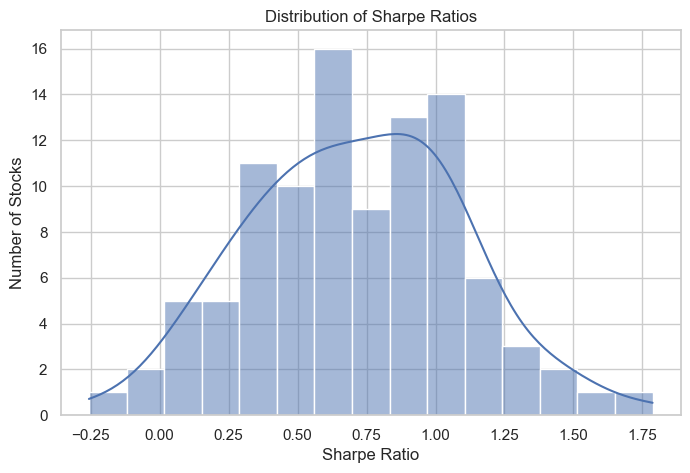

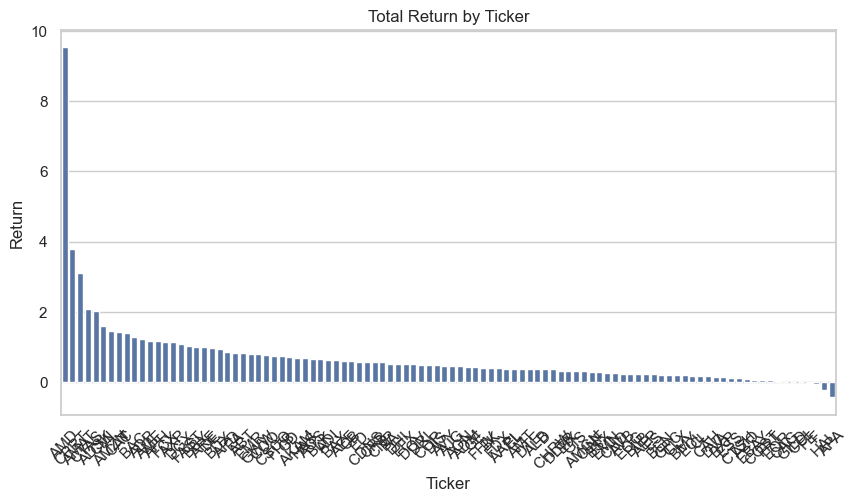

In [34]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))


# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))

# --- Plots ---
sns.set(style="whitegrid")

# 1. Histogram of Sharpe ratios
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()

# 2. Bar chart of returns
plt.figure(figsize=(10, 5))
sorted_df = perf_df.sort_values(by='Return', ascending=False)
sns.barplot(x='Ticker', y='Return', data=sorted_df)
plt.title('Total Return by Ticker')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.show()

# 3. Optional: Save results to CSV
perf_df.to_csv('backtest_results_universal_params.csv', index=False)